In [3]:
# Import libraries
import numpy as np
import pandas as pd

from google.colab import files

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor

#Sklearn Metrics For Model Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [4]:
# Connect to Google Drive to pull datasets
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
#Main Dataset For Product C
productC=pd.read_csv('gdrive/My Drive/vitraData/Veri 2017-2019 - Bootcamp.xlsx - PRODUCT_C.csv')

IMPORT DATASETS FOR NEW FEATURES

In [6]:
dolar = pd.read_csv('gdrive/My Drive/YonVitra/Dolar.csv')

In [7]:
Kid17 = pd.read_csv('gdrive/My Drive/YonVitra/Kid/Kid17.csv')
Kid18 = pd.read_csv('gdrive/My Drive/YonVitra/Kid/Kid18.csv')
Kid19 = pd.read_csv('gdrive/My Drive/YonVitra/Kid/Kid19.csv')

In [8]:
Kid20 = pd.read_csv('gdrive/My Drive/YonVitra/Kid/2020_Kid.csv')

In [9]:
Pred2020 = pd.read_csv('gdrive/My Drive/YonVitra/2020_prediction_dataset.csv')

In [10]:
endeks = pd.read_csv('gdrive/My Drive/YonVitra/Fiyat Endeksi (Tüketici Fiyatları).csv')

In [11]:
trends = pd.read_csv('gdrive/My Drive/YonVitra/Eczacıbaşı Google Trends.csv')

In [12]:
borsa = pd.read_csv('gdrive/My Drive/YonVitra/Borsa.csv')

In [13]:
weather = pd.read_csv('gdrive/My Drive/vitraData/WeatherAll.csv')

Regional Definition of Provinces

In [14]:
bigcities = ['ADANA','ANKARA','ANTALYA','AYDIN','BALIKESİR','BURSA','DENİZLİ','DİYARBAKIR','ERZURUM','ESKİŞEHİR','GAZİANTEP','HATAY','İSTANBUL','İZMİR','KAHRAMANMARAŞ','KAYSERİ','KOCAELİ','KONYA','MALATYA','MANİSA','MARDİN','MERSİN','MUĞLA','ORDU','SAKARYA','SAMSUN','ŞANLIURFA','TEKİRDAĞ','TRABZON','VAN']

In [15]:
Mediterrenian = ['ADANA','ANTALYA','BURDUR','HATAY','ISPARTA','MERSİN','OSMANİYE','KAHRAMANMARAŞ','AFYONKARAHiSAR']

In [16]:
Aegean = ['İZMİR','MANİSA','AYDIN','DENİZLİ','MUĞLA','KÜTAHYA','UŞAK','AFYON']

In [17]:
easternAnatolia = ['AĞRI','ARDAHAN','BİTLİS','BİNGÖL','ELAZIĞ','ERZİNCAN','ERZURUM','HAKKARİ','IĞDIR','KARS','MALATYA','MUŞ','VAN']

In [18]:
southeasternAnatolia = ['GAZİANTEP','DİYARBAKIR','ŞANLIURFA','BATMAN','ADIYAMAN','SİİRT','MARDİN','KİLİS','ŞIRNAK']

In [19]:
centralAnatolia = ['ANKARA','KONYA','KAYSERİ','ESKİŞEHİR','SİVAS','KIRIKKALE','AKSARAY','KARAMAN','KIRŞEHİR','NİĞDE','NEVŞEHİR','YOZGAT','ÇANKIRI']

In [20]:
marmara = ['İSTANBUL','EDİRNE','TEKİRDAĞ','ÇANAKKALE','KOCAELİ','YALOVA','SAKARYA','BİLECİK','BURSA','BALIKESİR','KIRKLARELİ',]

In [21]:
blackSea=['AMASYA','ARTVİN','BARTIN','BAYBURT','BOLU','ÇORUM','GÜMÜŞHANE','GİRESUN','KARABÜK','KASTAMONU','RİZE','SAMSUN','SİNOP','TOKAT','ORDU','TRABZON','ZONGULDAK','DÜZCE']

Identification of Some Functions

In [22]:
# Çağlar Hoca's notebook. Description of dataset
def MissingUniqueStatistics(df):
  
  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  from io import BytesIO
  import base64
  
  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list, 
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list, 
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [23]:
#define function for classifying seasons according to month
def seasons(df):
    if df['Month'] == 12 or df['Month'] == 1 or df['Month'] == 2:
        val = 'winter'
    elif df['Month'] == 3 or df['Month'] == 4 or df['Month'] == 5:
        val = 'spring'
    elif df['Month'] == 6 or df['Month'] == 7 or df['Month'] == 8:
        val = 'summer'
    elif df['Month'] == 9 or df['Month'] == 10 or df['Month'] == 11:
        val = 'fall'
    else:
      val=''
    return val

In [24]:
#define function for classifying region by Province
def region(df):
    if df['Province'] in Mediterrenian:
        val = 'ME'
    elif df['Province'] in Aegean:
        val = 'AE'
    elif df['Province'] in easternAnatolia:
        val = 'EA'
    elif df['Province'] in southeasternAnatolia:
        val = 'SE'
    elif df['Province'] in centralAnatolia:
        val = 'CE'
    elif df['Province'] in marmara:
        val = 'MA'
    elif df['Province'] in blackSea:
        val = 'BS'
    else:
      val = 'NaN'
    return val

In [25]:
#define function for classifying Province as metropolitan
def bigCity(df):
    if df['Province'] in bigcities:
        val = 1
    else:
        val =0
    return val

Reviewing Dataset

In [26]:
productC

Year  Period    Product  Province  Quantity
0     2017  201701  PRODUCT_C   ANTALYA         2
1     2017  201701  PRODUCT_C   ANTALYA        36
2     2017  201701  PRODUCT_C   ANTALYA        73
3     2017  201701  PRODUCT_C   ANTALYA         5
4     2017  201701  PRODUCT_C   ANTALYA        33
...    ...     ...        ...       ...       ...
8231  2019  201912  PRODUCT_C     İZMİR         5
8232  2019  201912  PRODUCT_C  İSTANBUL         2
8233  2019  201912  PRODUCT_C  ISTANBUL         2
8234  2019  201912  PRODUCT_C    SAMSUN         6
8235  2019  201912  PRODUCT_C  TEKİRDAĞ         2

[8236 rows x 5 columns]

In [27]:
productC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      8236 non-null   int64 
 1   Period    8236 non-null   int64 
 2   Product   8236 non-null   object
 3   Province  8236 non-null   object
 4   Quantity  8236 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 321.8+ KB


In [28]:
productC['Province'].unique()

array(['ANTALYA', 'AYDIN', 'BATMAN', 'BİLECİK', 'ANKARA', 'BALIKESİR',
       'ÇANKIRI', 'İÇEL', 'HATAY', 'İSTANBUL', 'ISTANBUL', 'İZMİR',
       'KAHRAMANMARAŞ', 'KARABÜK', 'KARAMAN', 'KASTAMONU', 'KAYSERİ',
       'SİNOP', 'SİVAS', 'TEKİRDAĞ', 'BURSA', 'ŞIRNAK', 'TOKAT',
       'GAZİANTEP', 'SAKARYA', 'GİRESUN', 'KÜTAHYA', 'BARTIN', 'MALATYA',
       'ADIYAMAN', 'AFYON', 'AĞRI', 'AKSARAY', 'DÜZCE', 'EDİRNE',
       'AMASYA', 'ELAZIĞ', 'ERZURUM', 'ESKİŞEHİR', 'ÇANAKKKALE',
       'TRABZON', 'KOCAELİ', 'KONYA', 'NİĞDE', 'ADANA', 'BURDUR', 'ORDU',
       'OSMANİYE', 'IĞDIR', 'ISPARTA', 'SAMSUN', 'DENİZLİ', 'ŞANLIURFA',
       'SİİRT', 'DİYARBAKIR', 'HAKKARİ', 'ÇORUM', 'ERZİNCAN', 'KIRŞEHİR',
       'BINGOL', 'BOLU', 'BITLIS', 'KİLİS', 'KIRIKKALE', 'KIRKLARELİ',
       'MANİSA', 'MARDIN', 'VAN', 'BAYBURT', 'YALOVA', 'MUĞLA', 'YOZGAT',
       'ZONGULDAK', 'MUŞ', 'NEVŞEHİR', 'UŞAK', 'GÜMÜŞHANE', 'ARDAHAN',
       'KARS', 'RİZE', 'ARTVİN'], dtype=object)

The names of some Provinces are written incorrectly. Editing the names for later studies

In [29]:
# ISTANBUL and İSTANBUL values are same.So change ISTANBUL to İSTANBUL
productC.loc[(productC.Province == 'ISTANBUL'),'Province']='İSTANBUL'
#Some misspelled data
productC.loc[(productC.Province == 'ÇANAKKKALE'),'Province']='ÇANAKKALE'
productC.loc[(productC.Province == 'MARDIN'),'Province']='MARDİN'
productC.loc[(productC.Province == 'İÇEL'),'Province']='MERSİN'
productC.loc[(productC.Province == 'BINGOL'),'Province']='BİNGÖL'
productC.loc[(productC.Province == 'BITLIS'),'Province']='BİTLİS'
productC['Province'].unique()

array(['ANTALYA', 'AYDIN', 'BATMAN', 'BİLECİK', 'ANKARA', 'BALIKESİR',
       'ÇANKIRI', 'MERSİN', 'HATAY', 'İSTANBUL', 'İZMİR', 'KAHRAMANMARAŞ',
       'KARABÜK', 'KARAMAN', 'KASTAMONU', 'KAYSERİ', 'SİNOP', 'SİVAS',
       'TEKİRDAĞ', 'BURSA', 'ŞIRNAK', 'TOKAT', 'GAZİANTEP', 'SAKARYA',
       'GİRESUN', 'KÜTAHYA', 'BARTIN', 'MALATYA', 'ADIYAMAN', 'AFYON',
       'AĞRI', 'AKSARAY', 'DÜZCE', 'EDİRNE', 'AMASYA', 'ELAZIĞ',
       'ERZURUM', 'ESKİŞEHİR', 'ÇANAKKALE', 'TRABZON', 'KOCAELİ', 'KONYA',
       'NİĞDE', 'ADANA', 'BURDUR', 'ORDU', 'OSMANİYE', 'IĞDIR', 'ISPARTA',
       'SAMSUN', 'DENİZLİ', 'ŞANLIURFA', 'SİİRT', 'DİYARBAKIR', 'HAKKARİ',
       'ÇORUM', 'ERZİNCAN', 'KIRŞEHİR', 'BİNGÖL', 'BOLU', 'BİTLİS',
       'KİLİS', 'KIRIKKALE', 'KIRKLARELİ', 'MANİSA', 'MARDİN', 'VAN',
       'BAYBURT', 'YALOVA', 'MUĞLA', 'YOZGAT', 'ZONGULDAK', 'MUŞ',
       'NEVŞEHİR', 'UŞAK', 'GÜMÜŞHANE', 'ARDAHAN', 'KARS', 'RİZE',
       'ARTVİN'], dtype=object)

A city is entered on different lines in a month. Since the important thing is the total amount of sales in a month, organizing the cities as an output in a month

In [30]:
productC = productC.groupby(['Period','Province'])['Quantity'].sum()
productC = productC.reset_index()
productC

Period   Province  Quantity
0     201701      ADANA      2017
1     201701   ADIYAMAN        21
2     201701      AFYON       275
3     201701    AKSARAY       628
4     201701     AMASYA         5
...      ...        ...       ...
1906  201912  ÇANAKKALE         1
1907  201912      ÇORUM         4
1908  201912   İSTANBUL      4730
1909  201912      İZMİR       716
1910  201912  ŞANLIURFA        71

[1911 rows x 3 columns]

Looking at the dataset, it is seen that some months sales of some cities are not entered.For better analysis, their unsold city that month will have their Quantity Column set to 0.Here are the steps to do this:


*   Month and year information will be added to the dataset
*   The dataset will be replaced by the pivot_table method.
*   NaN values corresponding to months will be filled with 0. 
*   The dataset will be unpivot and reinstated. 





In [31]:
productC['Period'] = productC['Period'].astype(str)
productC['Month'] = productC['Period'].str[-2:].astype(str).astype(int)
productC['Year'] = productC['Period'].str[:4].astype(str).astype(int)
productC

Period   Province  Quantity  Month  Year
0     201701      ADANA      2017      1  2017
1     201701   ADIYAMAN        21      1  2017
2     201701      AFYON       275      1  2017
3     201701    AKSARAY       628      1  2017
4     201701     AMASYA         5      1  2017
...      ...        ...       ...    ...   ...
1906  201912  ÇANAKKALE         1     12  2019
1907  201912      ÇORUM         4     12  2019
1908  201912   İSTANBUL      4730     12  2019
1909  201912      İZMİR       716     12  2019
1910  201912  ŞANLIURFA        71     12  2019

[1911 rows x 5 columns]

Pivot Table For Fill Missing Cities

In [32]:
df_transpose = productC.pivot_table('Quantity', ['Period','Year','Month'],'Province')
df_transpose

Province            ADANA  ADIYAMAN  AFYON  ...   İZMİR  ŞANLIURFA  ŞIRNAK
Period Year Month                           ...                           
201701 2017 1      2017.0      21.0  275.0  ...   474.0      641.0    54.0
201702 2017 2      1717.0      10.0  170.0  ...   274.0      932.0    48.0
201703 2017 3      2609.0      22.0  317.0  ...   318.0     2380.0    45.0
201704 2017 4      1416.0       4.0  105.0  ...   369.0      519.0    65.0
201705 2017 5      1149.0      13.0  243.0  ...   368.0      621.0   104.0
201706 2017 6       991.0       2.0  281.0  ...   253.0      276.0    16.0
201707 2017 7       823.0       NaN  228.0  ...   228.0      478.0    27.0
201708 2017 8      1414.0       6.0   77.0  ...   576.0      884.0   134.0
201709 2017 9      2675.0      64.0   73.0  ...  1053.0     1741.0     8.0
201710 2017 10     1896.0      92.0   44.0  ...   426.0      719.0    31.0
201711 2017 11      307.0       6.0   35.0  ...     0.0      221.0     6.0
201712 2017 12       -6.0       NaN    2.0  ...    56.0        1.0     NaN
201801 2018 1         5.0       NaN  -17.0  ...     9.0       16.0     NaN
201802 2018 2        -8.0       NaN    NaN  ...     6.0        1.0     NaN
201803 2018 3         7.0       NaN    7.0  ...     0.0       43.0     2.0
201804 2018 4         1.0       NaN    NaN  ...   -13.0        4.0     NaN
201805 2018 5        14.0       NaN    NaN  ...    -1.0       -7.0     NaN
201806 2018 6        14.0       NaN    5.0  ...     4.0      -37.0     3.0
201807 2018 7        -1.0       NaN    NaN  ...     5.0        8.0     6.0
201808 2018 8         1.0       NaN    NaN  ...    -1.0        1.0     NaN
201809 2018 9        12.0       NaN    NaN  ...     NaN        NaN     3.0
201810 2018 10        0.0       NaN    NaN  ...   -20.0        NaN     NaN
201811 2018 11        4.0       NaN    3.0  ...     0.0        0.0     NaN
201812 2018 12      -35.0       5.0    NaN  ...    18.0        7.0     NaN
201901 2019 1         1.0       NaN    NaN  ...     0.0        2.0     NaN
201902 2019 2        36.0       3.0    2.0  ...    45.0       65.0     NaN
201903 2019 3       508.0       4.0   12.0  ...   284.0      350.0     6.0
201904 2019 4       859.0       NaN    2.0  ...   363.0      197.0     3.0
201905 2019 5      1136.0       3.0   17.0  ...   302.0      246.0     3.0
201906 2019 6       895.0       7.0    9.0  ...   136.0       92.0     NaN
201907 2019 7       843.0       7.0   15.0  ...   267.0      123.0     2.0
201908 2019 8       763.0       4.0   14.0  ...   289.0       64.0     NaN
201909 2019 9      1471.0       2.0   18.0  ...   563.0       52.0     NaN
201910 2019 10     1014.0      12.0   15.0  ...   385.0       84.0     NaN
201911 2019 11     1992.0      24.0   18.0  ...  1007.0       47.0     NaN
201912 2019 12     1152.0       0.0   39.0  ...   716.0       71.0     NaN

[36 rows x 80 columns]

Fill NaN Values With 0

In [33]:
df_transpose.fillna(0,inplace=True)
df_transpose

Province            ADANA  ADIYAMAN  AFYON  ...   İZMİR  ŞANLIURFA  ŞIRNAK
Period Year Month                           ...                           
201701 2017 1      2017.0      21.0  275.0  ...   474.0      641.0    54.0
201702 2017 2      1717.0      10.0  170.0  ...   274.0      932.0    48.0
201703 2017 3      2609.0      22.0  317.0  ...   318.0     2380.0    45.0
201704 2017 4      1416.0       4.0  105.0  ...   369.0      519.0    65.0
201705 2017 5      1149.0      13.0  243.0  ...   368.0      621.0   104.0
201706 2017 6       991.0       2.0  281.0  ...   253.0      276.0    16.0
201707 2017 7       823.0       0.0  228.0  ...   228.0      478.0    27.0
201708 2017 8      1414.0       6.0   77.0  ...   576.0      884.0   134.0
201709 2017 9      2675.0      64.0   73.0  ...  1053.0     1741.0     8.0
201710 2017 10     1896.0      92.0   44.0  ...   426.0      719.0    31.0
201711 2017 11      307.0       6.0   35.0  ...     0.0      221.0     6.0
201712 2017 12       -6.0       0.0    2.0  ...    56.0        1.0     0.0
201801 2018 1         5.0       0.0  -17.0  ...     9.0       16.0     0.0
201802 2018 2        -8.0       0.0    0.0  ...     6.0        1.0     0.0
201803 2018 3         7.0       0.0    7.0  ...     0.0       43.0     2.0
201804 2018 4         1.0       0.0    0.0  ...   -13.0        4.0     0.0
201805 2018 5        14.0       0.0    0.0  ...    -1.0       -7.0     0.0
201806 2018 6        14.0       0.0    5.0  ...     4.0      -37.0     3.0
201807 2018 7        -1.0       0.0    0.0  ...     5.0        8.0     6.0
201808 2018 8         1.0       0.0    0.0  ...    -1.0        1.0     0.0
201809 2018 9        12.0       0.0    0.0  ...     0.0        0.0     3.0
201810 2018 10        0.0       0.0    0.0  ...   -20.0        0.0     0.0
201811 2018 11        4.0       0.0    3.0  ...     0.0        0.0     0.0
201812 2018 12      -35.0       5.0    0.0  ...    18.0        7.0     0.0
201901 2019 1         1.0       0.0    0.0  ...     0.0        2.0     0.0
201902 2019 2        36.0       3.0    2.0  ...    45.0       65.0     0.0
201903 2019 3       508.0       4.0   12.0  ...   284.0      350.0     6.0
201904 2019 4       859.0       0.0    2.0  ...   363.0      197.0     3.0
201905 2019 5      1136.0       3.0   17.0  ...   302.0      246.0     3.0
201906 2019 6       895.0       7.0    9.0  ...   136.0       92.0     0.0
201907 2019 7       843.0       7.0   15.0  ...   267.0      123.0     2.0
201908 2019 8       763.0       4.0   14.0  ...   289.0       64.0     0.0
201909 2019 9      1471.0       2.0   18.0  ...   563.0       52.0     0.0
201910 2019 10     1014.0      12.0   15.0  ...   385.0       84.0     0.0
201911 2019 11     1992.0      24.0   18.0  ...  1007.0       47.0     0.0
201912 2019 12     1152.0       0.0   39.0  ...   716.0       71.0     0.0

[36 rows x 80 columns]

Restore dataset by doing the opposite of the pivot operation

In [34]:
df_unpivoted = pd.melt(df_transpose, var_name='Province', value_name='Quantity', ignore_index = False)
df_unpivoted

Province  Quantity
Period Year Month                   
201701 2017 1        ADANA    2017.0
201702 2017 2        ADANA    1717.0
201703 2017 3        ADANA    2609.0
201704 2017 4        ADANA    1416.0
201705 2017 5        ADANA    1149.0
...                    ...       ...
201908 2019 8       ŞIRNAK       0.0
201909 2019 9       ŞIRNAK       0.0
201910 2019 10      ŞIRNAK       0.0
201911 2019 11      ŞIRNAK       0.0
201912 2019 12      ŞIRNAK       0.0

[2880 rows x 2 columns]

Make reset index for get multi-index values as columns

In [35]:
df_unpivoted = df_unpivoted.reset_index() 

The Last Version of DataFrames

In [36]:
productC = df_unpivoted
productC

Period  Year  Month Province  Quantity
0     201701  2017      1    ADANA    2017.0
1     201702  2017      2    ADANA    1717.0
2     201703  2017      3    ADANA    2609.0
3     201704  2017      4    ADANA    1416.0
4     201705  2017      5    ADANA    1149.0
...      ...   ...    ...      ...       ...
2875  201908  2019      8   ŞIRNAK       0.0
2876  201909  2019      9   ŞIRNAK       0.0
2877  201910  2019     10   ŞIRNAK       0.0
2878  201911  2019     11   ŞIRNAK       0.0
2879  201912  2019     12   ŞIRNAK       0.0

[2880 rows x 5 columns]

In [37]:
productC.dtypes

Period       object
Year          int64
Month         int64
Province     object
Quantity    float64
dtype: object

Dealing With Kid (Kid Numbers and Ratio For Each Province) and Dolar(dollar monthly average), Trends(Eczacıbaşı İlaç word searching rates on Google based on Province in Google Trends)DataFrames and Merging Process

In [38]:
dolar.dtypes

Period      int64
DolarB    float64
DolarS    float64
dtype: object

In [39]:
# Change Period columns dtype int64 to string.Because when we do merging operation columns must be string type
dolar['Period'] = dolar['Period'].apply(str)

In [40]:
pdList = [Kid17,Kid18,Kid19]  # List of all dataframes
Kid = pd.concat(pdList)
Kid

Province     Kid  Ratio  Year
0      ADANA  190594   8.60  2017
1   ADIYAMAN   62631  10.18  2017
2      AFYON   52997   7.40  2017
3       AĞRI   68997  12.87  2017
4     AMASYA   19738   5.98  2017
..       ...     ...    ...   ...
76    YALOVA   17765   6.56  2019
77   KARABÜK   12569   5.06  2019
78     KİLİS   14229   9.99  2019
79  OSMANİYE   44293   8.22  2019
80     DÜZCE   26691   6.81  2019

[243 rows x 4 columns]

In [41]:
Kid['Year'] = Kid['Year'].apply(str)

***Create new columns(Features) for ProductC dataset***

`Season Information Column:` With seasons function new Season column will created according to Month Information

In [42]:
#create new column 'Season' using the function above
productC['Season'] = productC.apply(seasons, axis=1)
productC

Period  Year  Month Province  Quantity  Season
0     201701  2017      1    ADANA    2017.0  winter
1     201702  2017      2    ADANA    1717.0  winter
2     201703  2017      3    ADANA    2609.0  spring
3     201704  2017      4    ADANA    1416.0  spring
4     201705  2017      5    ADANA    1149.0  spring
...      ...   ...    ...      ...       ...     ...
2875  201908  2019      8   ŞIRNAK       0.0  summer
2876  201909  2019      9   ŞIRNAK       0.0    fall
2877  201910  2019     10   ŞIRNAK       0.0    fall
2878  201911  2019     11   ŞIRNAK       0.0    fall
2879  201912  2019     12   ŞIRNAK       0.0  winter

[2880 rows x 6 columns]

`Big City Checking Column :` According to Wikipedia we found 30 Big Cities and define them on the above. With help of bigCities function if cities in the Product A dataset includes bigCities array then they are big cities and get 1 otherwise get 0.

In [43]:
#create new column 'BigCities' using the function above
productC['BigCity'] = productC.apply(bigCity, axis=1)
productC

Period  Year  Month Province  Quantity  Season  BigCity
0     201701  2017      1    ADANA    2017.0  winter        1
1     201702  2017      2    ADANA    1717.0  winter        1
2     201703  2017      3    ADANA    2609.0  spring        1
3     201704  2017      4    ADANA    1416.0  spring        1
4     201705  2017      5    ADANA    1149.0  spring        1
...      ...   ...    ...      ...       ...     ...      ...
2875  201908  2019      8   ŞIRNAK       0.0  summer        0
2876  201909  2019      9   ŞIRNAK       0.0    fall        0
2877  201910  2019     10   ŞIRNAK       0.0    fall        0
2878  201911  2019     11   ŞIRNAK       0.0    fall        0
2879  201912  2019     12   ŞIRNAK       0.0  winter        0

[2880 rows x 7 columns]

`Region Information Column :` With help of region function check cities in the productA dataset and compare with region arrays.

In [44]:
#create new column 'Region' using the function above
productC['Region'] = productC.apply(region, axis=1)
productC

Period  Year  Month Province  Quantity  Season  BigCity Region
0     201701  2017      1    ADANA    2017.0  winter        1     ME
1     201702  2017      2    ADANA    1717.0  winter        1     ME
2     201703  2017      3    ADANA    2609.0  spring        1     ME
3     201704  2017      4    ADANA    1416.0  spring        1     ME
4     201705  2017      5    ADANA    1149.0  spring        1     ME
...      ...   ...    ...      ...       ...     ...      ...    ...
2875  201908  2019      8   ŞIRNAK       0.0  summer        0     SE
2876  201909  2019      9   ŞIRNAK       0.0    fall        0     SE
2877  201910  2019     10   ŞIRNAK       0.0    fall        0     SE
2878  201911  2019     11   ŞIRNAK       0.0    fall        0     SE
2879  201912  2019     12   ŞIRNAK       0.0  winter        0     SE

[2880 rows x 8 columns]

In [45]:
#Check if values Null
productC.isnull().values.all(axis=0).sum()

0

Change Original DataFrame's(productC) Year Column to String For Merging With Other Frameworks

In [46]:
productC['Period'] = productC['Period'].apply(str)
productC['Year'] = productC['Year'].apply(str)
productC['Month'] = productC['Month'].apply(str)

In [47]:
dolar['Period'] = dolar['Period'].apply(str)

Merge All DataFrames

In [48]:
#Merge two dataframes on specific column (Period)
productC= pd.merge(productC, dolar, on='Period')
productC

Period  Year Month   Province  ...  BigCity Region  DolarB  DolarS
0     201701  2017     1      ADANA  ...        1     ME  3.7468  3.7536
1     201701  2017     1   ADIYAMAN  ...        0     SE  3.7468  3.7536
2     201701  2017     1      AFYON  ...        0     AE  3.7468  3.7536
3     201701  2017     1    AKSARAY  ...        0     CE  3.7468  3.7536
4     201701  2017     1     AMASYA  ...        0     BS  3.7468  3.7536
...      ...   ...   ...        ...  ...      ...    ...     ...     ...
2875  201912  2019    12      ÇORUM  ...        0     BS  5.8467  5.8572
2876  201912  2019    12   İSTANBUL  ...        1     MA  5.8467  5.8572
2877  201912  2019    12      İZMİR  ...        1     AE  5.8467  5.8572
2878  201912  2019    12  ŞANLIURFA  ...        1     SE  5.8467  5.8572
2879  201912  2019    12     ŞIRNAK  ...        0     SE  5.8467  5.8572

[2880 rows x 10 columns]

In [49]:
#Fix the wrong entered Province names
Kid.loc[(Kid.Province == 'MANISA'),'Province']='MANİSA'
Kid.loc[(Kid.Province == 'BİLECIK'),'Province']='BİLECİK'

In [50]:
# Merge Kid dataframe with original dataset
productC = pd.merge(productC, Kid)
productC

Period  Year Month Province  ...  DolarB  DolarS     Kid  Ratio
0     201701  2017     1    ADANA  ...  3.7468  3.7536  190594   8.60
1     201702  2017     2    ADANA  ...  3.6634  3.6700  190594   8.60
2     201703  2017     3    ADANA  ...  3.6672  3.6738  190594   8.60
3     201704  2017     4    ADANA  ...  3.6495  3.6561  190594   8.60
4     201705  2017     5    ADANA  ...  3.5631  3.5695  190594   8.60
...      ...   ...   ...      ...  ...     ...     ...     ...    ...
2875  201908  2019     8   ŞIRNAK  ...  5.6410  5.6511   66295  12.52
2876  201909  2019     9   ŞIRNAK  ...  5.7047  5.7150   66295  12.52
2877  201910  2019    10   ŞIRNAK  ...  5.7889  5.7993   66295  12.52
2878  201911  2019    11   ŞIRNAK  ...  5.7328  5.7431   66295  12.52
2879  201912  2019    12   ŞIRNAK  ...  5.8467  5.8572   66295  12.52

[2880 rows x 12 columns]

In [51]:
#Change int variable to string 
trends['Period'] = trends['Period'].apply(str)

In [52]:
# Merge trends dataframe with original dataset
productC = pd.merge(productC, trends)
productC

Period  Year Month Province  ...  DolarS     Kid  Ratio Interest
0     201701  2017     1    ADANA  ...  3.7536  190594   8.60        6
1     201702  2017     2    ADANA  ...  3.6700  190594   8.60        5
2     201703  2017     3    ADANA  ...  3.6738  190594   8.60        8
3     201704  2017     4    ADANA  ...  3.6561  190594   8.60        8
4     201705  2017     5    ADANA  ...  3.5695  190594   8.60        7
...      ...   ...   ...      ...  ...     ...     ...    ...      ...
2875  201908  2019     8   ŞIRNAK  ...  5.6511   66295  12.52        0
2876  201909  2019     9   ŞIRNAK  ...  5.7150   66295  12.52        0
2877  201910  2019    10   ŞIRNAK  ...  5.7993   66295  12.52        0
2878  201911  2019    11   ŞIRNAK  ...  5.7431   66295  12.52        0
2879  201912  2019    12   ŞIRNAK  ...  5.8572   66295  12.52        0

[2880 rows x 13 columns]

In [53]:
endeks['Year'] = endeks['Year'].apply(str)
endeks['Month'] = endeks['Month'].apply(str)

In [54]:
productC = pd.merge(productC,endeks)
productC

Period  Year Month   Province  ...  Ratio Interest  CPI(Year) CPI(Month)
0     201701  2017     1      ADANA  ...   8.60        6       9,22       2,46
1     201701  2017     1   ADIYAMAN  ...  10.18        0       9,22       2,46
2     201701  2017     1      AFYON  ...   7.40        0       9,22       2,46
3     201701  2017     1    AKSARAY  ...   8.35        0       9,22       2,46
4     201701  2017     1     AMASYA  ...   5.98        0       9,22       2,46
...      ...   ...   ...        ...  ...    ...      ...        ...        ...
2875  201912  2019    12      ÇORUM  ...   5.96        0      11,84       0,74
2876  201912  2019    12   İSTANBUL  ...   7.31       46      11,84       0,74
2877  201912  2019    12      İZMİR  ...   6.08       28      11,84       0,74
2878  201912  2019    12  ŞANLIURFA  ...  14.44        0      11,84       0,74
2879  201912  2019    12     ŞIRNAK  ...  12.52        0      11,84       0,74

[2880 rows x 15 columns]

In [55]:
productC.isna().sum()

Period        0
Year          0
Month         0
Province      0
Quantity      0
Season        0
BigCity       0
Region        0
DolarB        0
DolarS        0
Kid           0
Ratio         0
Interest      0
CPI(Year)     0
CPI(Month)    0
dtype: int64

Change , to . for some columns

In [56]:
productC['CPI(Month)']=productC['CPI(Month)'].str.replace(',','.')

In [57]:
productC['CPI(Year)']=productC['CPI(Year)'].str.replace(',','.')

In [58]:
productC['CPI(Year)']=productC['CPI(Year)'].astype(float)

In [59]:
productC['CPI(Month)']=productC['CPI(Month)'].astype(float)

In [60]:
productC['Period'] = productC['Period'].astype(int)

In [61]:
productC['Year'] = productC['Year'].astype(int)

In [62]:
productC['Month'] = productC['Month'].astype(int)

In [63]:
productC.dtypes

Period          int64
Year            int64
Month           int64
Province       object
Quantity      float64
Season         object
BigCity         int64
Region         object
DolarB        float64
DolarS        float64
Kid             int64
Ratio         float64
Interest        int64
CPI(Year)     float64
CPI(Month)    float64
dtype: object

CHECK DATA INFORMATIONS

In [64]:
data_info = MissingUniqueStatistics(productC)
data_info

#_Total_Entry  #_Missing_Value  ...       Q3          Max
Variable                                    ...                      
Period               2880                0  ...   201903       201912
Year                 2880                0  ...     2019         2019
Month                2880                0  ...     9.25           12
Province             2880                0  ...      NaN          NaN
Quantity             2880                0  ...    44.25         6459
Season               2880                0  ...      NaN          NaN
BigCity              2880                0  ...        1            1
Region               2880                0  ...      NaN          NaN
DolarB               2880                0  ...  5.71173       6.3389
DolarS               2880                0  ...  5.72203       6.3503
Kid                  2880                0  ...  74922.5  1.16009e+06
Ratio                2880                0  ...    8.655        14.98
Interest             2880                0  ...        9          100
CPI(Year)            2880                0  ...  18.1025        25.24
CPI(Month)           2880                0  ...   1.6375          6.3

[15 rows x 13 columns]

**DATA VISUALIZATIONS**

In [65]:
df = productC

`Correlation Matrix Heatmap : `is used for creating the correlation matrix. It is used to find the pairwise correlation of all columns in the dataframe.

Period      Year  ...     CPI(Year)    CPI(Month)
Period      1.000000  0.999107  ...  3.904696e-01 -4.025115e-03
Year        0.999107  1.000000  ...  3.856288e-01 -3.051003e-03
Month       0.042241  0.000000  ...  1.227473e-01 -2.312523e-02
Quantity   -0.114913 -0.113960  ... -1.546662e-01 -3.771150e-02
BigCity     0.000000  0.000000  ...  1.835414e-17 -1.024090e-17
DolarB      0.860704  0.848937  ...  6.517193e-01  2.254460e-01
DolarS      0.860701  0.848935  ...  6.517215e-01  2.254440e-01
Kid        -0.004961 -0.004966  ... -1.015633e-03  7.344413e-04
Ratio      -0.066161 -0.066220  ... -2.273555e-02  2.442021e-03
Interest   -0.007103 -0.006970  ... -4.985084e-02  3.164079e-02
CPI(Year)   0.390470  0.385629  ...  1.000000e+00  2.335528e-01
CPI(Month) -0.004025 -0.003051  ...  2.335528e-01  1.000000e+00

[12 rows x 12 columns]

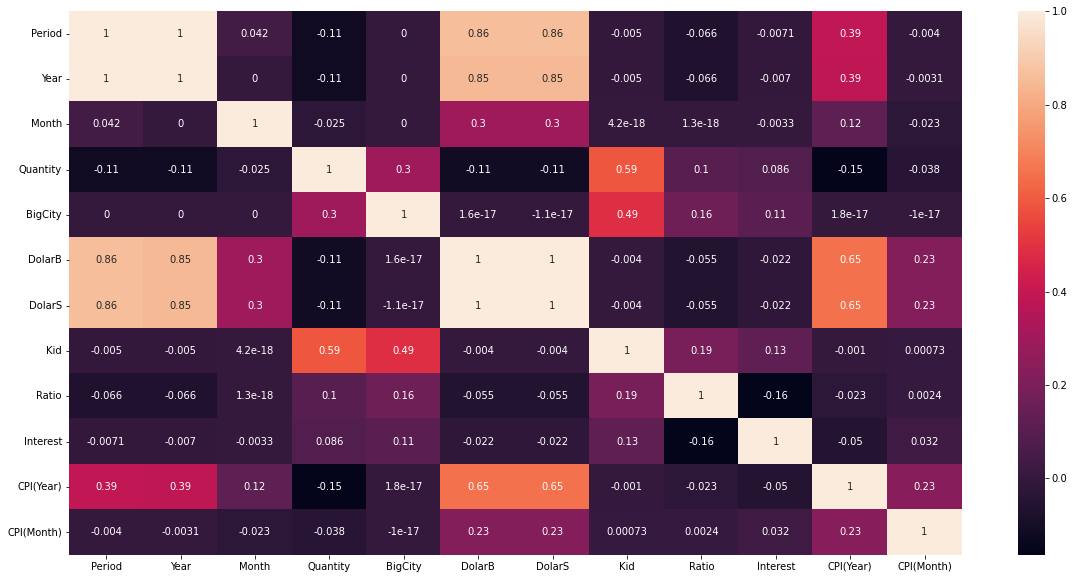

In [66]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr
show_correlations(df)

Show Giving Back Product's Information

In [67]:
df_givingback= df.loc[df['Quantity']<0]
df_givingback

Period  Year  Month    Province  ...  Ratio Interest  CPI(Year) CPI(Month)
75    201701  2017      1       ÇORUM  ...   6.42        0       9.22       2.46
389   201705  2017      5         VAN  ...  12.28        0      11.72       0.45
469   201706  2017      6         VAN  ...  12.28        0      10.90      -0.27
523   201707  2017      7  KIRKLARELİ  ...   5.20        0       9.79       0.15
590   201708  2017      8   GÜMÜŞHANE  ...   6.17        0      10.68       0.52
...      ...   ...    ...         ...  ...    ...      ...        ...        ...
2386  201906  2019      6       TOKAT  ...   5.97       70      15.72       0.03
2552  201908  2019      8   ZONGULDAK  ...   5.09        0      15.01       0.86
2630  201909  2019      9      YALOVA  ...   6.56       77       9.26       0.99
2808  201912  2019     12      ARTVİN  ...   5.38        0      11.84       0.74
2851  201912  2019     12      MARDİN  ...  11.81        0      11.84       0.74

[130 rows x 15 columns]

Turkey map showing Quantities

In [68]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import json

In [69]:
df_map = pd.read_csv('gdrive/My Drive/YonVitra/CLowerCase.csv')

In [70]:
response = requests.get('https://gist.githubusercontent.com/mebaysan/9be56dd1ca5659c0ff7ea5e2b5cf6479/raw/6d7a77d8a2892bd59f401eb87bd82d7f48642a58/turkey-geojson.json')

In [71]:
geojson = response.json()

In [72]:
geoDict = {}
for i in geojson['features']:
    geoDict[i['properties']['name']] = i['id']

In [73]:
ProductCmap = df_map.groupby(['Province','Year'])['Quantity'].sum()
ProductCmap = ProductCmap.reset_index()
ProductCmap17 = ProductCmap[ProductCmap['Year']==2017].groupby(['Province'])['Quantity'].sum()
ProductCmap17 = ProductCmap17.reset_index()
ProductCmap18 = ProductCmap[ProductCmap['Year']==2018].groupby(['Province'])['Quantity'].sum()
ProductCmap18 = ProductCmap18.reset_index()
ProductCmap19 = ProductCmap[ProductCmap['Year']==2019].groupby(['Province'])['Quantity'].sum()
ProductCmap19 = ProductCmap19.reset_index()

In [74]:
ProductCmap['GeoID'] = ProductCmap['Province'].str.capitalize().apply(lambda x: geoDict[x])

ProductCmap17['GeoID'] = ProductCmap17['Province'].str.capitalize().apply(lambda x: geoDict[x])
ProductCmap18['GeoID'] = ProductCmap18['Province'].str.capitalize().apply(lambda x: geoDict[x])
ProductCmap19['GeoID'] = ProductCmap19['Province'].str.capitalize().apply(lambda x: geoDict[x])

In [75]:
fig = px.choropleth_mapbox(
ProductCmap17,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductCmap17['Province'],
ProductCmap17['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product C - 2017',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

In [76]:
fig = px.choropleth_mapbox(
ProductCmap18,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductCmap18['Province'],
ProductCmap18['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product C - 2018',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

In [77]:
fig = px.choropleth_mapbox(
ProductCmap19,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductCmap19['Province'],
ProductCmap19['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product C - 2019',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

Big Sales For Sum Of 3 Years

In [78]:
provinceBased = df_map.groupby(["Province"])["Quantity"].sum()
provinceBased = provinceBased.to_frame().reset_index()
provinceBased= provinceBased.sort_values(by=['Quantity'], ascending=False)
provinceBased = provinceBased[:10]

Text(0, 0.5, 'Quantity')

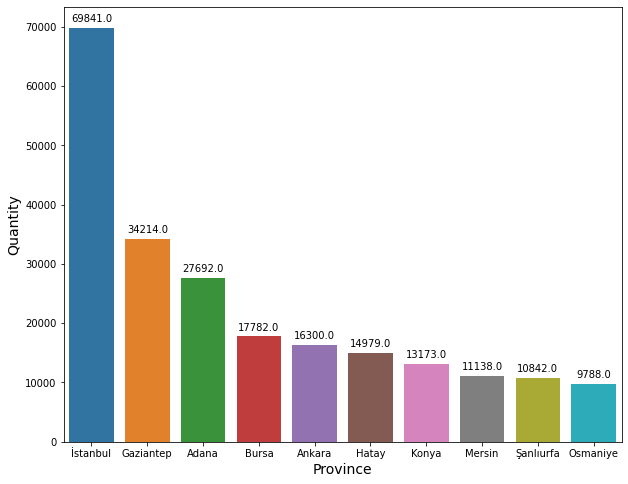

In [79]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="Province",y="Quantity",data=provinceBased)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Province", size=14)
plt.ylabel("Quantity", size=14)

Sales Distribution Based On Region

In [80]:
a = df_map.groupby('Region')["Quantity"].sum()
regionDf = a.to_frame().reset_index()

Text(0, 0.5, 'Quantity')

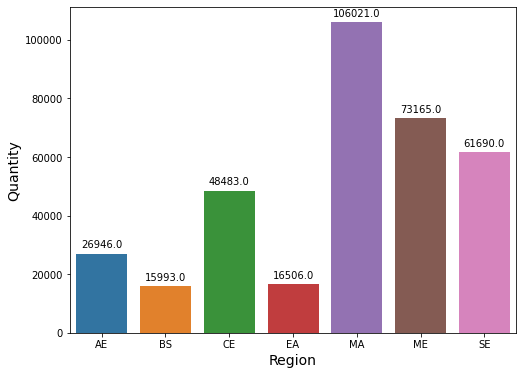

In [81]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Region",y="Quantity",data=regionDf)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Region", size=14)
plt.ylabel("Quantity", size=14)

3 Years Sales in One Frame

In [82]:
yearBased = df_map.groupby(["Year","Month"])["Quantity"].sum()
yearBased = yearBased.to_frame().reset_index()

In [83]:
year2017 = yearBased.loc[yearBased['Year'] == 2017]
year2018 = yearBased.loc[yearBased['Year'] == 2018]
year2019 = yearBased.loc[yearBased['Year'] == 2019]

<Figure size 2880x1440 with 0 Axes>

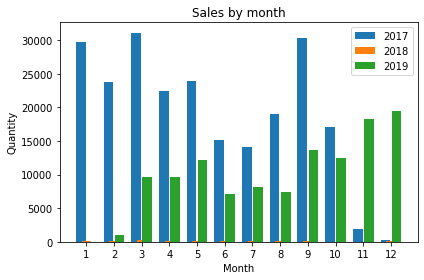

In [84]:
labels = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12']
sale2017 = year2017['Quantity'].to_list()
sale2018 = year2018['Quantity'].to_list()
sale2019 = year2019['Quantity'].to_list()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()


rects1 = ax.bar(x-0.2,sale2017, width, label='2017')
rects2 = ax.bar(x, sale2018, width, label='2018')
rects3 = ax.bar(x+0.2, sale2019, width, label='2019')
# Add some text for labels, title and custom x-axis tick labels, etc.
# tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_xlabel('Month')
ax.grid(False)
ax.set_facecolor('white')
ax.set_title('Sales by month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()


In [85]:
def yearBasedSales(data):  
  plt.figure(figsize=(8, 6))
  splot=sns.barplot(x="Month",y="Quantity",data=data)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.xlabel("Month", size=14)
  plt.ylabel("Quantity", size=14)

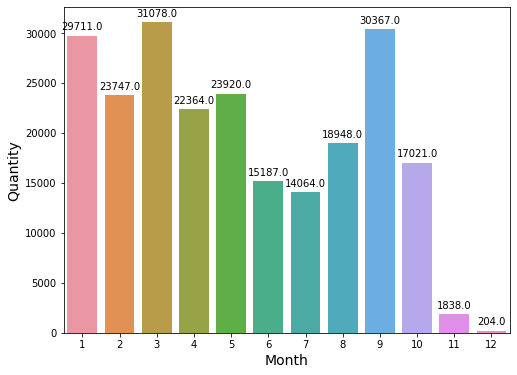

In [86]:
yearBasedSales(year2017)

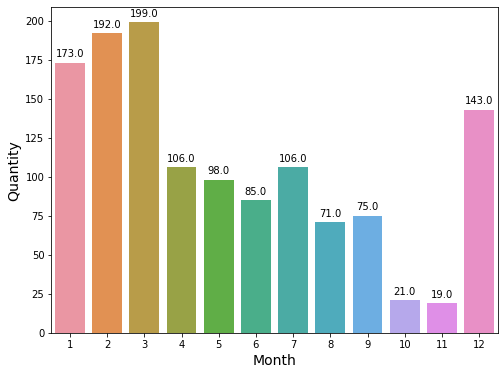

In [87]:
yearBasedSales(year2018)

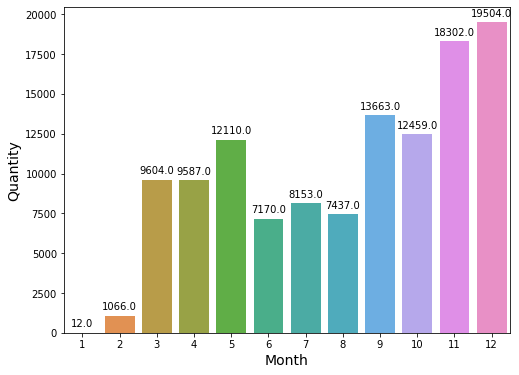

In [88]:
yearBasedSales(year2019)

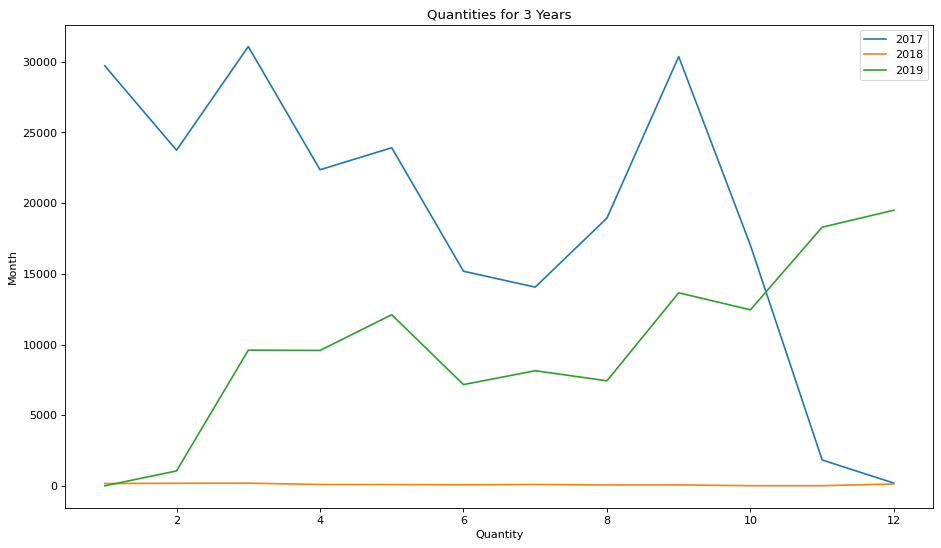

In [89]:
from matplotlib.pyplot import figure

figure(figsize=(14, 8), dpi=80)
plt.plot(year2017['Month'],year2017['Quantity'], label = "2017")
plt.plot(year2018['Month'], year2018['Quantity'], label = "2018")
plt.plot(year2019['Month'], year2019['Quantity'], label = "2019")
plt.title('Quantities for 3 Years')
plt.xlabel('Quantity')
plt.ylabel('Month')
plt.legend()
plt.show()

**As you can see in the picture above, Product C has experienced a significant decrease in 2018. In subsequent sales, it entered an increasing trend.**

*Outlier Values*

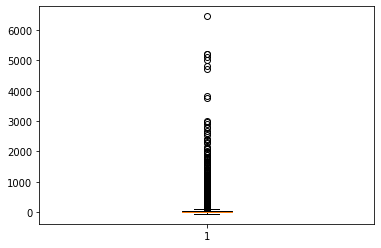

In [90]:
plt.boxplot(df["Quantity"])
plt.show()

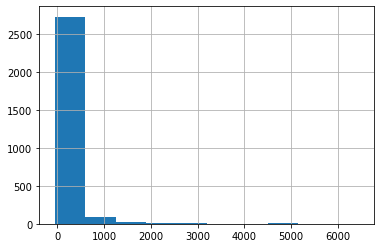

In [91]:
df.Quantity.hist()

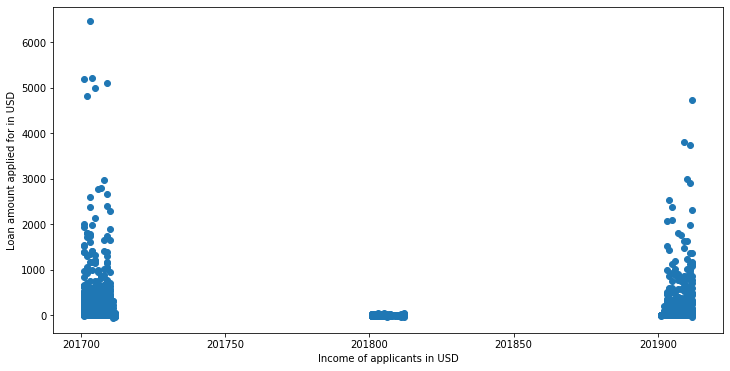

In [92]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Period'],df['Quantity'])
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

**LAST MERGE OPERATIONS**

This Dataframe last version of Product C.It includes 2020 datas for prediction

In [93]:
# Read final Product C dataset
df = pd.read_csv('gdrive/My Drive/YonVitra/C_2020/MergedData.csv')
df

Period  Year  Month  Province  ...  Ratio Interest  CPI(Year) CPI(Month)
0     201701  2017      1     Adana  ...   8.60        6       9.22       2.46
1     201701  2017      1  Adıyaman  ...  10.18        0       9.22       2.46
2     201701  2017      1     Afyon  ...   7.40        0       9.22       2.46
3     201701  2017      1   Aksaray  ...   8.35        0       9.22       2.46
4     201701  2017      1    Amasya  ...   5.98        0       9.22       2.46
...      ...   ...    ...       ...  ...    ...      ...        ...        ...
3199  202004  2020      4     Sinop  ...   5.16        0      10.94       0.85
3200  202004  2020      4   Kocaeli  ...   7.62       77      10.94       0.85
3201  202004  2020      4    Bartın  ...   4.89        0      10.94       0.85
3202  202004  2020      4       Van  ...  11.15       27      10.94       0.85
3203  202004  2020      4     Siirt  ...  11.31        0      10.94       0.85

[3204 rows x 14 columns]

In [94]:
df = df.dropna(how='any',axis=0) 

In [95]:
df

Period  Year  Month  Province  ...  Ratio Interest  CPI(Year) CPI(Month)
0     201701  2017      1     Adana  ...   8.60        6       9.22       2.46
1     201701  2017      1  Adıyaman  ...  10.18        0       9.22       2.46
2     201701  2017      1     Afyon  ...   7.40        0       9.22       2.46
3     201701  2017      1   Aksaray  ...   8.35        0       9.22       2.46
4     201701  2017      1    Amasya  ...   5.98        0       9.22       2.46
...      ...   ...    ...       ...  ...    ...      ...        ...        ...
3199  202004  2020      4     Sinop  ...   5.16        0      10.94       0.85
3200  202004  2020      4   Kocaeli  ...   7.62       77      10.94       0.85
3201  202004  2020      4    Bartın  ...   4.89        0      10.94       0.85
3202  202004  2020      4       Van  ...  11.15       27      10.94       0.85
3203  202004  2020      4     Siirt  ...  11.31        0      10.94       0.85

[3200 rows x 14 columns]

In [96]:
df.dtypes

Period          int64
Year            int64
Month           int64
Province       object
Quantity        int64
Season         object
BigCity         int64
Region         object
DolarS        float64
Kid             int64
Ratio         float64
Interest        int64
CPI(Year)     float64
CPI(Month)    float64
dtype: object

In [97]:
df['Period']=df['Period'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
borsa['SalePrice']=borsa['SalePrice'].str.replace(',','.')

In [99]:
borsa['SalePrice']=borsa['SalePrice'].apply(float)

In [100]:
borsa['Period']=borsa['Period'].apply(str)

In [101]:
#Merge two dataframes on specific column (Period)
df= pd.merge(df, borsa, on='Period')
df

Period  Year  Month  Province  ...  Interest CPI(Year)  CPI(Month) SalePrice
0     201701  2017      1     Adana  ...         6      9.22        2.46     2.379
1     201701  2017      1  Adıyaman  ...         0      9.22        2.46     2.379
2     201701  2017      1     Afyon  ...         0      9.22        2.46     2.379
3     201701  2017      1   Aksaray  ...         0      9.22        2.46     2.379
4     201701  2017      1    Amasya  ...         0      9.22        2.46     2.379
...      ...   ...    ...       ...  ...       ...       ...         ...       ...
3195  202004  2020      4     Sinop  ...         0     10.94        0.85     4.780
3196  202004  2020      4   Kocaeli  ...        77     10.94        0.85     4.780
3197  202004  2020      4    Bartın  ...         0     10.94        0.85     4.780
3198  202004  2020      4       Van  ...        27     10.94        0.85     4.780
3199  202004  2020      4     Siirt  ...         0     10.94        0.85     4.780

[3200 rows x 15 columns]

Weather data from Turkish State Meteorological Servicecontains.

In [102]:
df= pd.merge(df, weather)
df

Period  Year  Month  Province  ...  CPI(Year) CPI(Month)  SalePrice Avg_Temp
0     201701  2017      1     Adana  ...       9.22       2.46      2.379      8.7
1     201701  2017      1  Adıyaman  ...       9.22       2.46      2.379      3.8
2     201701  2017      1     Afyon  ...       9.22       2.46      2.379     -2.4
3     201701  2017      1   Aksaray  ...       9.22       2.46      2.379     -1.7
4     201701  2017      1    Amasya  ...       9.22       2.46      2.379      2.2
...      ...   ...    ...       ...  ...        ...        ...        ...      ...
3195  202004  2020      4     Sinop  ...      10.94       0.85      4.780     10.2
3196  202004  2020      4   Kocaeli  ...      10.94       0.85      4.780     12.3
3197  202004  2020      4    Bartın  ...      10.94       0.85      4.780     10.4
3198  202004  2020      4       Van  ...      10.94       0.85      4.780      8.6
3199  202004  2020      4     Siirt  ...      10.94       0.85      4.780     14.1

[3200 rows x 16 columns]

In [103]:
df['Period'] = df['Period'].apply(int)

In [104]:
df.dtypes

Period          int64
Year            int64
Month           int64
Province       object
Quantity        int64
Season         object
BigCity         int64
Region         object
DolarS        float64
Kid             int64
Ratio         float64
Interest        int64
CPI(Year)     float64
CPI(Month)    float64
SalePrice     float64
Avg_Temp      float64
dtype: object

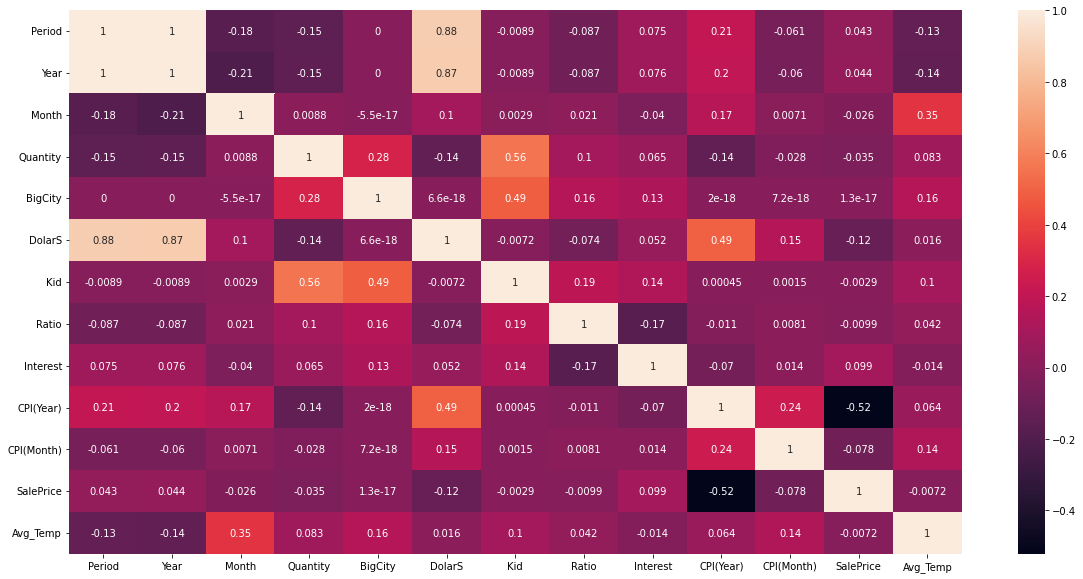

In [105]:
import seaborn as sns

def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
show_correlations(df)

Label Encoding For String Values

In the last version of our dataset some variables are on the object form.Because of this, they must be encoded.Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

In [106]:
df['Province'] = labelencoder.fit_transform(df['Province'].values)
df['Season'] = labelencoder.fit_transform(df['Season'].values)
df['Region'] = labelencoder.fit_transform(df['Region'].values)

Change Quantity Column To End

In [107]:
mid = df['Quantity']
df.drop(labels=['Quantity'], axis=1, inplace = True)
df.insert(15, 'Quantity', mid)
df

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
0     201701  2017      1         0  ...        2.46      2.379       8.7      2017
1     201701  2017      1         1  ...        2.46      2.379       3.8        21
2     201701  2017      1         2  ...        2.46      2.379      -2.4       275
3     201701  2017      1         3  ...        2.46      2.379      -1.7       628
4     201701  2017      1         4  ...        2.46      2.379       2.2         5
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
3195  202004  2020      4        63  ...        0.85      4.780      10.2         0
3196  202004  2020      4        43  ...        0.85      4.780      12.3         0
3197  202004  2020      4        12  ...        0.85      4.780      10.4         0
3198  202004  2020      4        69  ...        0.85      4.780       8.6         0
3199  202004  2020      4        62  ...        0.85      4.780      14.1         0

[3200 rows x 16 columns]

Splitting the data between 2020 and 2017-2019 Given to Us into Two Dataframes, Train and Prediction

In [108]:
resultTrain = df[:2880]
resultTrain

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
0     201701  2017      1         0  ...        2.46      2.379       8.7      2017
1     201701  2017      1         1  ...        2.46      2.379       3.8        21
2     201701  2017      1         2  ...        2.46      2.379      -2.4       275
3     201701  2017      1         3  ...        2.46      2.379      -1.7       628
4     201701  2017      1         4  ...        2.46      2.379       2.2         5
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
2875  201912  2019     12        75  ...        0.74      3.651       3.4         4
2876  201912  2019     12        76  ...        0.74      3.651      10.5      4730
2877  201912  2019     12        77  ...        0.74      3.651      11.8       716
2878  201912  2019     12        78  ...        0.74      3.651       9.1        71
2879  201912  2019     12        79  ...        0.74      3.651       6.3         0

[2880 rows x 16 columns]

In [109]:
resultPred= df[2880:]
resultPred

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
2880  202001  2020      1         0  ...        1.35      4.113       9.9         0
2881  202001  2020      1        49  ...        1.35      4.113       2.4         0
2882  202001  2020      1        50  ...        1.35      4.113       6.2         0
2883  202001  2020      1        21  ...        1.35      4.113       5.8         0
2884  202001  2020      1        51  ...        1.35      4.113       3.5         0
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
3195  202004  2020      4        63  ...        0.85      4.780      10.2         0
3196  202004  2020      4        43  ...        0.85      4.780      12.3         0
3197  202004  2020      4        12  ...        0.85      4.780      10.4         0
3198  202004  2020      4        69  ...        0.85      4.780       8.6         0
3199  202004  2020      4        62  ...        0.85      4.780      14.1         0

[320 rows x 16 columns]

**We exclude the values expressed as minus from the dataframe we will make for Train. Because our goal is to find the total sold product.**

In [110]:
resultTrain.loc[resultTrain['Quantity']<0]

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
75    201701  2017      1        75  ...        2.46      2.379      -1.7       -18
389   201705  2017      5        69  ...        0.45      3.845      13.9        -3
469   201706  2017      6        69  ...       -0.27      3.920      19.5        -1
523   201707  2017      7        46  ...        0.15      3.978      25.0        -1
590   201708  2017      8        31  ...        0.52      3.771      23.3        -1
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
2386  201906  2019      6        66  ...        0.03      2.312      23.1        -2
2552  201908  2019      8        72  ...        0.86      2.568      22.6        -2
2630  201909  2019      9        70  ...        0.99      3.070      20.7        -4
2808  201912  2019     12         8  ...        0.74      3.651       7.4        -1
2851  201912  2019     12        51  ...        0.74      3.651       7.2       -38

[130 rows x 16 columns]

In [111]:
resultTrain.drop(resultTrain[resultTrain.Quantity < 0].index, inplace=True)
resultTrain

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
0     201701  2017      1         0  ...        2.46      2.379       8.7      2017
1     201701  2017      1         1  ...        2.46      2.379       3.8        21
2     201701  2017      1         2  ...        2.46      2.379      -2.4       275
3     201701  2017      1         3  ...        2.46      2.379      -1.7       628
4     201701  2017      1         4  ...        2.46      2.379       2.2         5
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
2875  201912  2019     12        75  ...        0.74      3.651       3.4         4
2876  201912  2019     12        76  ...        0.74      3.651      10.5      4730
2877  201912  2019     12        77  ...        0.74      3.651      11.8       716
2878  201912  2019     12        78  ...        0.74      3.651       9.1        71
2879  201912  2019     12        79  ...        0.74      3.651       6.3         0

[2750 rows x 16 columns]

In [112]:
resultTrain.loc[resultTrain['Quantity']==0]

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
7     201701  2017      1         7  ...        2.46      2.379     -13.6         0
8     201701  2017      1         8  ...        2.46      2.379       2.2         0
14    201701  2017      1        14  ...        2.46      2.379      -6.9         0
27    201701  2017      1        26  ...        2.46      2.379      -2.6         0
30    201701  2017      1        31  ...        2.46      2.379      -1.9         0
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
2864  201912  2019     12        62  ...        0.74      3.651       7.5         0
2867  201912  2019     12        67  ...        0.74      3.651      11.8         0
2870  201912  2019     12        70  ...        0.74      3.651      10.2         0
2874  201912  2019     12        74  ...        0.74      3.651       2.9         0
2879  201912  2019     12        79  ...        0.74      3.651       6.3         0

[1030 rows x 16 columns]

In [113]:
resultTrain.drop(resultTrain[resultTrain.Quantity == 0].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
resultTrain

Period  Year  Month  Province  ...  CPI(Month)  SalePrice  Avg_Temp  Quantity
0     201701  2017      1         0  ...        2.46      2.379       8.7      2017
1     201701  2017      1         1  ...        2.46      2.379       3.8        21
2     201701  2017      1         2  ...        2.46      2.379      -2.4       275
3     201701  2017      1         3  ...        2.46      2.379      -1.7       628
4     201701  2017      1         4  ...        2.46      2.379       2.2         5
...      ...   ...    ...       ...  ...         ...        ...       ...       ...
2873  201912  2019     12        73  ...        0.74      3.651      11.2         1
2875  201912  2019     12        75  ...        0.74      3.651       3.4         4
2876  201912  2019     12        76  ...        0.74      3.651      10.5      4730
2877  201912  2019     12        77  ...        0.74      3.651      11.8       716
2878  201912  2019     12        78  ...        0.74      3.651       9.1        71

[1720 rows x 16 columns]

**DATA SPLITTING**

Data splitting is commonly used in machine learning to split data into a train, test, or validation set. This approach allows us to find the model hyper-parameter and also estimate the generalization performance.

In our case, We split Train Dataset which includes 2017-2019 datas to two set.But Before this we create 3 different Data entries.


---


1.   It includes all columns except Period.
2.   It includes all columns except Province.
3.   It includes all columns except Period and Province.




In [115]:
X1=resultTrain.iloc[:,1:15].values
y1=resultTrain.iloc[:,15].values

# Dataset which excluded the Period, DolarB,Province:
X2=resultTrain.iloc[:,[0,1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14]].values
y2=resultTrain.iloc[:,15].values

# Dataset which excluded the Period, DolarB,Province:
X3=resultTrain.iloc[:,[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14]].values
y3=resultTrain.iloc[:,15].values

Create same exceptions for 2020 Prediction Dataset

In [116]:
pred1 = resultPred.iloc[:,1:15].values
pred2 = resultPred.iloc[:,[0,1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14]].values
pred3 = resultPred.iloc[:,[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14]].values

In [117]:
# Splitting datasets:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1,test_size=0.2,shuffle=False)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2,y2,test_size=0.2,shuffle=False)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3,y3,test_size=0.2,shuffle=False)

In [118]:
#Function For Showing 2020 Predictions
def get2020(predicted):
  predicted['Quantity'] = predicted['Quantity'].round()
  predicted['Quantity'] = predicted['Quantity'].apply(int)

  Jan2020 = predicted.iloc[:80].sum()
  Feb2020 = predicted.iloc[80:160].sum()
  March2020 = predicted.iloc[160:240].sum()
  April2020 = predicted.iloc[240:].sum()
  print('January : ', Jan2020['Quantity'])
  print('Feburary : ', Feb2020['Quantity'])
  print('March : ', March2020['Quantity'])
  print('April : ', April2020['Quantity'])


In [119]:
from matplotlib.pyplot import figure

def predVisualization(test_pred,y_test):
  x_ax = range(len(test_pred))
  figure(figsize=(30, 8), dpi=80)
  plt.scatter(x_ax, y_test, lw=6, color="blue", label="original")
  plt.scatter(x_ax, test_pred, lw=4, color="red", label="predicted_rtc")
  plt.legend()
  plt.show()

In [120]:
# Differnce between :

def errorVisualization(test_pred,y_test):
  diffs = abs(test_pred-y_test)
  x_ax = range(len(test_pred))
  figure(figsize=(50, 10), dpi=80)
  plt.style.use('default')
  plt.plot(x_ax, test_pred-y_test, lw=6, color="blue", label="difference")
  plt.legend()
  plt.show()

Defining it as a function since the sklearn mape method is not in use

In [121]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**ALL MACHINE LEARNING MODELS FOR 3 DIFFERENT DATA WHICH EXPLAINED ABOVE**

In [122]:
def KNN(X_train,Y_train,X_test,Y_test,predictn):
  knn_reg_1 = KNeighborsRegressor()
  knn_reg_1.fit(X_train, Y_train)
  train_preds_knn_reg_1 = knn_reg_1.predict(X_train)
  test_preds_knn_reg_1 = knn_reg_1.predict(X_test)
  predFor2020 = knn_reg_1.predict(predictn)

  #KNN Metrics:
  mae_knn_train_1 = mean_absolute_error(Y_train, train_preds_knn_reg_1)
  mae_knn_test_1 = mean_absolute_error(Y_test, test_preds_knn_reg_1)
  print('mae_knn_train_1: ', mae_knn_train_1)
  print('mae_knn_test_1: ',mae_knn_test_1)

  mse_knn_train_1 = mean_squared_error(Y_train, train_preds_knn_reg_1)
  mse_knn_test_1 = mean_squared_error(Y_test, test_preds_knn_reg_1)
  print('mse_knn_train_1: ',mse_knn_train_1)
  print('mse_knn_test_1: ', mse_knn_test_1)

  rmse_knn_train_1 = mean_squared_error(Y_train, train_preds_knn_reg_1, squared=False)
  rmse_knn_test_1 = mean_squared_error(Y_test, test_preds_knn_reg_1, squared=False)
  print('rmse_knn_train_1: ',rmse_knn_train_1)
  print('rmse_knn_test_1: ',rmse_knn_test_1)

  r2_knn_train_1 = r2_score(Y_train, train_preds_knn_reg_1)
  r2_knn_test_1 = r2_score(Y_test, test_preds_knn_reg_1)
  print('r2_knn_train_1: ', r2_knn_train_1)
  print('r2_knn_test_1: ' ,r2_knn_test_1)

  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_knn_test_1/np.mean(Y_test)
  print('CoV : ',CoV)
  exvar = explained_variance_score(Y_test, test_preds_knn_reg_1)
  print('Variance Score', exvar)
  maperror = mape(test_preds_knn_reg_1, Y_test)
  print('MAPE %', maperror)

  predVisualization(test_preds_knn_reg_1,Y_test)
  errorVisualization(test_preds_knn_reg_1, Y_test)


In [123]:
def XGB(X_train,Y_train,X_test,Y_test,predictn):
  xgb_reg_1 = XGBRegressor(n_estimators=400,max_depth=7, objective='reg:squarederror',learning_rate=0.01)
  xgb_reg_1.fit(X_train, Y_train)
  train_preds_xgb_reg_1 = xgb_reg_1.predict(X_train)
  test_preds_xgb_reg_1 = xgb_reg_1.predict(X_test)
  predFor2020 = xgb_reg_1.predict(predictn)


  #XGB Metrics:
  mae_xgb_train_1 = mean_absolute_error(Y_train, train_preds_xgb_reg_1)
  mae_xgb_test_1 = mean_absolute_error(Y_test, test_preds_xgb_reg_1)
  print('MAE Train: ', mae_xgb_train_1)
  print('MAE Test: ',mae_xgb_test_1)

  mse_xgb_train_1 = mean_squared_error(Y_train, train_preds_xgb_reg_1)
  mse_xgb_test_1 = mean_squared_error(Y_test, test_preds_xgb_reg_1)
  print('MSE Train: ', mse_xgb_train_1)
  print('MSE Test: ',mse_xgb_test_1)

  rmse_xgb_train_1 = mean_squared_error(Y_train, train_preds_xgb_reg_1, squared=False)
  rmse_xgb_test_1 = mean_squared_error(Y_test, test_preds_xgb_reg_1, squared=False)
  print('RMSE Train: ', rmse_xgb_train_1)
  print('RMSE Test: ',rmse_xgb_test_1)

  r2_xgb_train_1 = r2_score(Y_train, train_preds_xgb_reg_1)
  r2_xgb_test_1 = r2_score(Y_test, test_preds_xgb_reg_1)
  print('R2 Train: ', r2_xgb_train_1)
  print('R2 Test: ',r2_xgb_test_1)

  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_xgb_test_1/np.mean(Y_test)
  print('CoV : ',CoV)
  exvar = explained_variance_score(Y_test, test_preds_xgb_reg_1)
  print('Variance Score', exvar)
  maperror=mape(test_preds_xgb_reg_1, Y_test)
  print('MAPE %', maperror)
  predVisualization(test_preds_xgb_reg_1,Y_test)
  errorVisualization(test_preds_xgb_reg_1, Y_test)


In [124]:
import lightgbm as ltb
def lgbmReg(X_train,Y_train,X_test,Y_test,predictn):
  lgbm_reg = ltb.LGBMRegressor(learning_rate=0.5, n_estimators=250)
  lgbm_reg.fit(X_train, Y_train)
  train_preds_lgbm_reg_1 = lgbm_reg.predict(X_train)
  test_preds_lgbm_reg_1 = lgbm_reg.predict(X_test)
  predFor2020 = lgbm_reg.predict(predictn)

  #XGB Metrics:
  mae_xgb_train_1 = mean_absolute_error(Y_train, train_preds_lgbm_reg_1)
  mae_xgb_test_1 = mean_absolute_error(Y_test, test_preds_lgbm_reg_1)
  print('MAE Train: ', mae_xgb_train_1)
  print('MAE Test: ',mae_xgb_test_1)

  mse_xgb_train_1 = mean_squared_error(Y_train, train_preds_lgbm_reg_1)
  mse_xgb_test_1 = mean_squared_error(Y_test, test_preds_lgbm_reg_1)
  print('MSE Train: ', mse_xgb_train_1)
  print('MSE Test: ',mse_xgb_test_1)

  rmse_xgb_train_1 = mean_squared_error(Y_train, train_preds_lgbm_reg_1, squared=False)
  rmse_xgb_test_1 = mean_squared_error(Y_test, test_preds_lgbm_reg_1, squared=False)
  print('RMSE Train: ', rmse_xgb_train_1)
  print('RMSE Test: ',rmse_xgb_test_1)

  r2_xgb_train_1 = r2_score(Y_train, train_preds_lgbm_reg_1)
  r2_xgb_test_1 = r2_score(Y_test, test_preds_lgbm_reg_1)
  print('R2 Train: ', r2_xgb_train_1)
  print('R2 Test: ',r2_xgb_test_1)

  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_xgb_test_1/np.mean(Y_test)
  print('CoV : ',CoV)
  exvar = explained_variance_score(Y_test, test_preds_lgbm_reg_1)
  print('Variance Score', exvar)
  maperror=mape(test_preds_lgbm_reg_1, Y_test)
  print('MAPE %', maperror)
  predVisualization(test_preds_lgbm_reg_1,Y_test)
  errorVisualization(test_preds_lgbm_reg_1, Y_test)


In [125]:
def RFR(X_train,Y_train,X_test,Y_test,predictn):
  rfc_reg_1 = RandomForestRegressor(n_estimators=55,random_state=0)
  rfc_reg_1.fit(X_train, Y_train)
  train_preds_rfc_reg_1 = rfc_reg_1.predict(X_train)
  test_preds_rfc_reg_1 = rfc_reg_1.predict(X_test)
  predFor2020 = rfc_reg_1.predict(predictn)

  #RFC Metrics:
  mae_rfc_train_1 = mean_absolute_error(Y_train, train_preds_rfc_reg_1)
  mae_rfc_test_1 = mean_absolute_error(Y_test, test_preds_rfc_reg_1)
  print('MAE Train: ', mae_rfc_train_1)
  print('MAE Test: ',mae_rfc_test_1)

  mse_rfc_train_1 = mean_squared_error(Y_train, train_preds_rfc_reg_1)
  mse_rfc_test_1 = mean_squared_error(Y_test, test_preds_rfc_reg_1)
  print('MSE Train: ', mse_rfc_train_1)
  print('MSE Test: ',mse_rfc_test_1)

  rmse_rfc_train_1 = mean_squared_error(Y_train, train_preds_rfc_reg_1, squared=False)
  rmse_rfc_test_1 = mean_squared_error(Y_test, test_preds_rfc_reg_1, squared=False)
  print('RMSE Train: ', rmse_rfc_train_1)
  print('RMSE Test: ',rmse_rfc_test_1)

  r2_rfc_train_1 = r2_score(Y_train, train_preds_rfc_reg_1)
  r2_rfc_test_1 = r2_score(Y_test, test_preds_rfc_reg_1)
  print('R2 Train: ', r2_rfc_train_1)
  print('R2 Test: ',r2_rfc_test_1)
  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_rfc_test_1/np.mean(Y_test)
  print('CoV',CoV)
  #predVisualization(test_preds_logReg,Y_test)
  exvar = explained_variance_score(Y_test, test_preds_rfc_reg_1)
  print('Variance Score', exvar)
  maperror=mape(test_preds_rfc_reg_1, Y_test)
  print('MAPE %', maperror)
  predVisualization(test_preds_rfc_reg_1,Y_test)
  errorVisualization(test_preds_rfc_reg_1, Y_test)


In [126]:
from sklearn.linear_model import LinearRegression
def LinearRes(X_train,Y_train,X_test,Y_test,predictn):
  log = LinearRegression()
  log.fit(X_train, Y_train)
  train_preds_logReg = log.predict(X_train)
  test_preds_logReg = log.predict(X_test)
  predFor2020 = log.predict(predictn)

  #LogReg Metrics
  mae_logReg_train_1 = mean_absolute_error(Y_train, train_preds_logReg)
  mae_logReg_test_1 = mean_absolute_error(Y_test, test_preds_logReg)
  print('MAE Train: ', mae_logReg_train_1)
  print('MAE Test: ',mae_logReg_test_1)

  mse_logReg_train_1 = mean_squared_error(Y_train, train_preds_logReg)
  mse_logReg_test_1 = mean_squared_error(Y_test, test_preds_logReg)
  print('MSE Train: ', mse_logReg_train_1)
  print('MSE Test: ',mse_logReg_test_1)

  rmse_logReg_train_1 = mean_squared_error(Y_train, train_preds_logReg, squared=False)
  rmse_logReg_test_1 = mean_squared_error(Y_test, test_preds_logReg, squared=False)
  print('RMSE Train: ', rmse_logReg_train_1)
  print('RMSE Test: ',rmse_logReg_test_1)

  r2_logReg_train_1 = r2_score(Y_train, train_preds_logReg)
  r2_logReg_test_1 = r2_score(Y_test, test_preds_logReg)
  print('R2 Train: ', r2_logReg_train_1)
  print('R2 Test: ',r2_logReg_test_1)
  
  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_logReg_test_1/np.mean(Y_test)
  print('CoV :',CoV)
  exvar = explained_variance_score(Y_test, test_preds_logReg)
  print('Variance Score', exvar)
  maperror=mape(test_preds_logReg, Y_test)
  print('MAPE %', maperror)
  predVisualization(test_preds_logReg,Y_test)
  errorVisualization(test_preds_logReg, Y_test)


In [127]:
def gaussNB(X_train,Y_train,X_test,Y_test,predictn):
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)
  train_preds_gauss = gauss.predict(X_train)
  test_preds_gauss = gauss.predict(X_test)
  predFor2020 = gauss.predict(predictn)

  mae_gauss_train_1 = mean_absolute_error(Y_train, train_preds_gauss)
  mae_gauss_test_1 = mean_absolute_error(Y_test, test_preds_gauss)
  print('MAE Train: ', mae_gauss_train_1)
  print('MAE Test: ',mae_gauss_test_1)

  mse_gauss_train_1 = mean_squared_error(Y_train, train_preds_gauss)
  mse_gauss_test_1 = mean_squared_error(Y_test, test_preds_gauss)
  print('MSE Train: ', mse_gauss_train_1)
  print('MSE Test: ',mse_gauss_test_1)

  rmse_gauss_train_1 = mean_squared_error(Y_train, train_preds_gauss, squared=False)
  rmse_gauss_test_1 = mean_squared_error(Y_test, test_preds_gauss, squared=False)
  print('RMSE Train: ', rmse_gauss_train_1)
  print('RMSE Test: ',rmse_gauss_test_1)

  r2_gauss_train_1 = r2_score(Y_train, train_preds_gauss)
  r2_gauss_test_1 = r2_score(Y_test, test_preds_gauss)
  print('R2 Train: ', r2_gauss_train_1)
  print('R2 Test: ',r2_gauss_test_1)


  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_gauss_test_1/np.mean(Y_test)
  print('CoV :',CoV)
  exvar = explained_variance_score(Y_test, test_preds_gauss)
  print('Variance Score', exvar)
  maperror=mape(test_preds_gauss, Y_test)
  print('MAPE %', maperror)
  predVisualization(test_preds_gauss,Y_test)
  errorVisualization(test_preds_gauss, Y_test)


In [128]:
from sklearn.tree import DecisionTreeRegressor 
def decisionTree(X_train,Y_train,X_test,Y_test,predictn):
  tree = DecisionTreeRegressor(max_depth=13)
  tree.fit(X_train, Y_train)
  train_preds_tree = tree.predict(X_train)
  test_preds_tree = tree.predict(X_test)
  predFor2020 = tree.predict(predictn)

  mae_tree_train_1 = mean_absolute_error(Y_train, train_preds_tree)
  mae_tree_test_1 = mean_absolute_error(Y_test, test_preds_tree)
  print('MAE Train: ', mae_tree_train_1)
  print('MAE Test: ',mae_tree_test_1)

  mse_tree_train_1 = mean_squared_error(Y_train, train_preds_tree)
  mse_tree_test_1 = mean_squared_error(Y_test, test_preds_tree)
  print('MSE Train: ', mse_tree_train_1)
  print('MSE Test: ',mse_tree_test_1)

  rmse_tree_train_1 = mean_squared_error(Y_train, train_preds_tree, squared=False)
  rmse_tree_test_1 = mean_squared_error(Y_test, test_preds_tree, squared=False)
  print('RMSE Train: ', rmse_tree_train_1)
  print('RMSE Test: ',rmse_tree_test_1)

  r2_tree_train_1 = r2_score(Y_train, train_preds_tree)
  r2_tree_test_1 = r2_score(Y_test, test_preds_tree)
  print('R2 Train: ', r2_tree_train_1)
  print('R2 Test: ',r2_tree_test_1)

  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  CoV = rmse_tree_test_1/np.mean(Y_test)
  print('CoV : ',CoV)

  exvar = explained_variance_score(Y_test, test_preds_tree)
  print('Variance Score', exvar)
  maperror=mape(test_preds_tree, Y_test)
  print('MAPE %', maperror)
  

  predVisualization(test_preds_tree,Y_test)
  errorVisualization(test_preds_tree, Y_test)


In [129]:
from sklearn.ensemble import GradientBoostingRegressor
def GbrReg(X_train,Y_train,X_test,Y_test,predictn):
  gbr = GradientBoostingRegressor(learning_rate=0.3, n_estimators=700)
  gbr.fit(X_train, Y_train)
  train_preds_tree = gbr.predict(X_train)
  test_preds_tree = gbr.predict(X_test)
  predFor2020 = gbr.predict(predictn)

  mae_tree_train_1 = mean_absolute_error(Y_train, train_preds_tree)
  mae_tree_test_1 = mean_absolute_error(Y_test, test_preds_tree)
  print('MAE Train: ', mae_tree_train_1)
  print('MAE Test: ',mae_tree_test_1)

  mse_tree_train_1 = mean_squared_error(Y_train, train_preds_tree)
  mse_tree_test_1 = mean_squared_error(Y_test, test_preds_tree)
  print('MSE Train: ', mse_tree_train_1)
  print('MSE Test: ',mse_tree_test_1)

  rmse_tree_train_1 = mean_squared_error(Y_train, train_preds_tree, squared=False)
  rmse_tree_test_1 = mean_squared_error(Y_test, test_preds_tree, squared=False)
  print('RMSE Train: ', rmse_tree_train_1)
  print('RMSE Test: ',rmse_tree_test_1)

  r2_tree_train_1 = r2_score(Y_train, train_preds_tree)
  r2_tree_test_1 = r2_score(Y_test, test_preds_tree)
  print('R2 Train: ', r2_tree_train_1)
  print('R2 Test: ',r2_tree_test_1)

  print('...............Prediction For 2020..................')
  predicted = pd. DataFrame(predFor2020, columns=['Quantity'])
  get2020(predicted)

  
  CoV = rmse_tree_test_1/np.mean(Y_test)
  print('CoV : ',CoV)

  exvar = explained_variance_score(Y_test, test_preds_tree)
  print('Variance Score', exvar)
  maperror=mape(test_preds_tree, Y_test)
  print('MAPE %', maperror)

  predVisualization(test_preds_tree,Y_test)
  errorVisualization(test_preds_tree, Y_test)


**KNN MODELS OUTPUTS**

Best one in the KNN Models is 3. Group(Without Province and Period)

mae_knn_train_1:  84.725
mae_knn_test_1:  133.01686046511628
mse_knn_train_1:  54976.617674418594
mse_knn_test_1:  130246.00709302325
rmse_knn_train_1:  234.4709314060457
rmse_knn_test_1:  360.8961167607976
r2_knn_train_1:  0.7802950903467456
r2_knn_test_1:  0.5776025355743184
...............Prediction For 2020..................
January :  8273
Feburary :  7563
March :  8124
April :  7640
CoV :  1.5142986944490922
Variance Score 0.6054862462874364
MAPE % 90.6936135079472


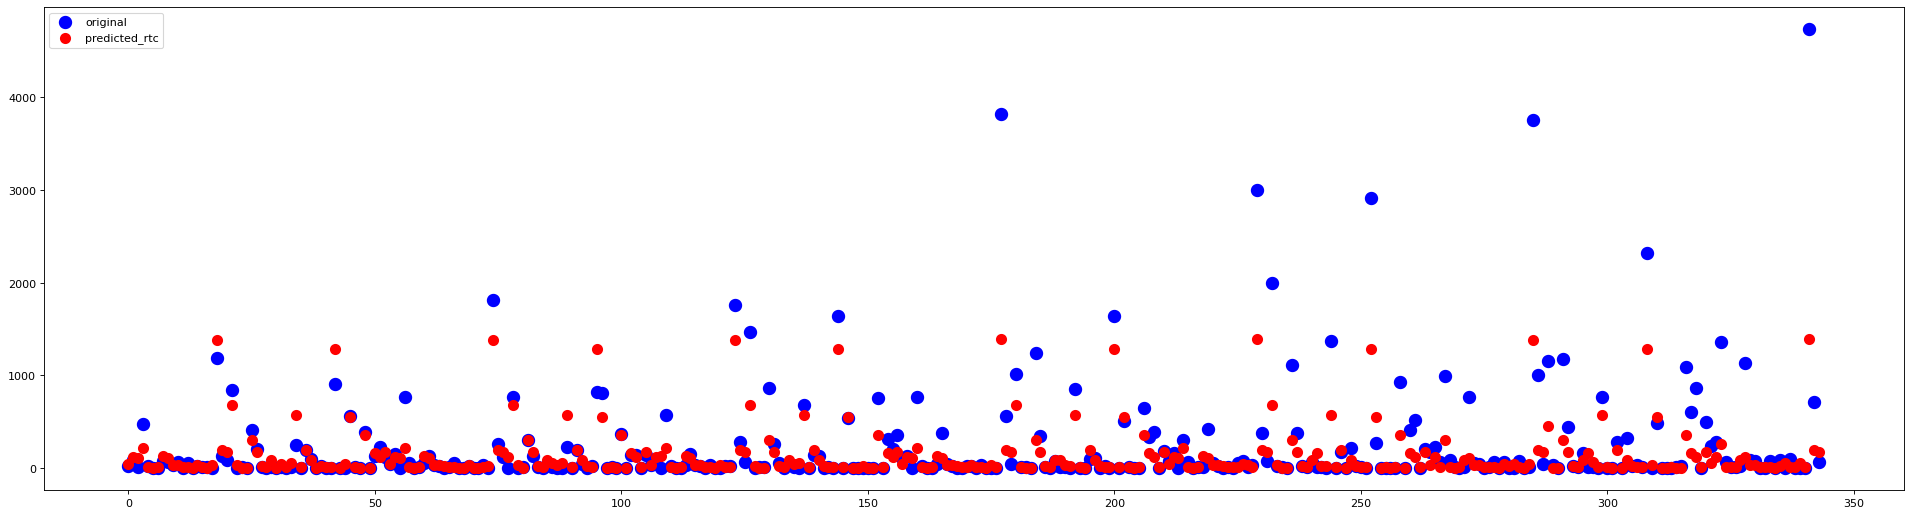

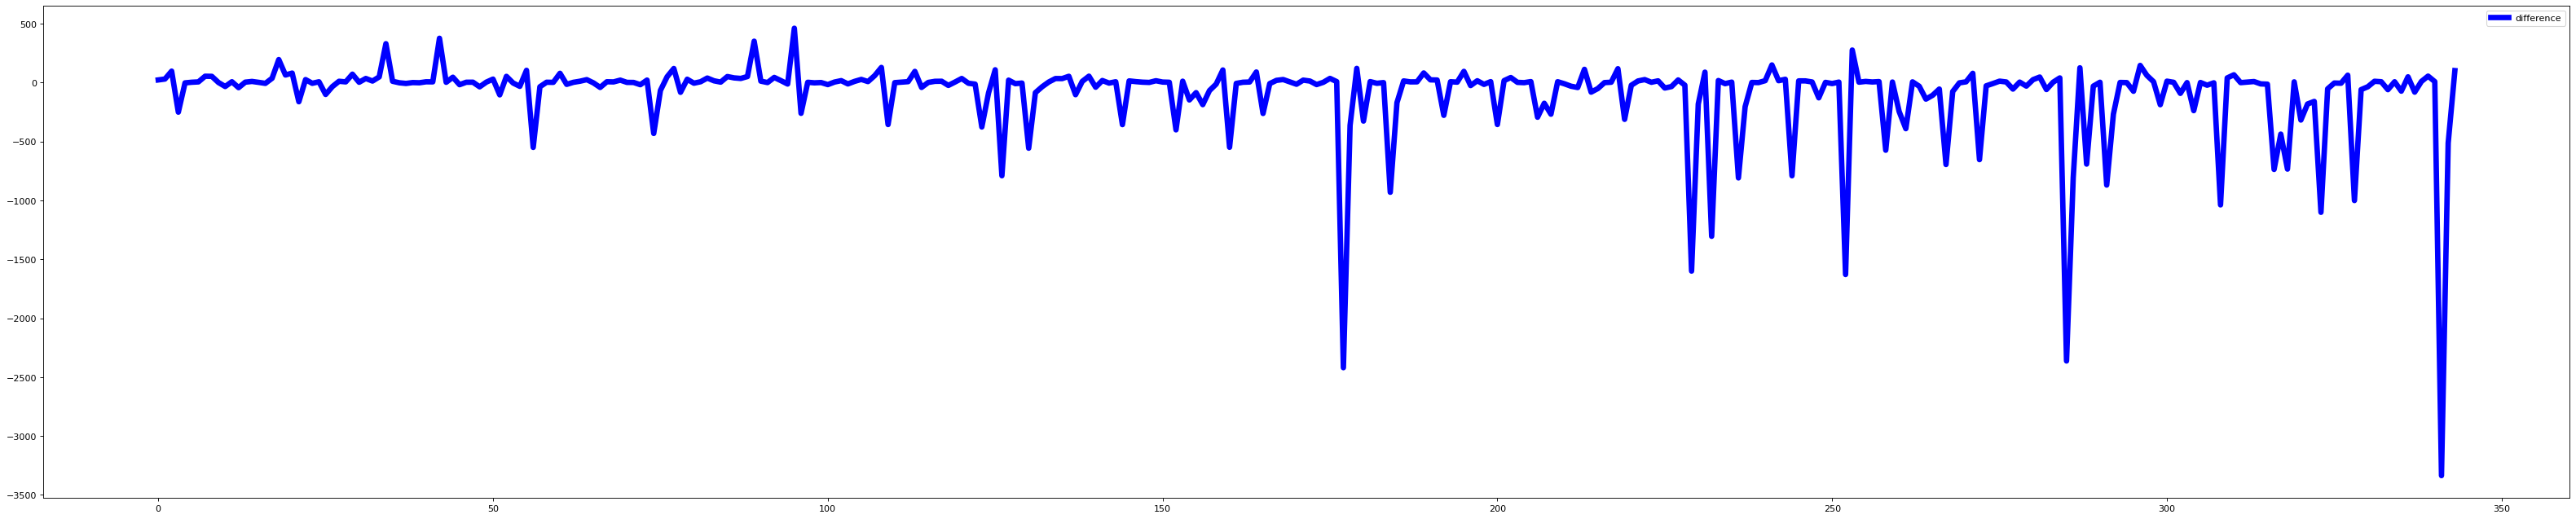

In [130]:
KNN(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

mae_knn_train_1:  80.61671511627905
mae_knn_test_1:  128.7313953488372
mse_knn_train_1:  51038.11590116278
mse_knn_test_1:  129331.58720930232
rmse_knn_train_1:  225.91617007457165
rmse_knn_test_1:  359.6270112342819
r2_knn_train_1:  0.7960346576913003
r2_knn_test_1:  0.5805680671013485
...............Prediction For 2020..................
January :  6277
Feburary :  6197
March :  6280
April :  6219
CoV :  1.5089736029541492
Variance Score 0.6100758901505068
MAPE % 92.23244233608436


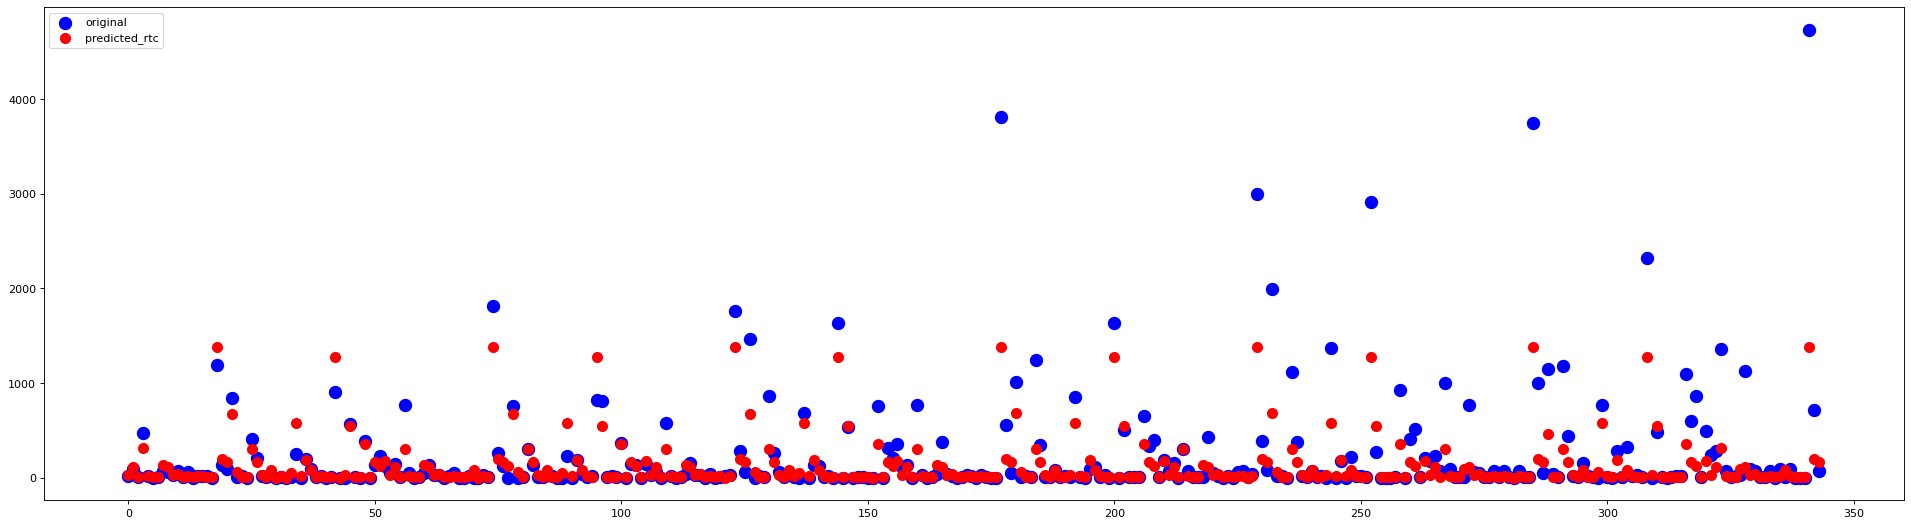

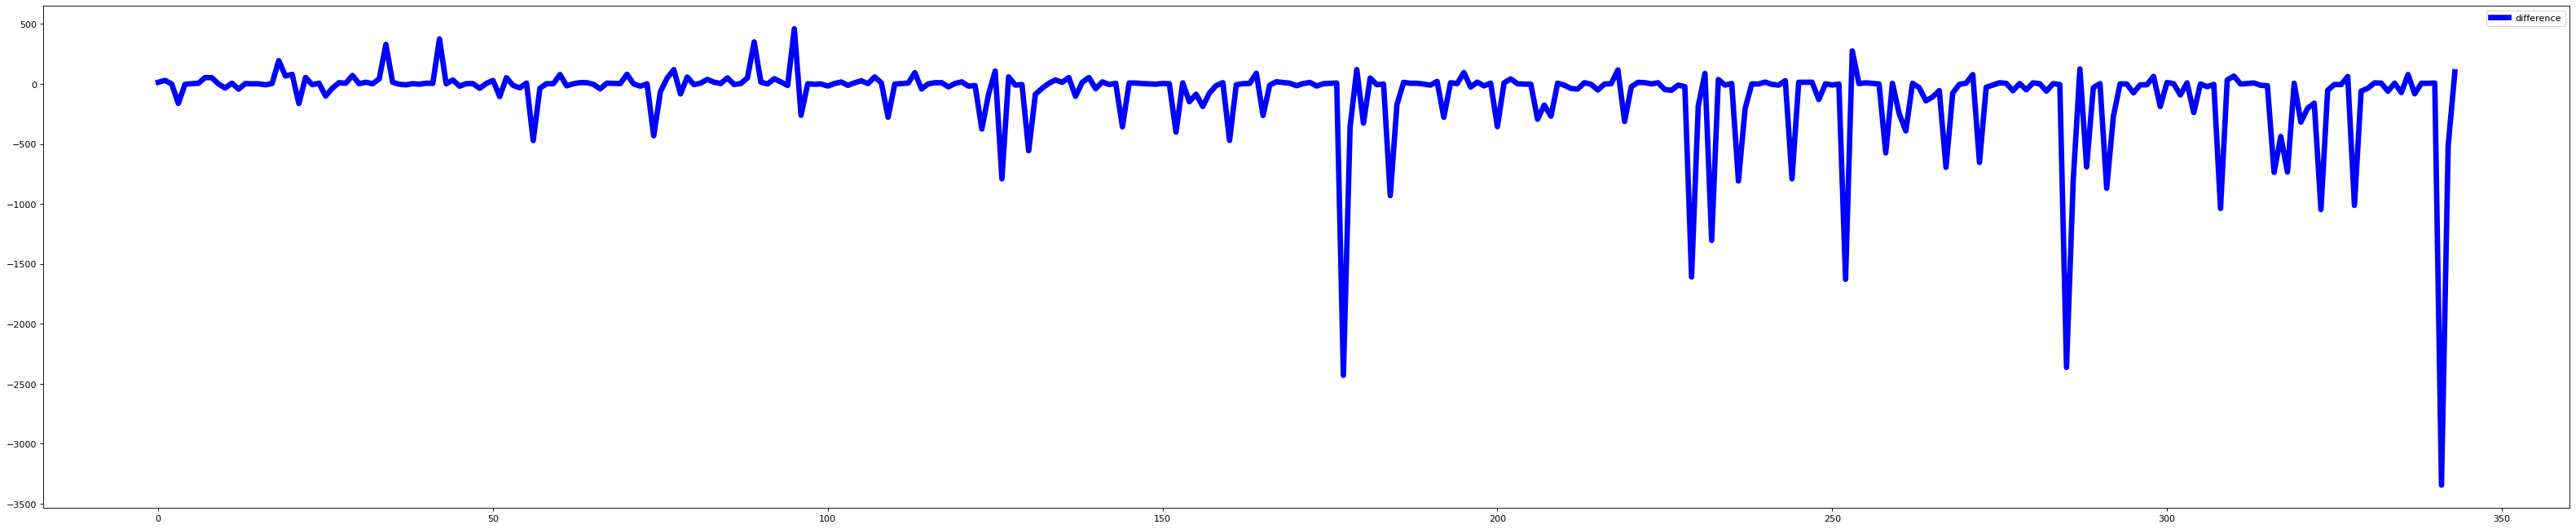

In [131]:
KNN(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

mae_knn_train_1:  84.76976744186047
mae_knn_test_1:  133.13372093023256
mse_knn_train_1:  54977.19715116279
mse_knn_test_1:  130254.44604651164
rmse_knn_train_1:  234.4721671140581
rmse_knn_test_1:  360.90780823710594
r2_knn_train_1:  0.7802927745643072
r2_knn_test_1:  0.577575167422039
...............Prediction For 2020..................
January :  8273
Feburary :  7563
March :  8120
April :  7765
CoV :  1.5143477511900425
Variance Score 0.6054026100820624
MAPE % 91.01604794096288


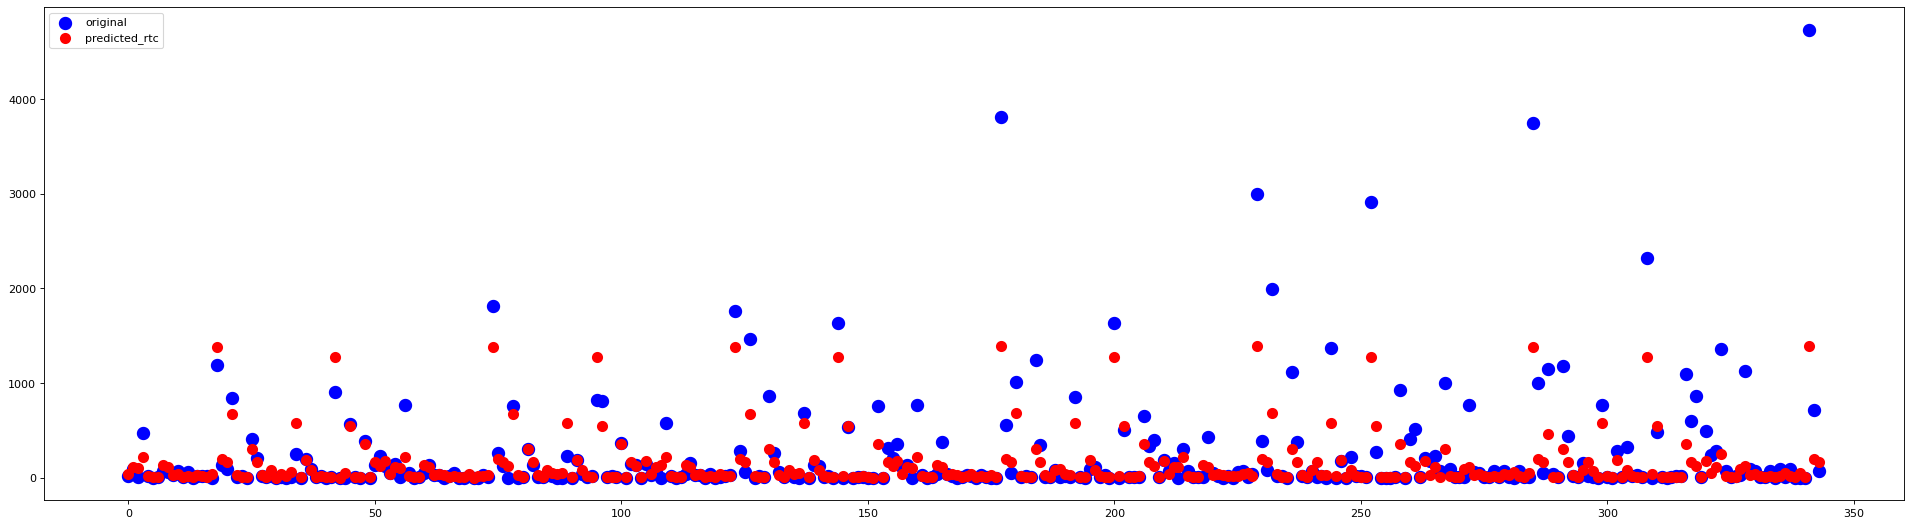

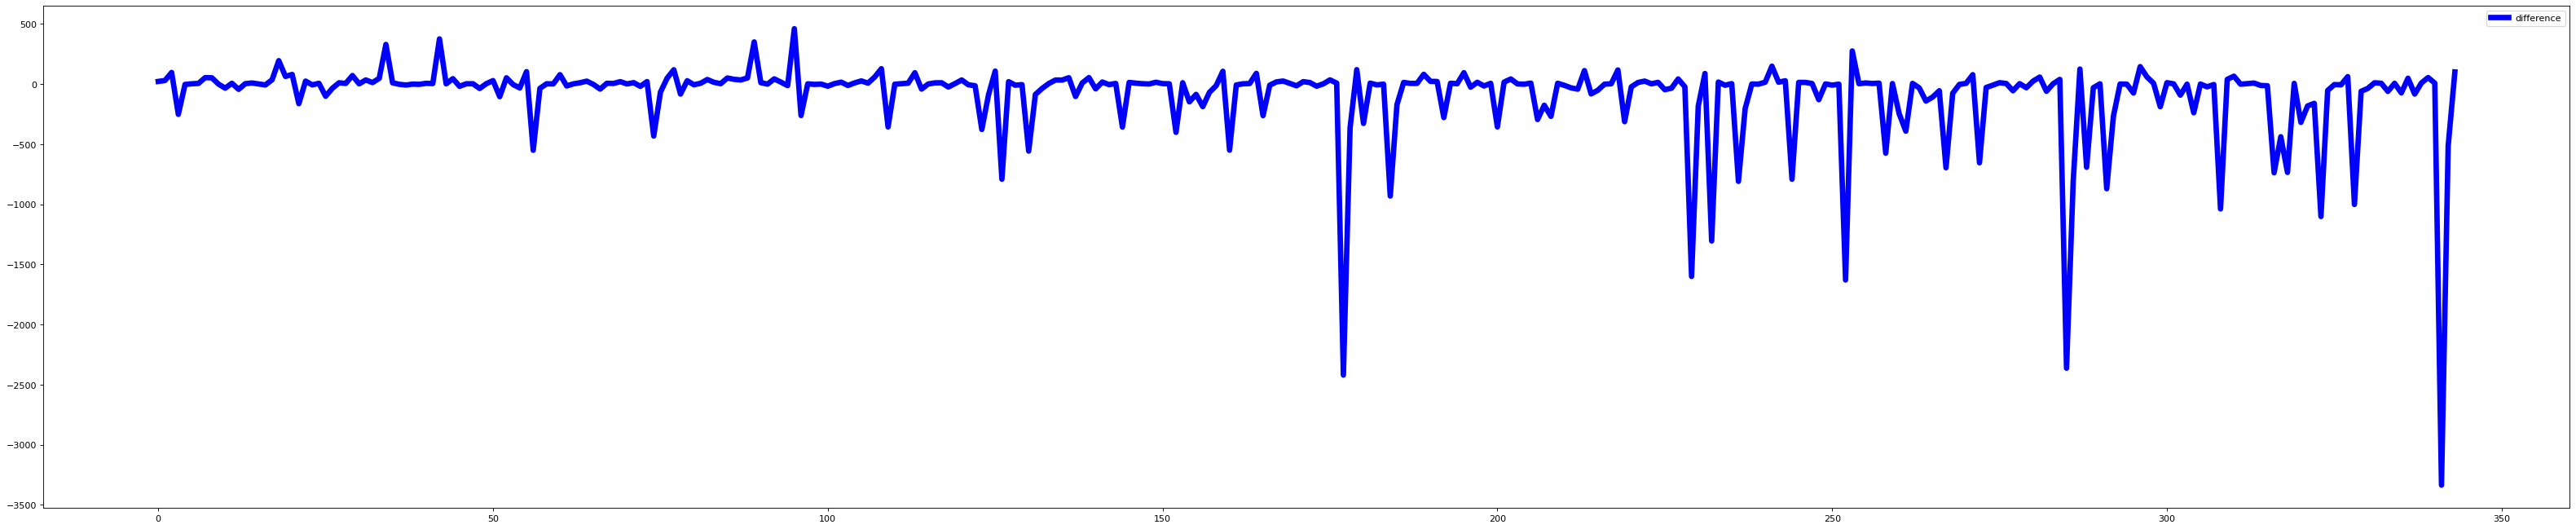

In [132]:
KNN(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**XGBoost MODELS OUTPUTS**

Best one in the XGBoost Models is 2. Group(Without Province)

MAE Train:  37.231817762454064
MAE Test:  224.11477942175642
MSE Train:  4789.697161036927
MSE Test:  282891.31429786567
RMSE Train:  69.20763802527094
RMSE Test:  531.8752807734776
R2 Train:  0.9808587718461674
R2 Test:  0.08256247900080338
...............Prediction For 2020..................
January :  1326
Feburary :  1569
March :  2741
April :  3164
CoV :  2.231717122683405
Variance Score 0.1219727409242547
MAPE % 307.53329200583573


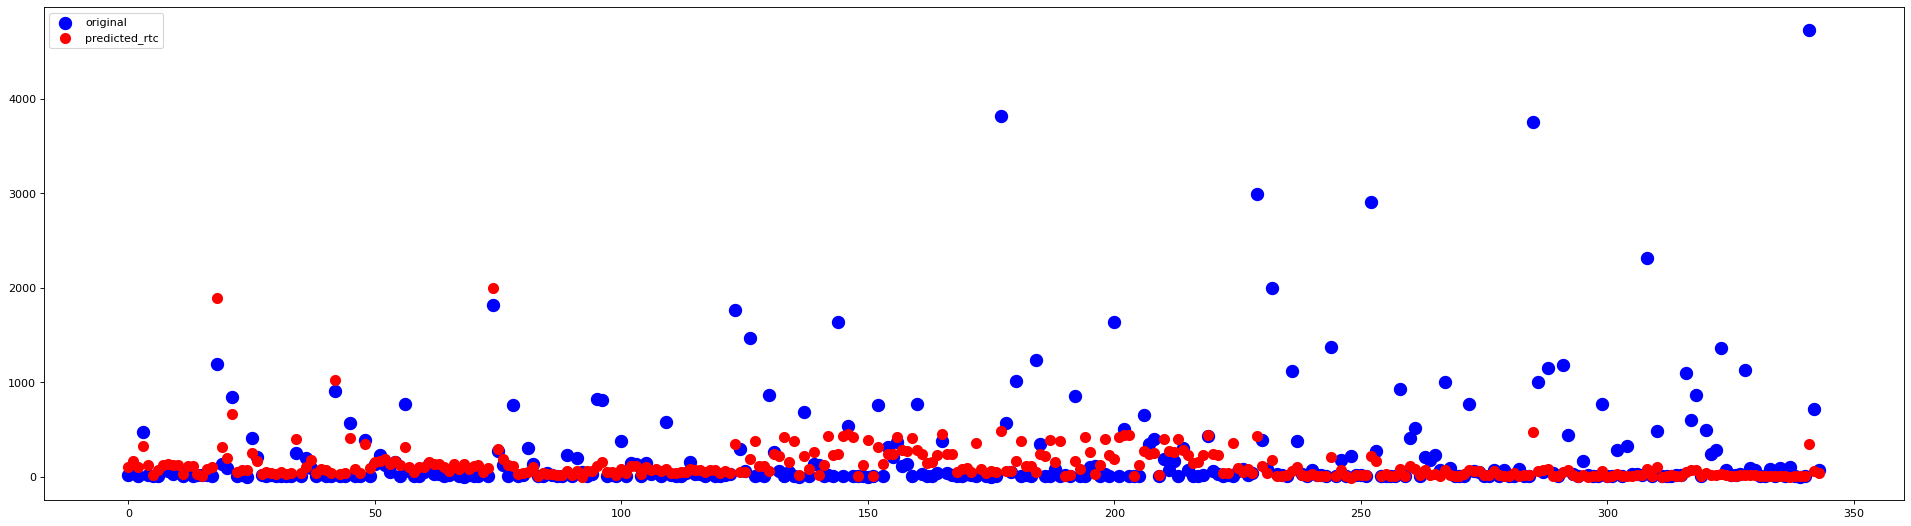

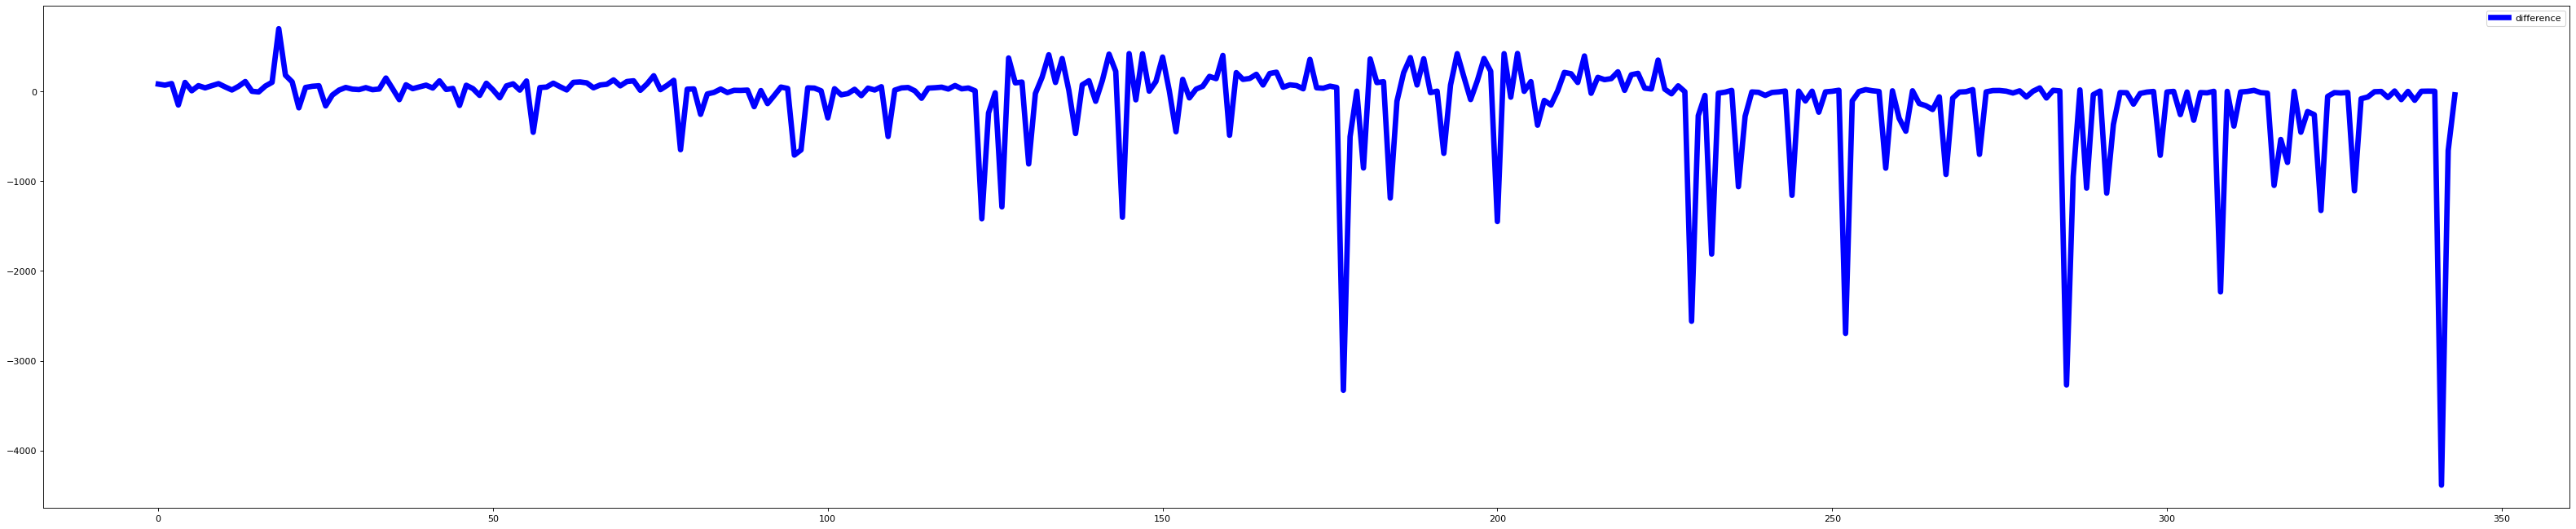

In [133]:
XGB(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  36.00255410236761
MAE Test:  124.87563574591348
MSE Train:  4384.652362015024
MSE Test:  94030.27049779145
RMSE Train:  66.21670757456175
RMSE Test:  306.6435561002244
R2 Train:  0.9824774660245116
R2 Test:  0.6950528563293237
...............Prediction For 2020..................
January :  9644
Feburary :  9457
March :  9522
April :  9369
CoV :  1.2866581686484824
Variance Score 0.7115053255841961
MAPE % 97.32147397168092


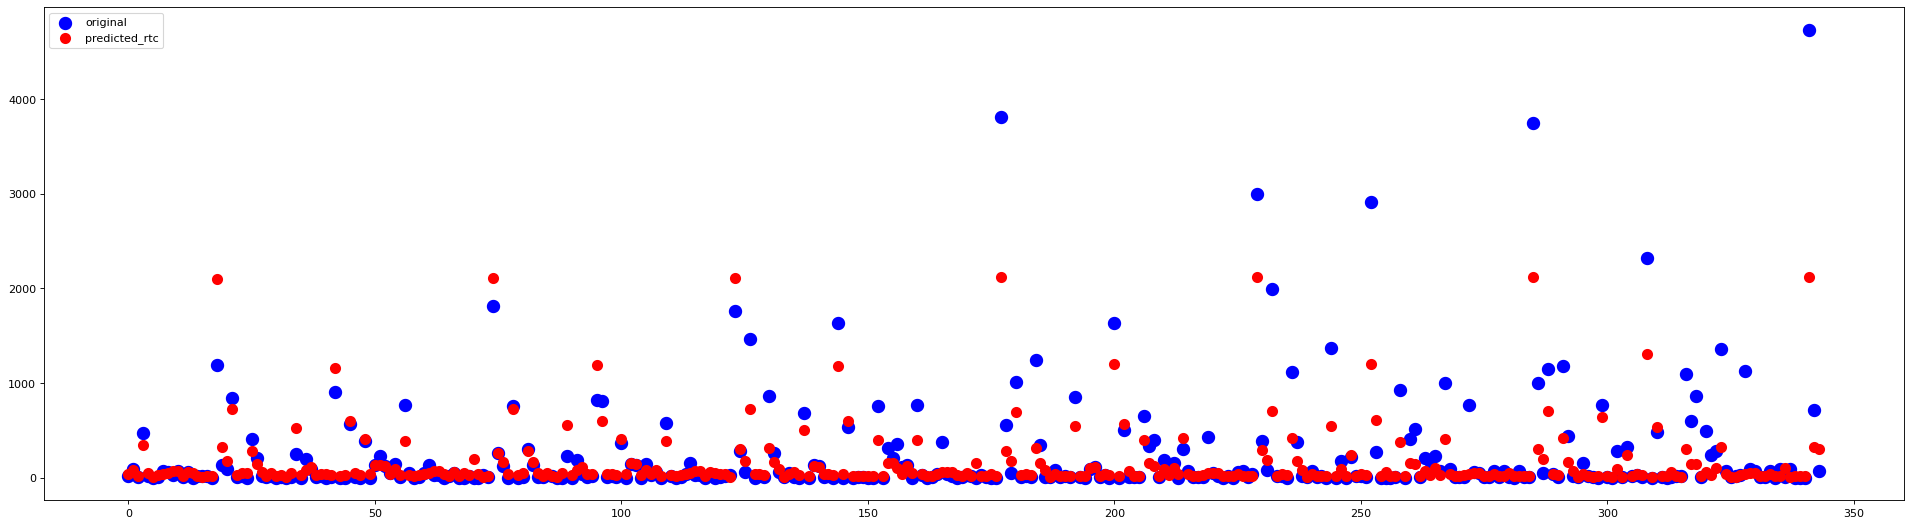

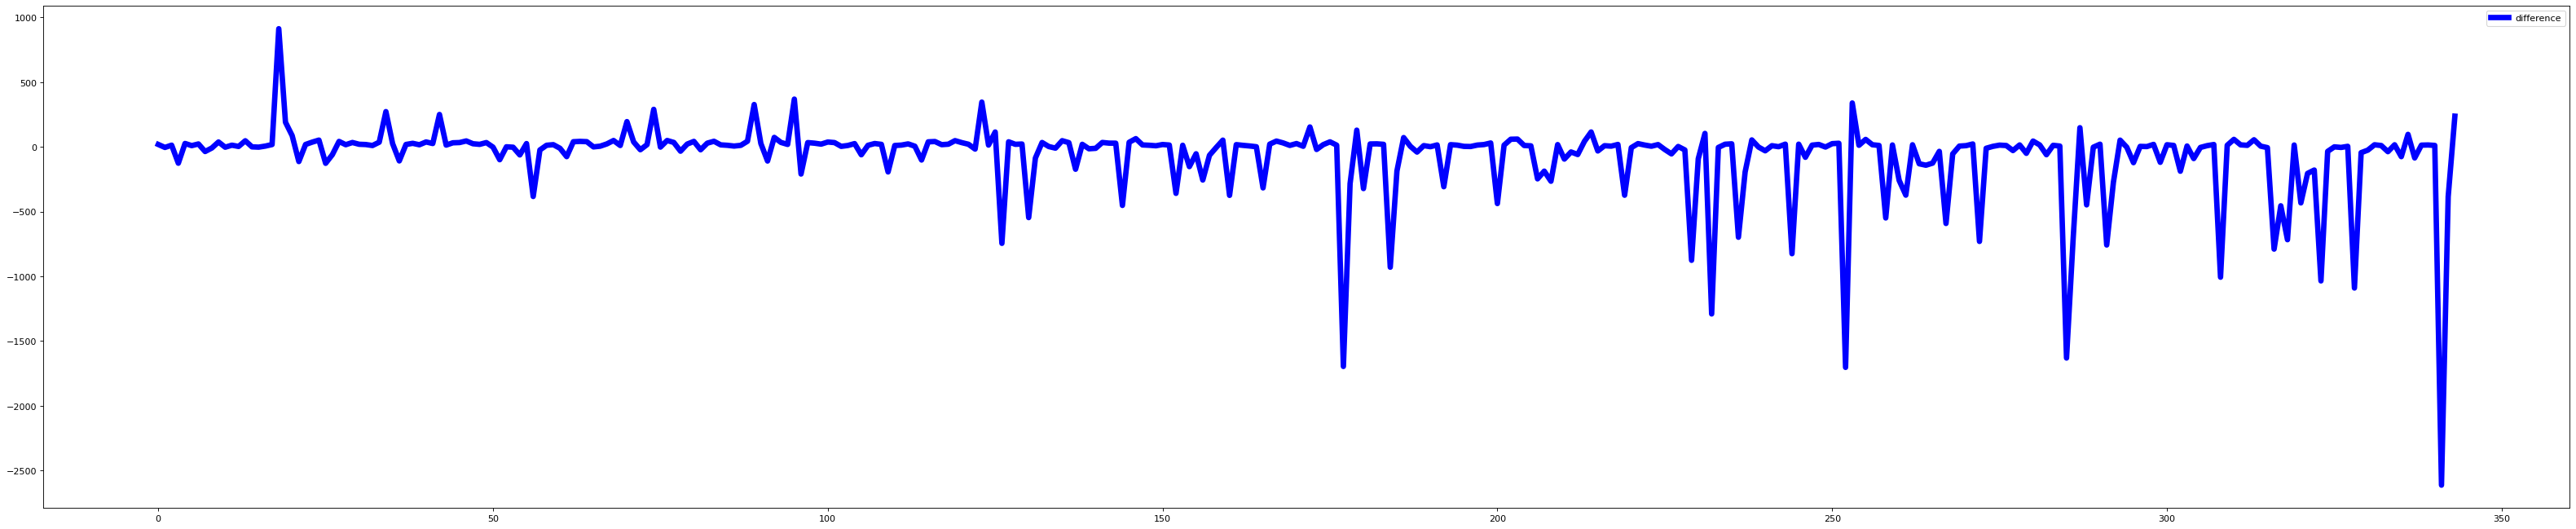

In [134]:
XGB(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  38.08305714742909
MAE Test:  214.9997456261758
MSE Train:  4900.534827531643
MSE Test:  281287.2436288012
RMSE Train:  70.00382009241812
RMSE Test:  530.3651983575103
R2 Train:  0.9804158275448718
R2 Test:  0.08776459919239221
...............Prediction For 2020..................
January :  1321
Feburary :  1608
March :  2989
April :  3385
CoV :  2.225380906457157
Variance Score 0.13744601206056517
MAPE % 330.5354695496297


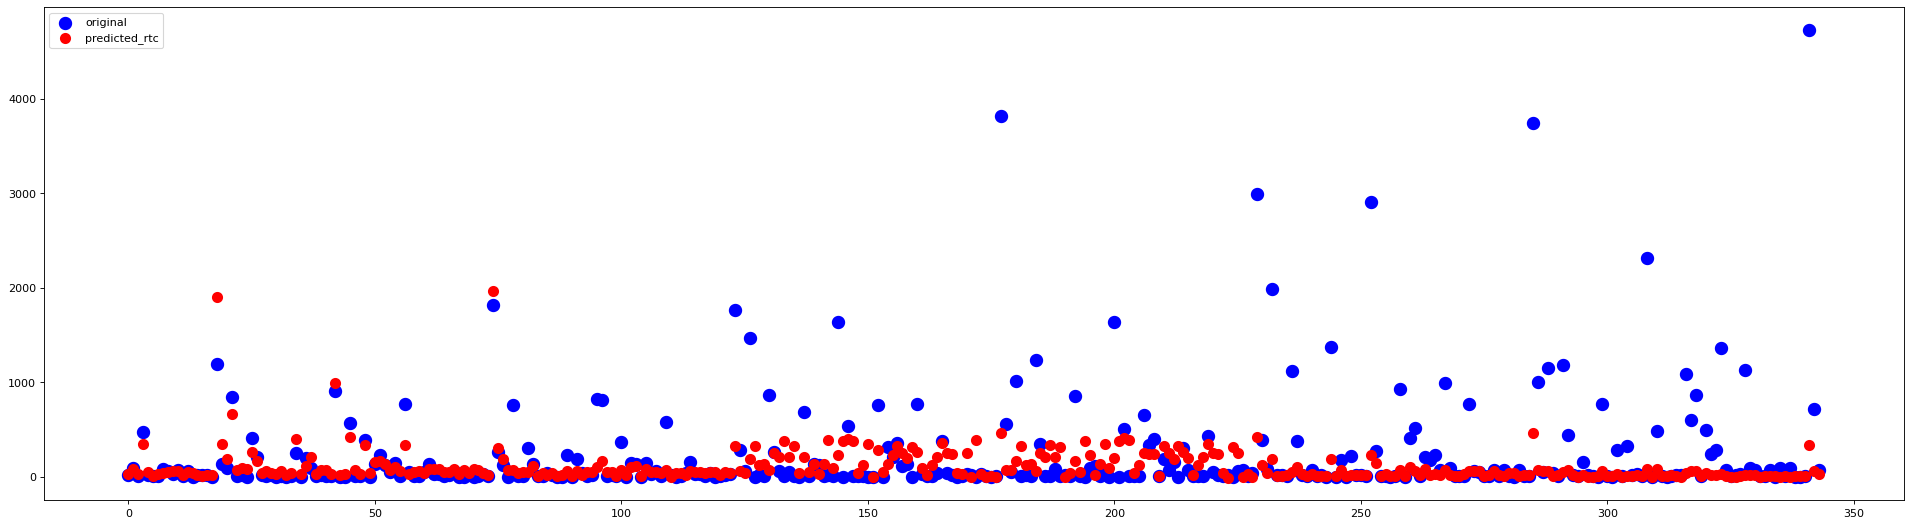

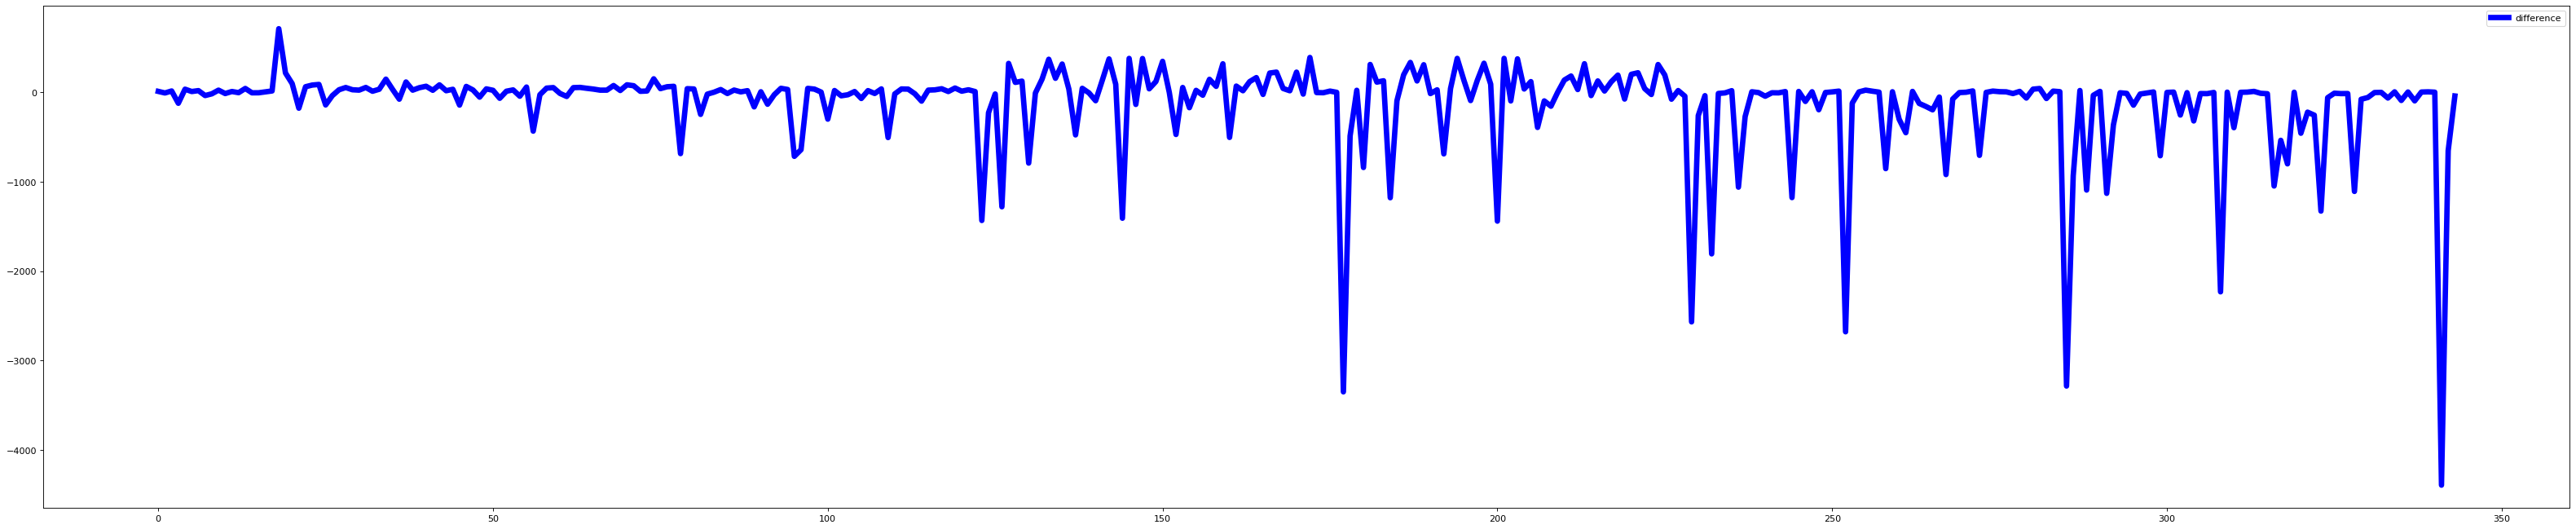

In [135]:
XGB(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Light GBM MODELS OUTPUTS**

Best one in the Light GBM Models is 2. Group(Without Province)

MAE Train:  4.267267094178397
MAE Test:  200.76353238403559
MSE Train:  122.60746544085318
MSE Test:  245133.67384725687
RMSE Train:  11.072825540071205
RMSE Test:  495.109759394073
R2 Train:  0.9995100196545916
R2 Test:  0.20501330835822784
...............Prediction For 2020..................
January :  1310
Feburary :  1636
March :  1224
April :  -3697
CoV :  2.0774511762241548
Variance Score 0.29459977894353195
MAPE % 363.0822941351547


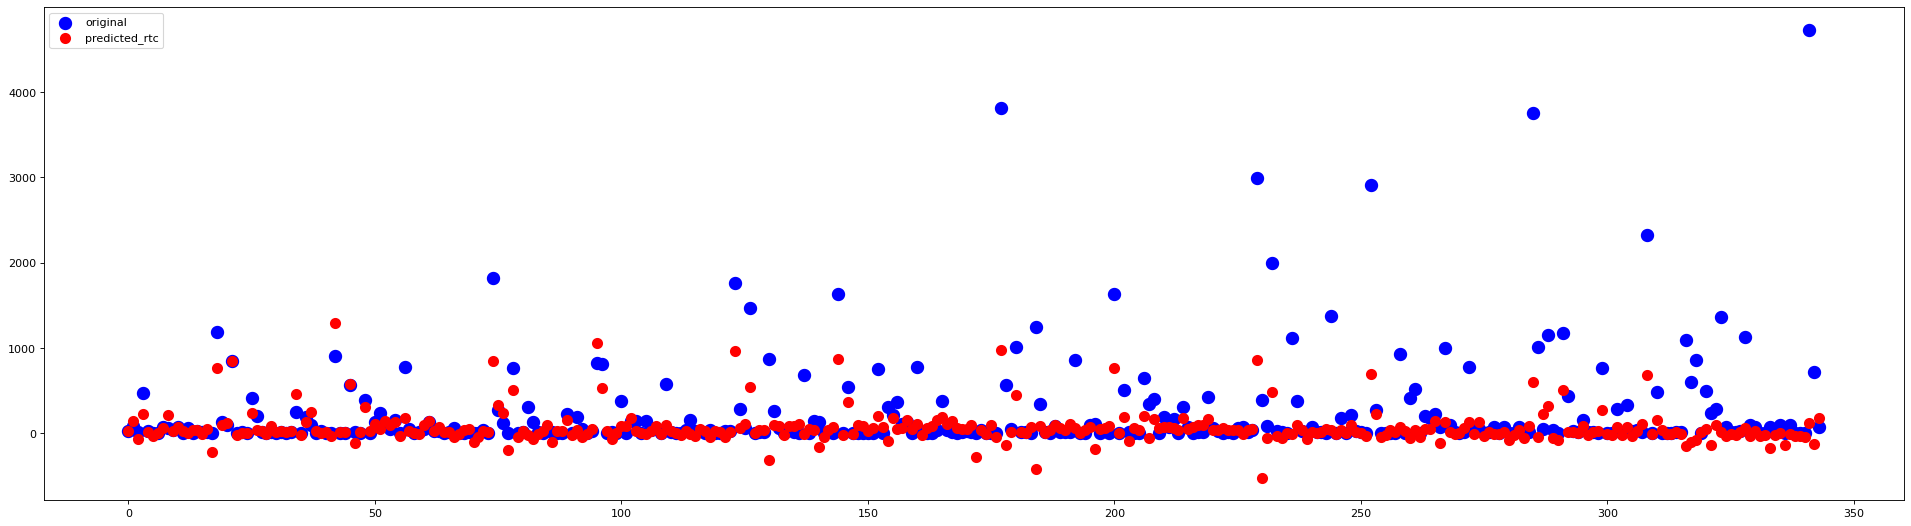

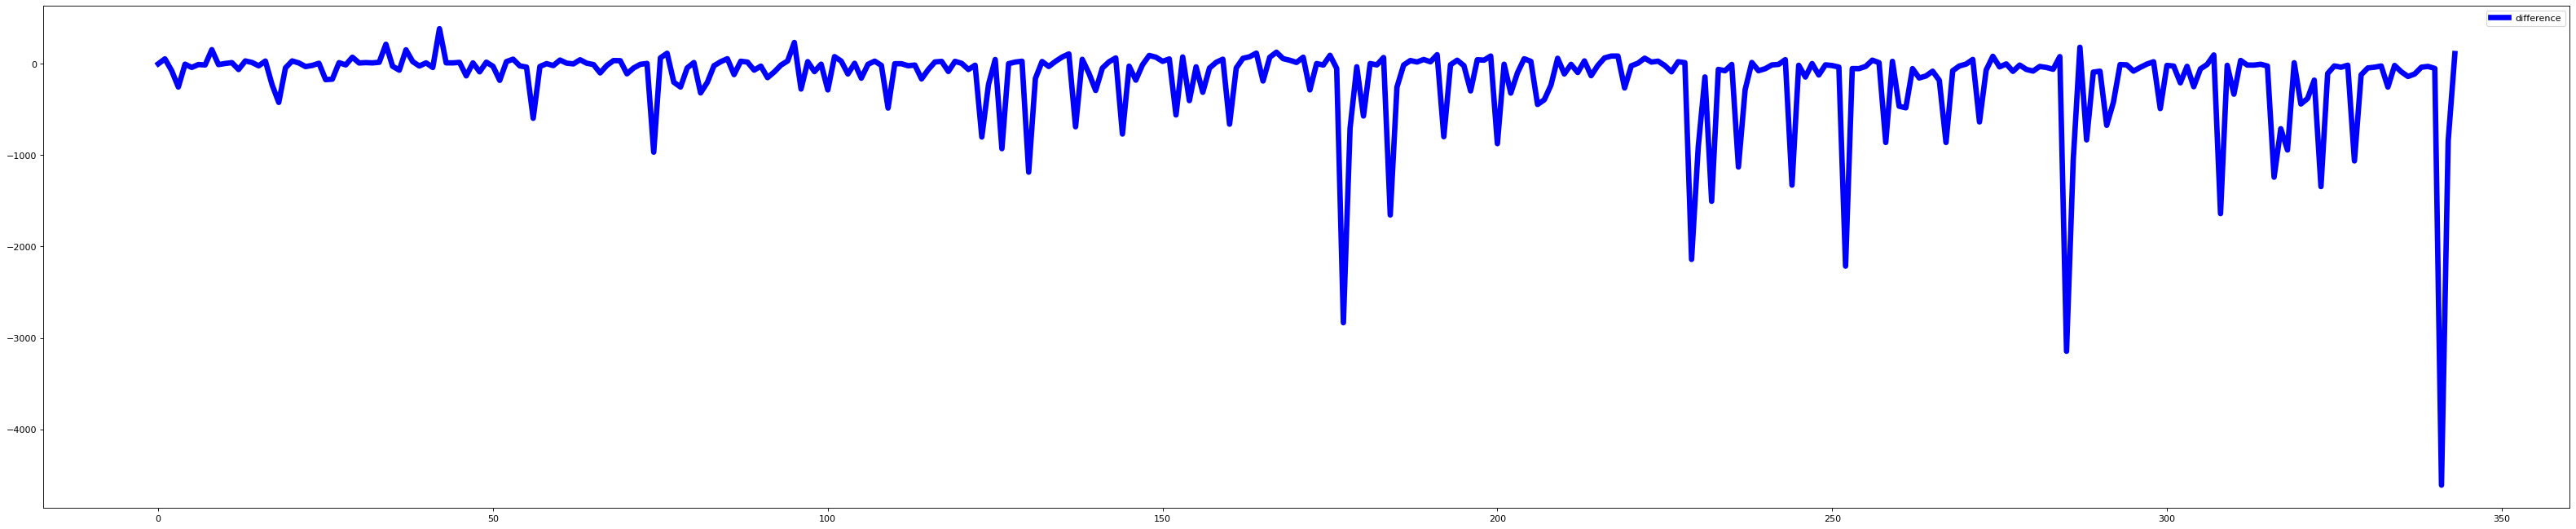

In [136]:
lgbmReg(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  5.862130230656532
MAE Test:  141.56175868086137
MSE Train:  201.70540654354454
MSE Test:  130434.24789329898
RMSE Train:  14.20230286057668
RMSE Test:  361.15681897660323
R2 Train:  0.9991939178873522
R2 Test:  0.5769920566927573
...............Prediction For 2020..................
January :  5968
Feburary :  6304
March :  6219
April :  5729
CoV :  1.5153925854795023
Variance Score 0.5916061132128192
MAPE % 244.46077962699806


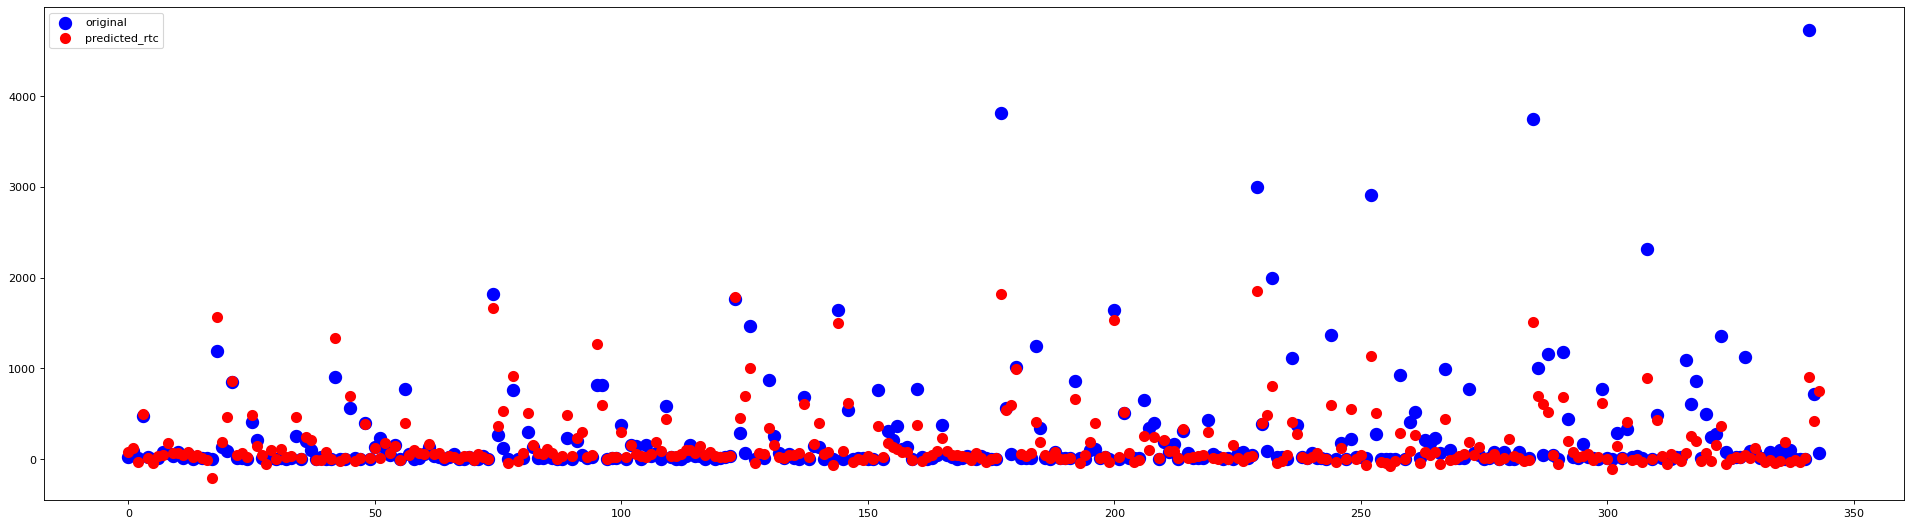

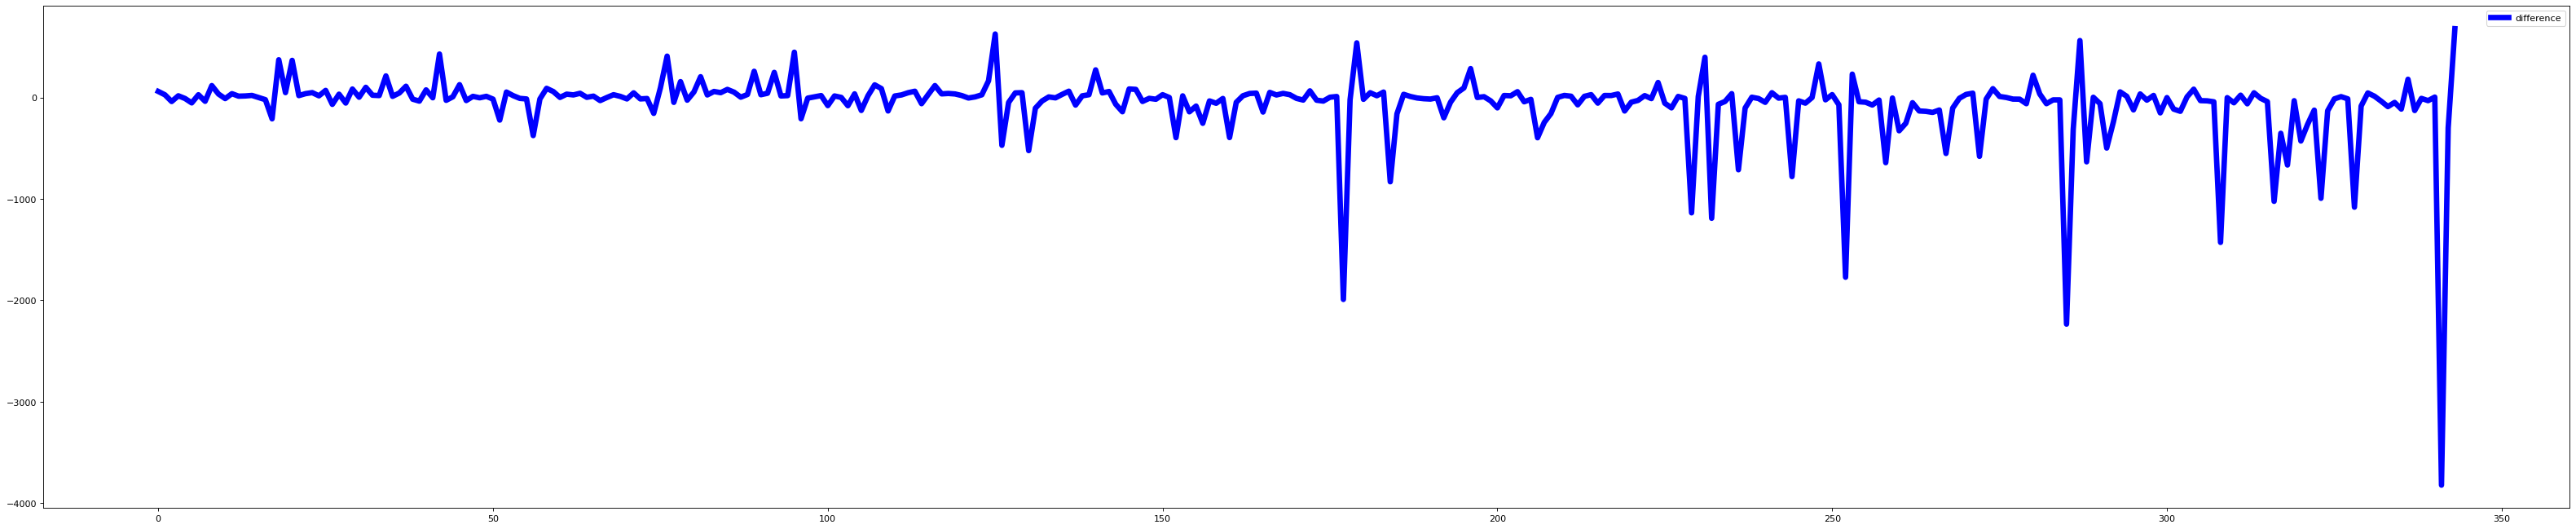

In [137]:
lgbmReg(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  5.887500622006997
MAE Test:  198.37747366846375
MSE Train:  201.96078816807562
MSE Test:  233522.76135792857
RMSE Train:  14.211290869167222
RMSE Test:  483.2419283939759
R2 Train:  0.9991928972971611
R2 Test:  0.24266835901677097
...............Prediction For 2020..................
January :  -1
Feburary :  -863
March :  1024
April :  -1101
CoV :  2.027654461450133
Variance Score 0.29597983892338997
MAPE % 285.40748815340754


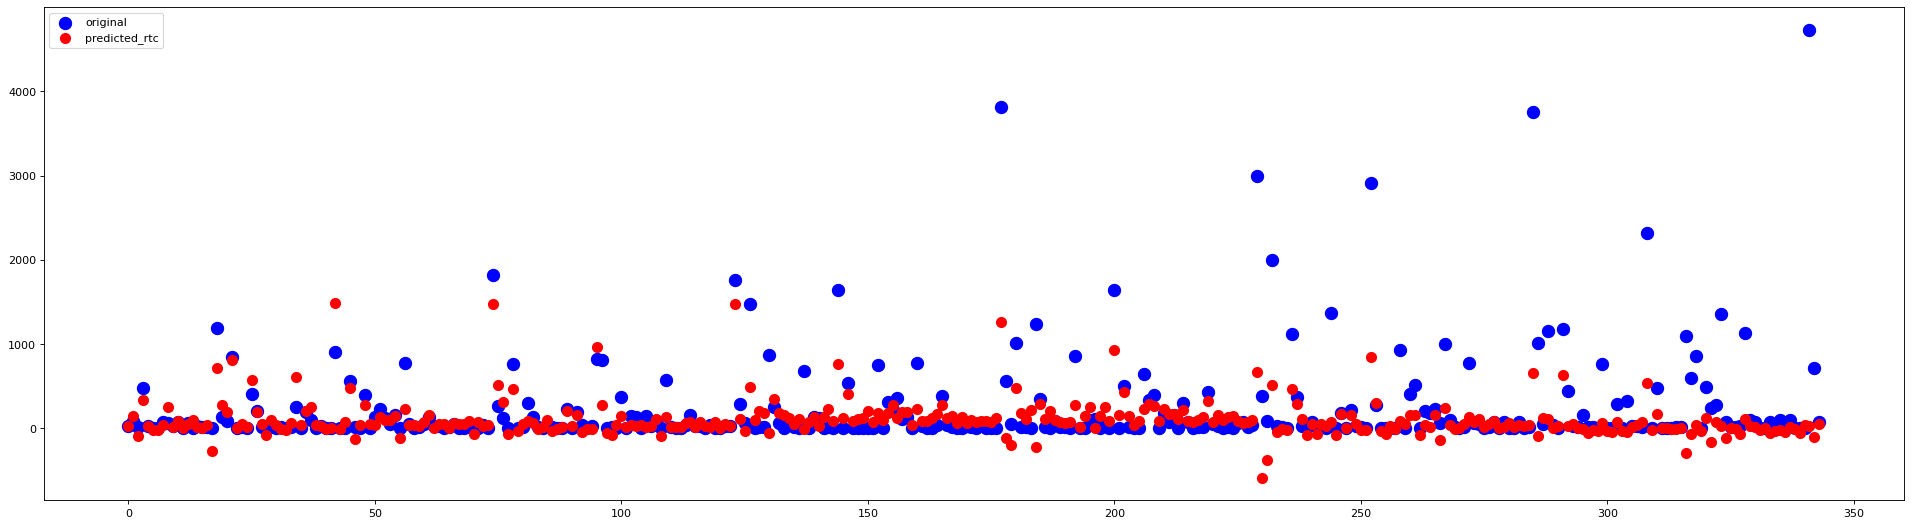

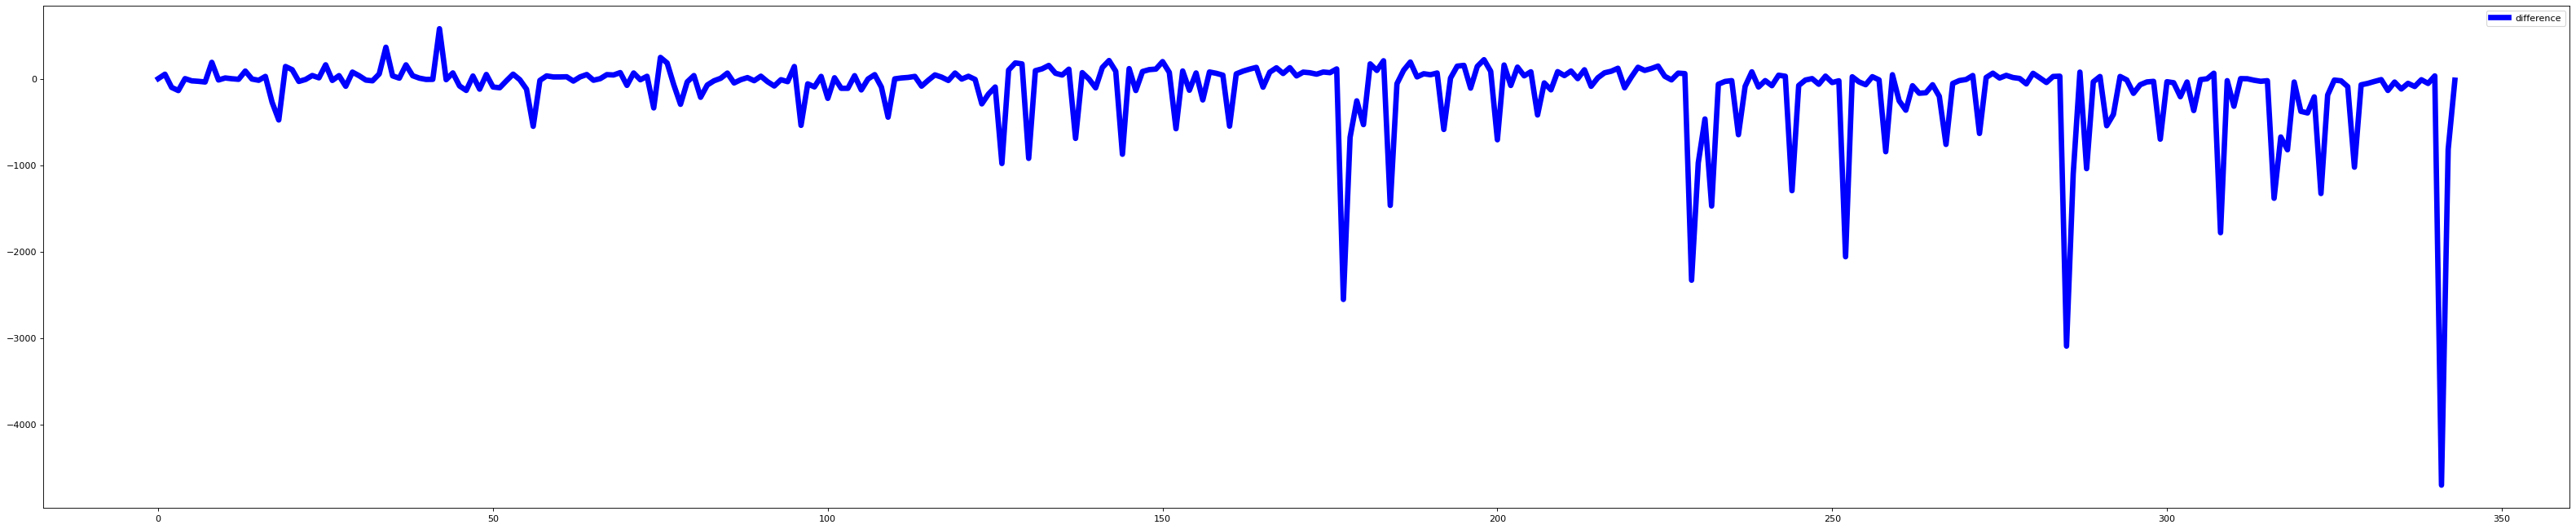

In [138]:
lgbmReg(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Random Forest Regressor MODELS OUTPUTS**

Best one in the Random Forest Regressor Models is 2. Group(Without Province)

MAE Train:  30.099933932346726
MAE Test:  198.59371035940802
MSE Train:  8798.016548866039
MSE Test:  274989.2906505862
RMSE Train:  93.79774277063409
RMSE Test:  524.394213021641
R2 Train:  0.9648401900159841
R2 Test:  0.10818932796868552
...............Prediction For 2020..................
January :  1663
Feburary :  1922
March :  2633
April :  3130
CoV 2.200327006238345
Variance Score 0.17779103839427324
MAPE % 253.97462202299002


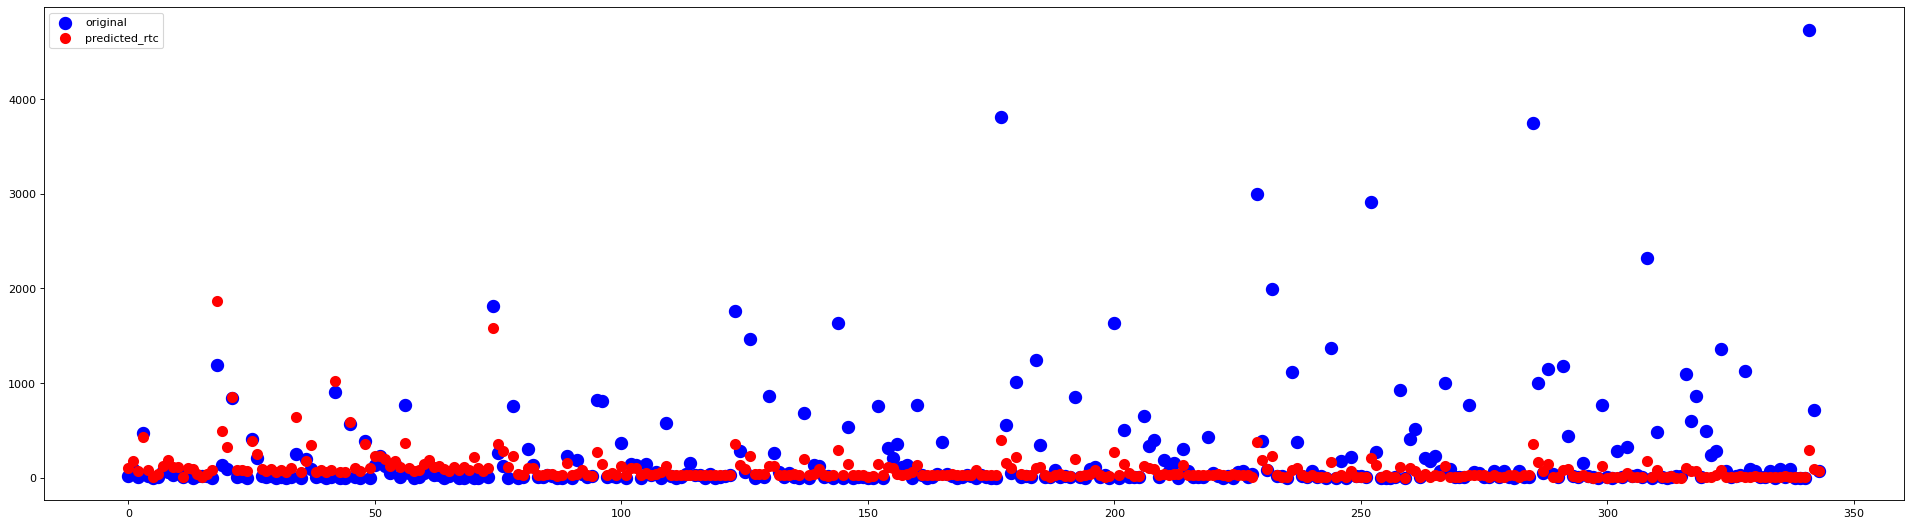

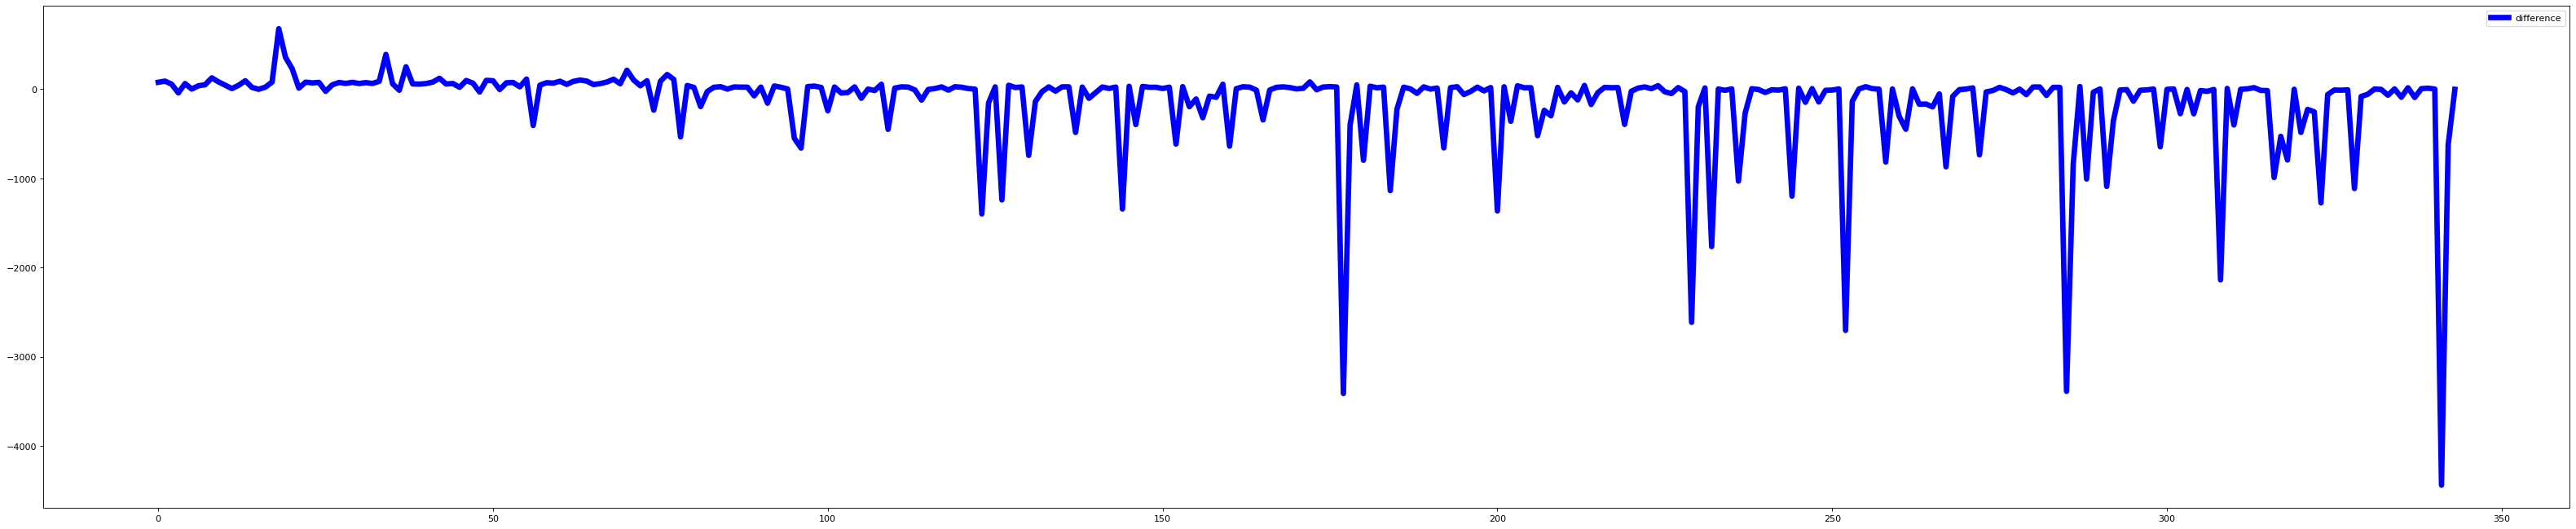

In [139]:
RFR(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  28.02519820295983
MAE Test:  127.83461945031713
MSE Train:  7588.83388069383
MSE Test:  98343.01316452048
RMSE Train:  87.11391324406125
RMSE Test:  313.59689597398835
R2 Train:  0.9696724874562952
R2 Test:  0.6810663118831226
...............Prediction For 2020..................
January :  9204
Feburary :  9720
March :  9523
April :  9473
CoV 1.3158339702265318
Variance Score 0.6903104532759319
MAPE % 79.22630817738732


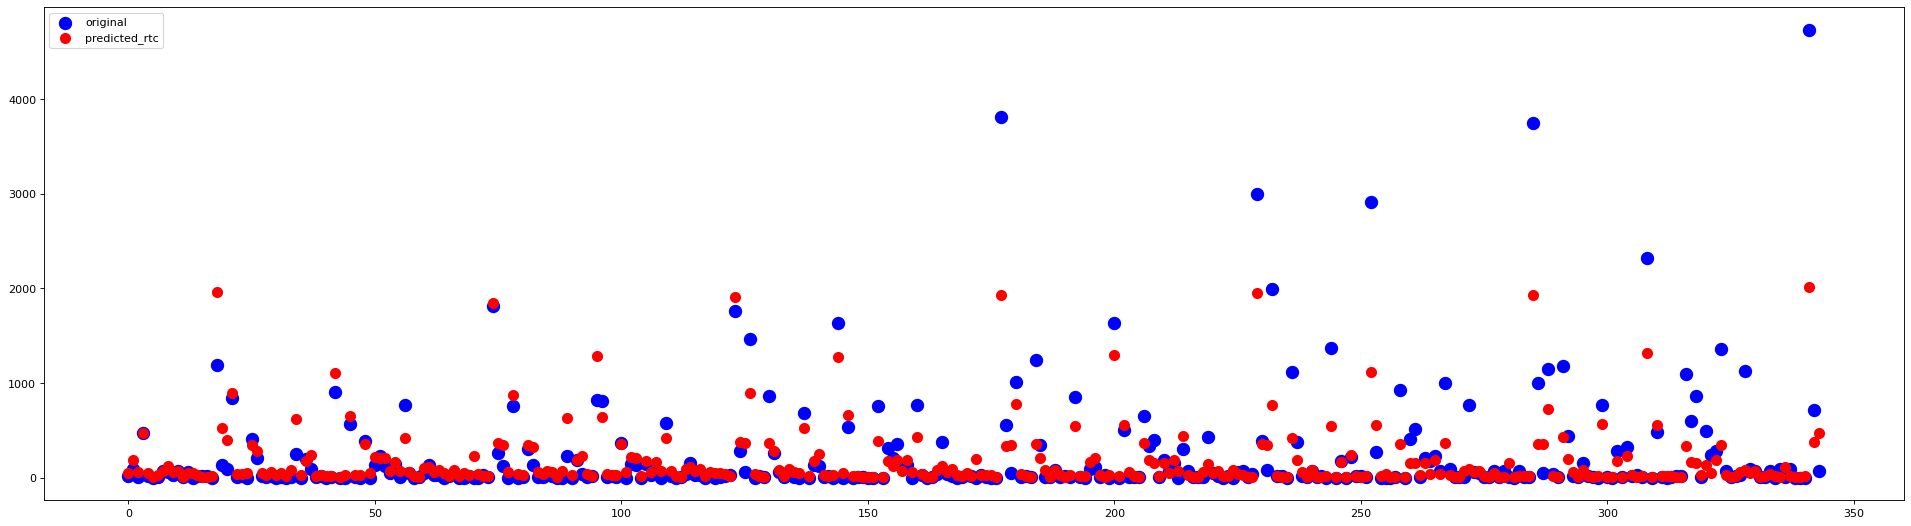

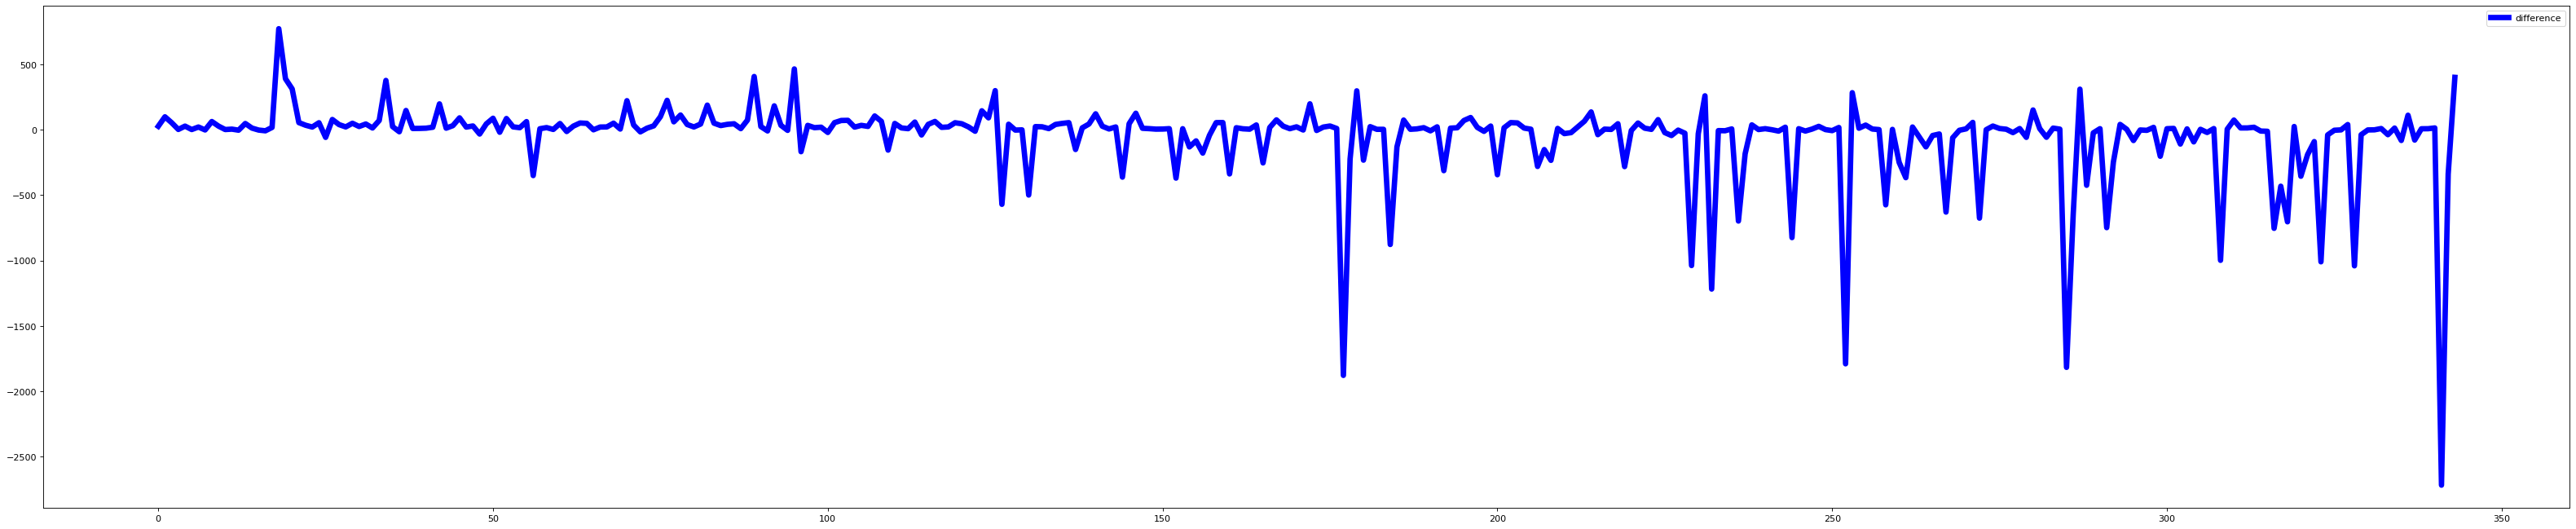

In [140]:
RFR(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  29.262566067653278
MAE Test:  195.9892706131078
MSE Train:  8389.413929223525
MSE Test:  272719.68286469346
RMSE Train:  91.59374394151341
RMSE Test:  522.2257010763578
R2 Train:  0.9664731024327553
R2 Test:  0.11554983440875766
...............Prediction For 2020..................
January :  1872
Feburary :  2044
March :  2643
April :  3088
CoV 2.191228058770822
Variance Score 0.1849882171492443
MAPE % 264.9645915490525


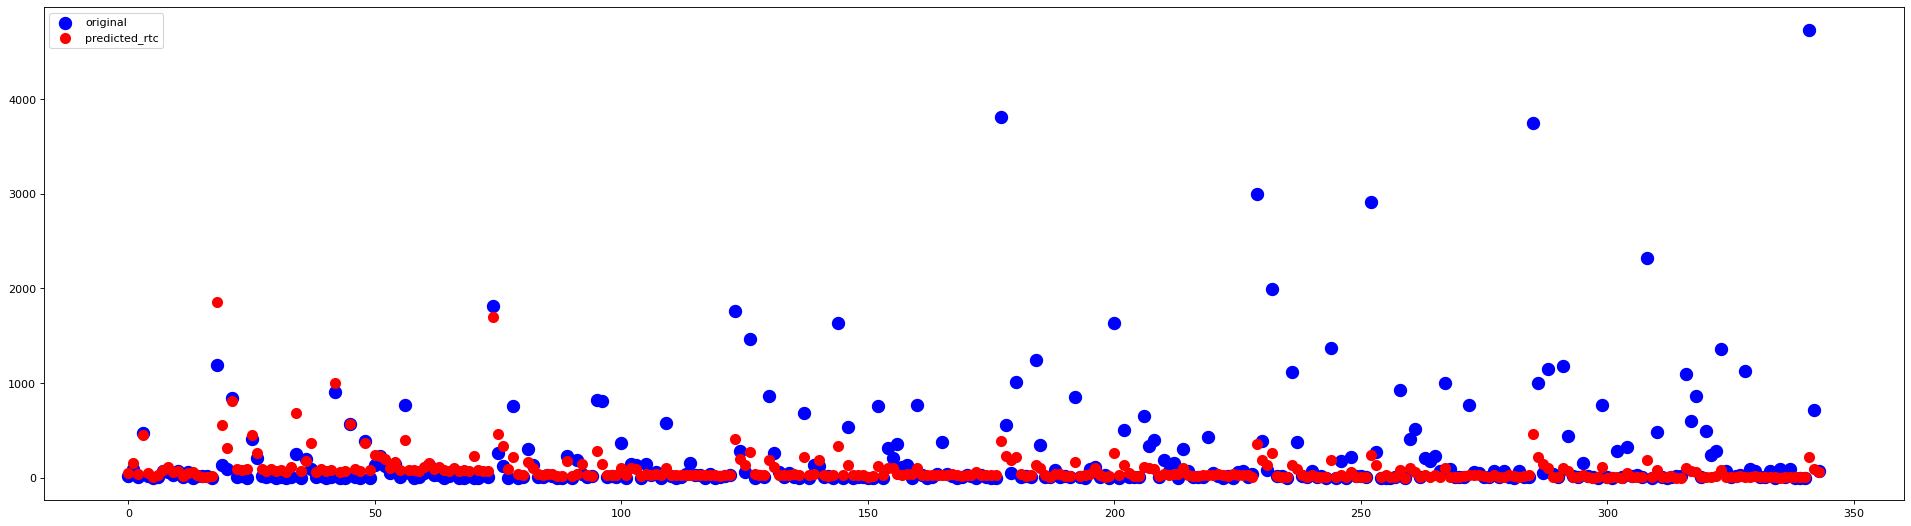

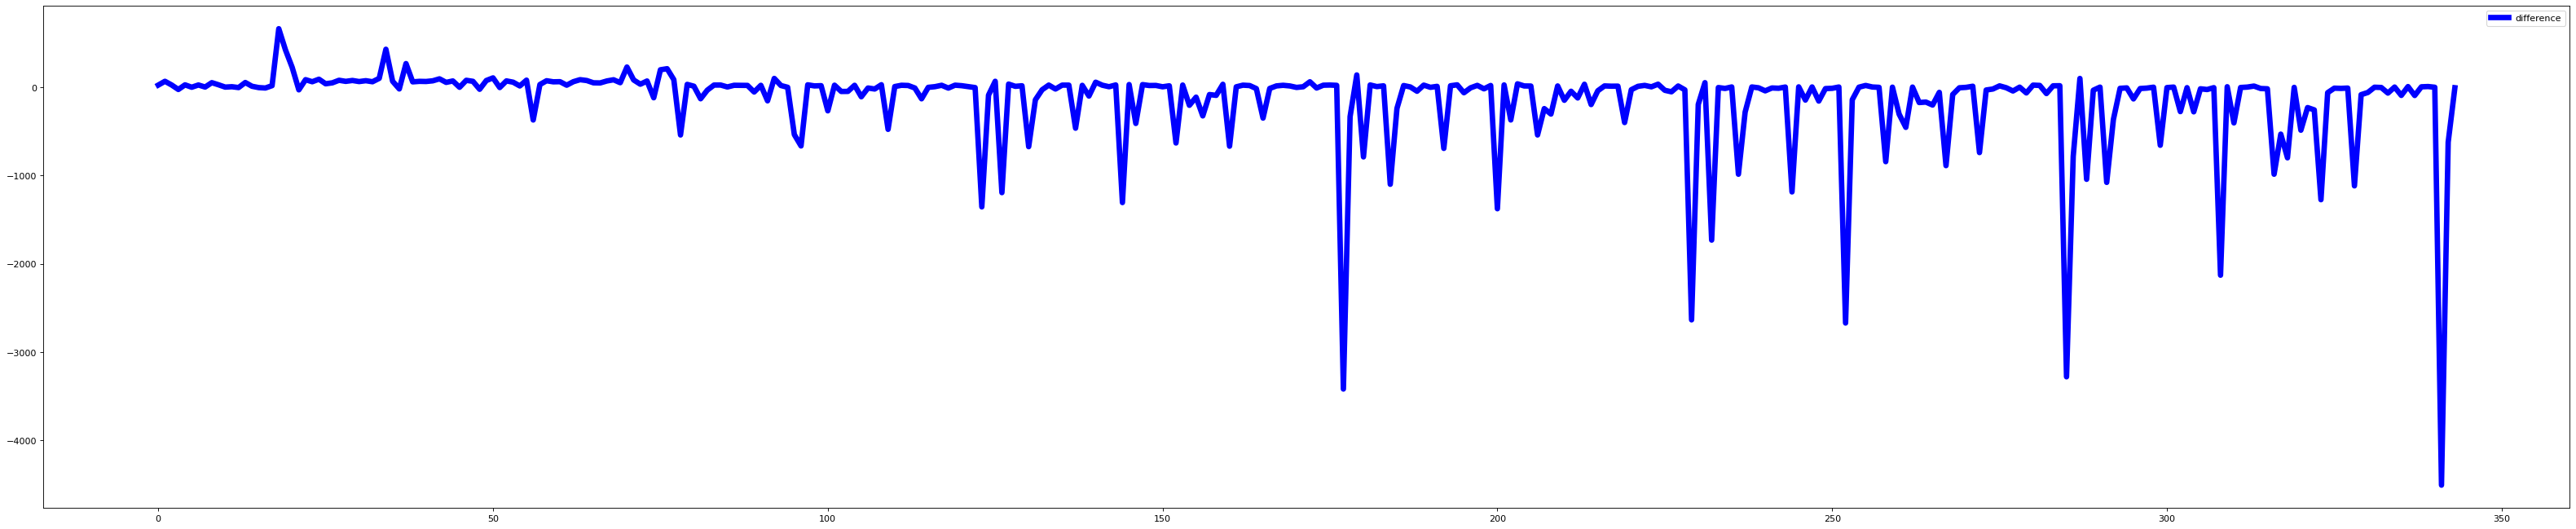

In [141]:
RFR(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Linear Regression MODELS OUTPUTS**

Best one in the Linear Regression Models is 3. Group(Without Province and Province)

MAE Train:  203.22198835655206
MAE Test:  380.20985890174506
MSE Train:  145142.4629506476
MSE Test:  326603.86427889625
RMSE Train:  380.9756723868961
RMSE Test:  571.4926633640158
R2 Train:  0.4199622847248924
R2 Test:  -0.05920056378008565
...............Prediction For 2020..................
January :  -47827
Feburary :  -41024
March :  -45376
April :  -49573
CoV : 2.397949309587498
Variance Score 0.35257605653467494
MAPE % 282.32789236494426


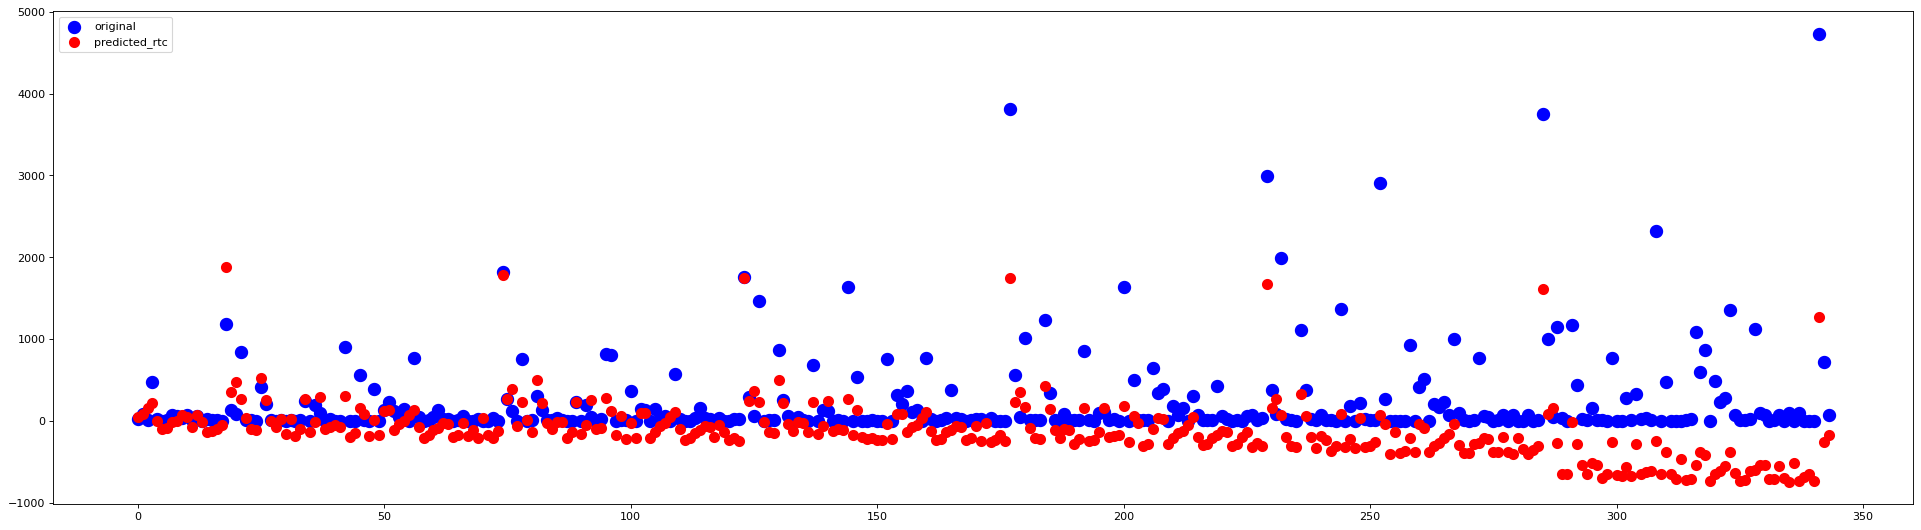

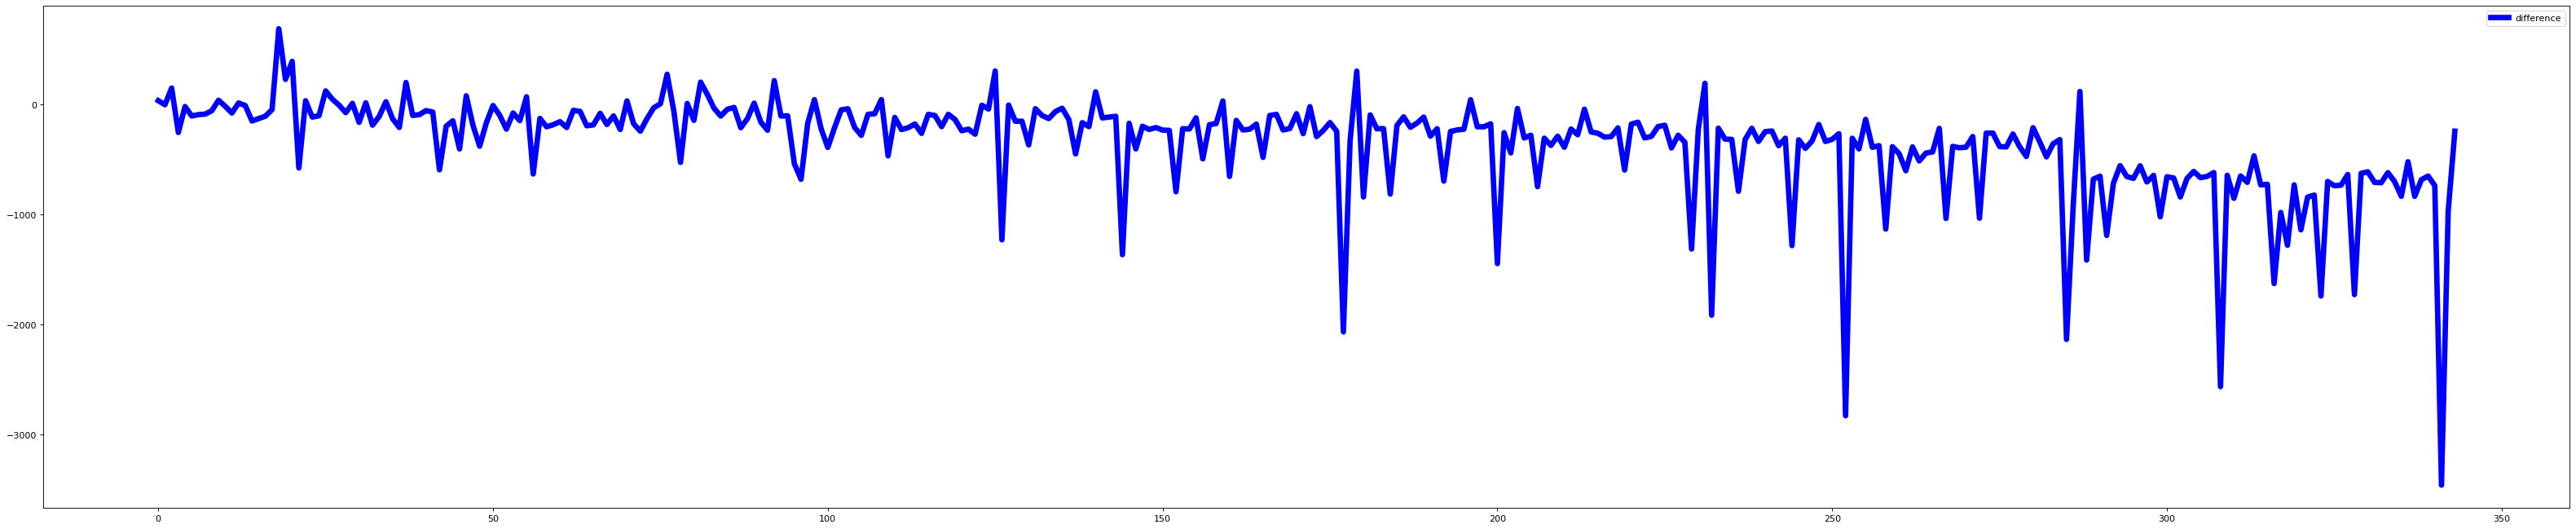

In [142]:
LinearRes(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  203.4393283674347
MAE Test:  371.64661362230083
MSE Train:  145685.712315633
MSE Test:  319253.2265961059
RMSE Train:  381.6879776933418
RMSE Test:  565.0249787364324
R2 Train:  0.417791278982776
R2 Test:  -0.03536190040436349
...............Prediction For 2020..................
January :  -46922
Feburary :  -40044
March :  -44031
April :  -47889
CoV : 2.3708112886091524
Variance Score 0.35225096168425996
MAPE % 321.1819337673973


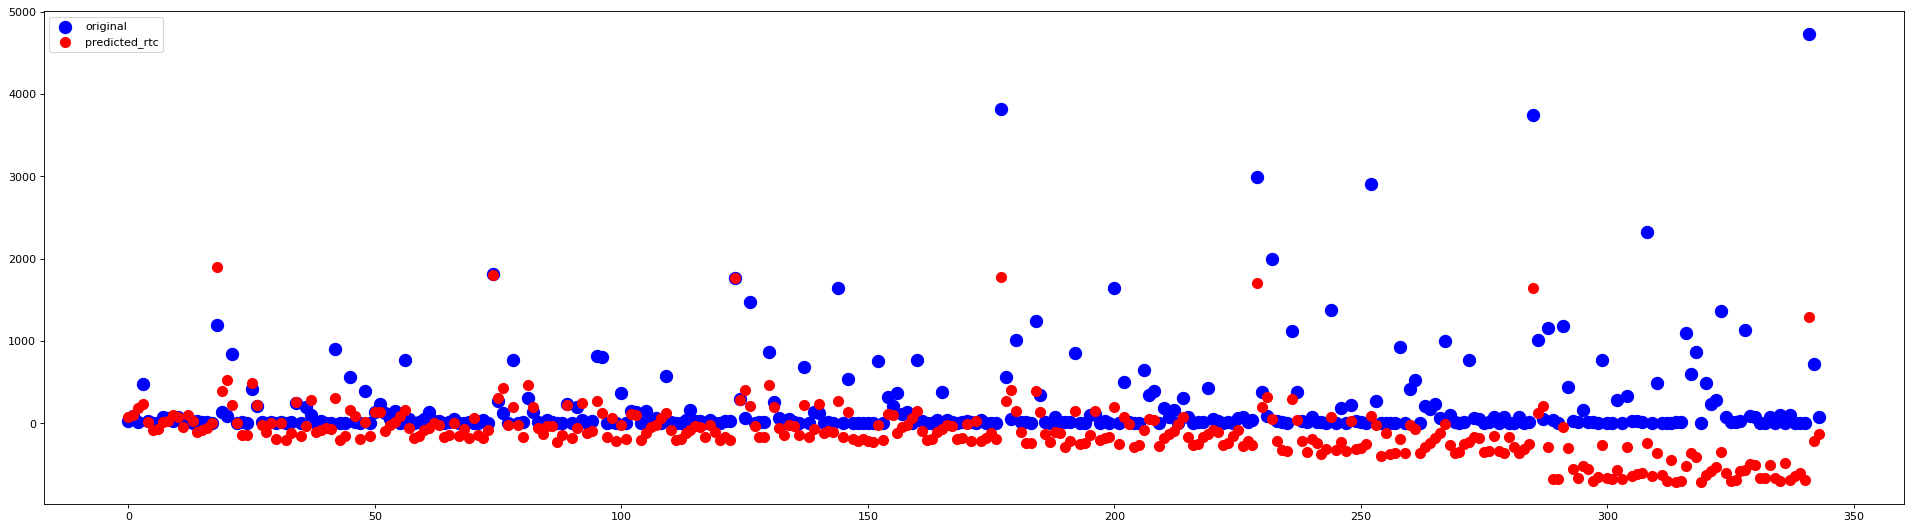

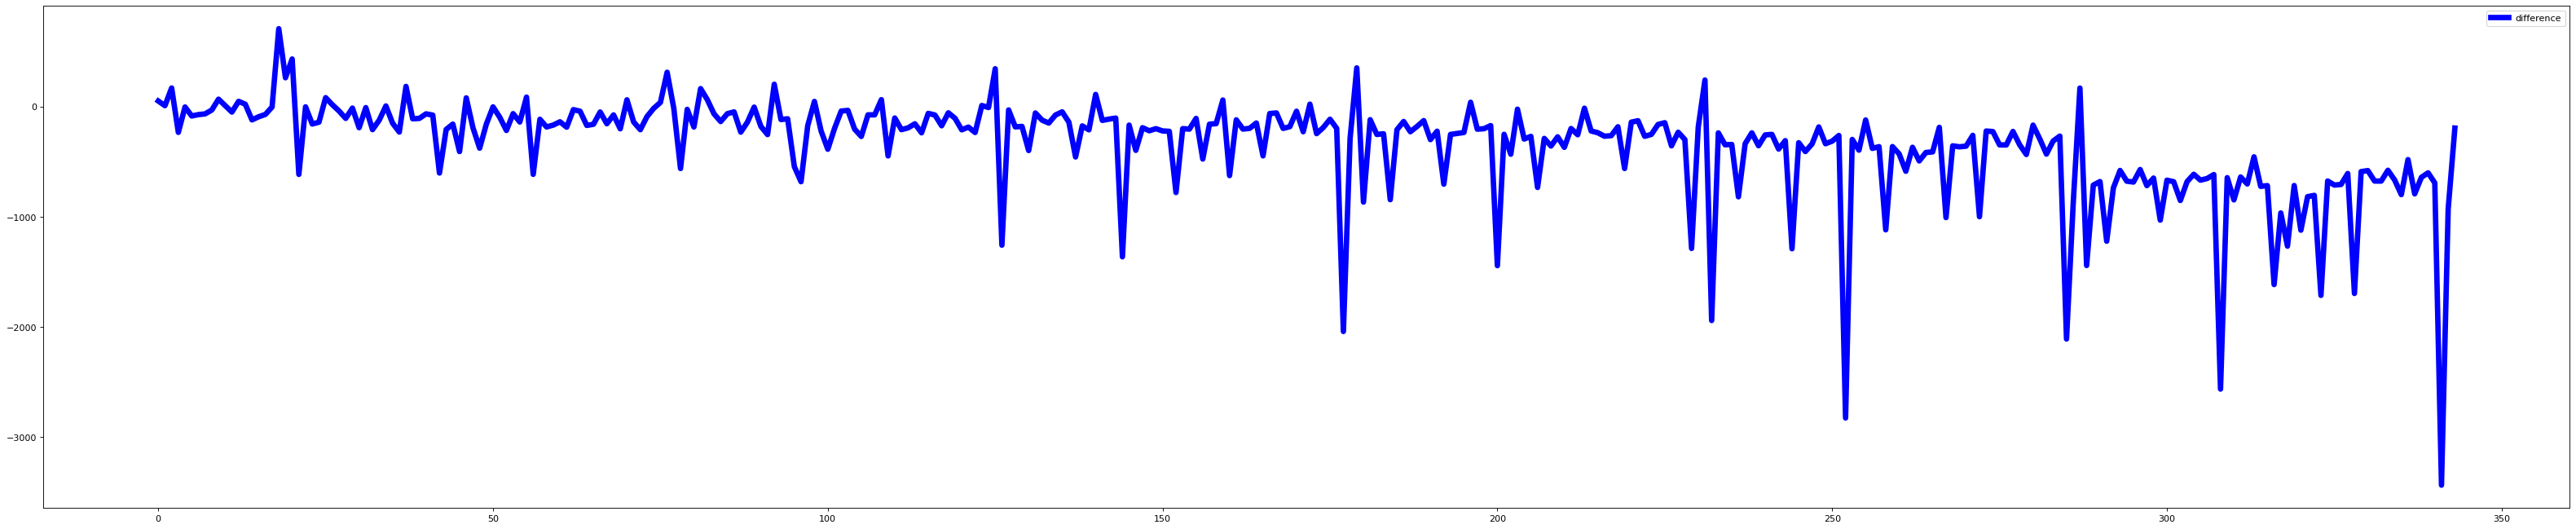

In [143]:
LinearRes(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  203.43932836739424
MAE Test:  371.64661362222165
MSE Train:  145685.71231563383
MSE Test:  319253.22659615194
RMSE Train:  381.68797769334293
RMSE Test:  565.0249787364731
R2 Train:  0.4177912789827727
R2 Test:  -0.03536190040451248
...............Prediction For 2020..................
January :  -46922
Feburary :  -40044
March :  -44031
April :  -47889
CoV : 2.3708112886093233
Variance Score 0.35225096168403336
MAPE % 321.1819336365505


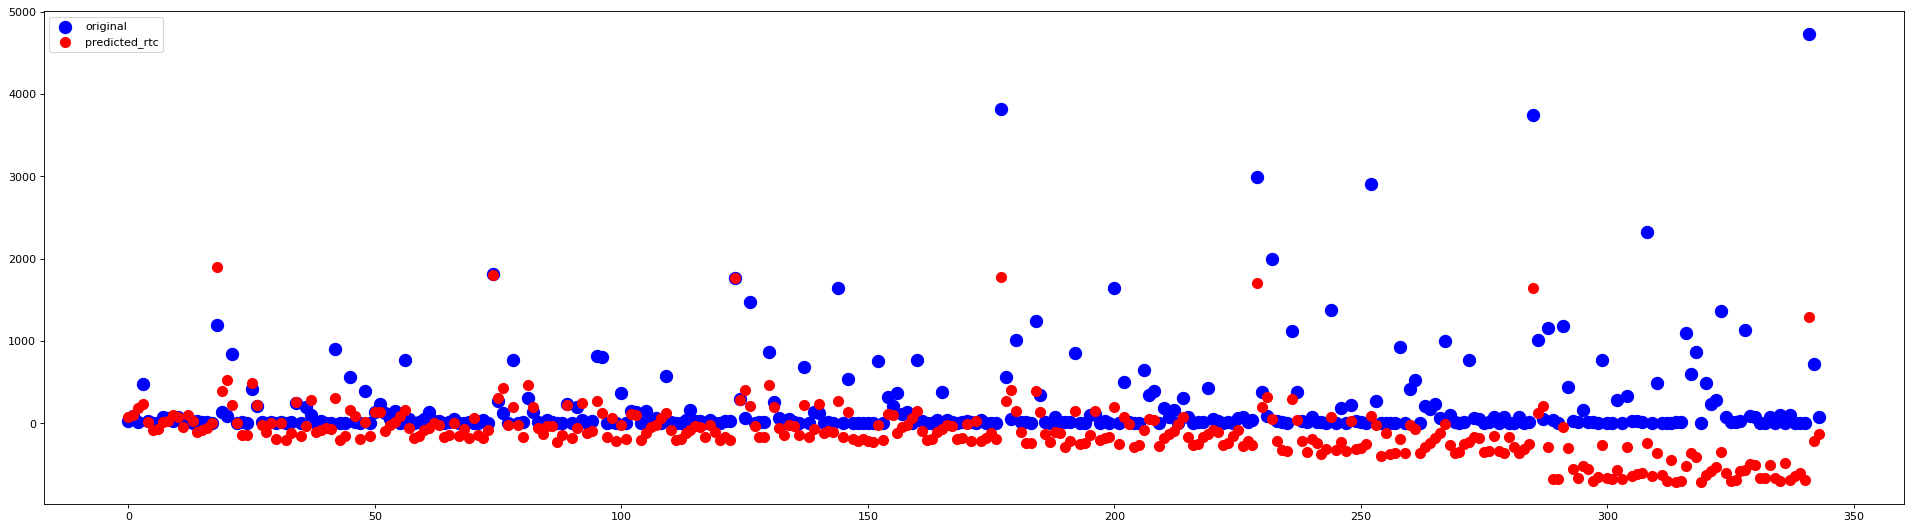

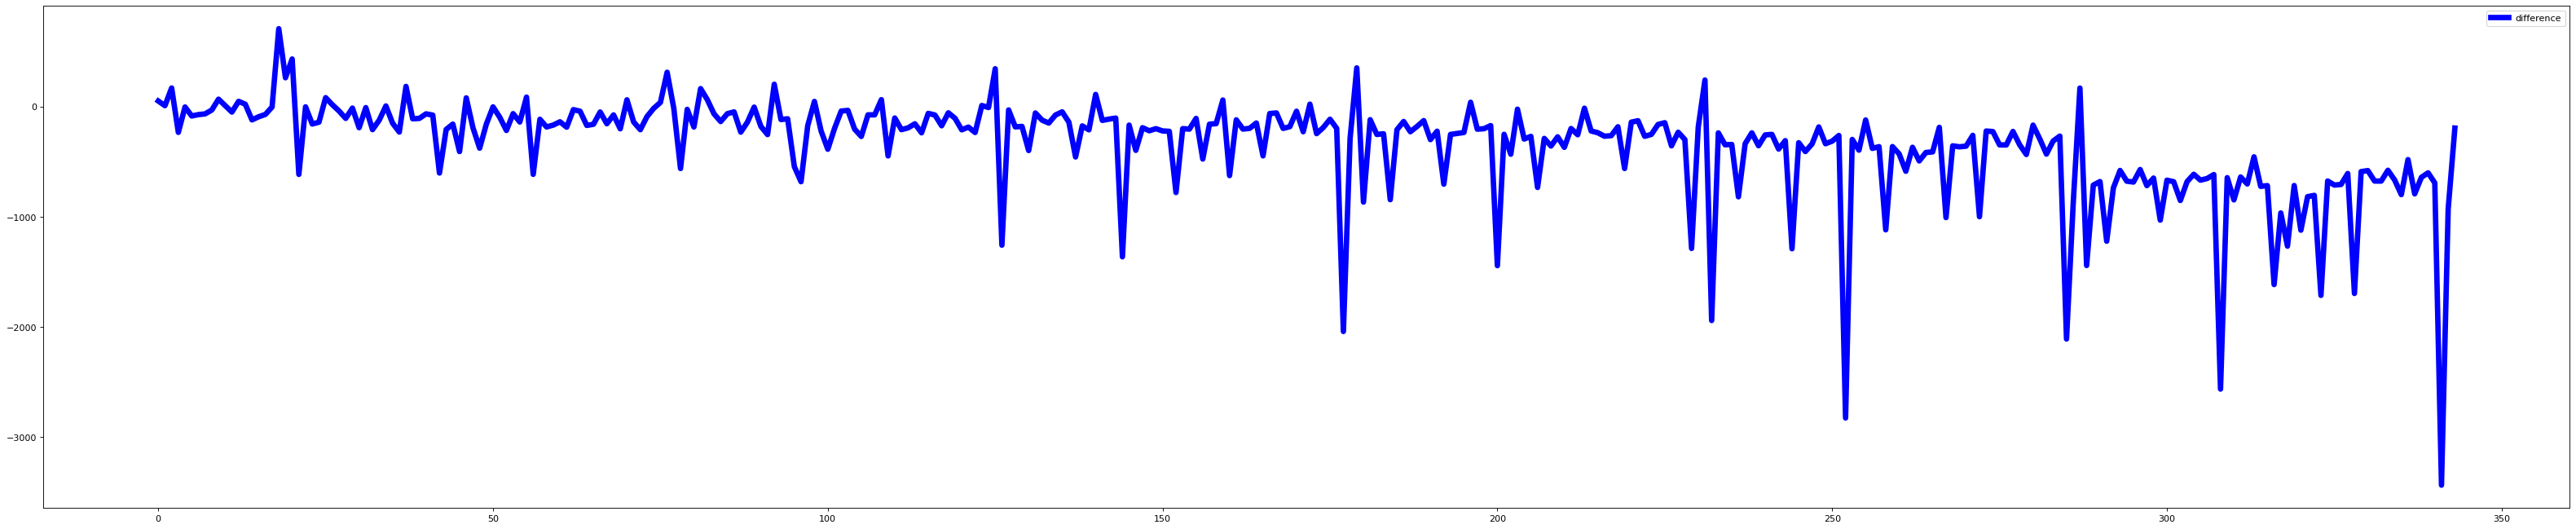

In [144]:
LinearRes(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Gaussian Naive Bayes MODELS OUTPUTS**

Best one in the Gaussian Naive Bayes Models is 2. Group(Without Province)

MAE Train:  97.05450581395348
MAE Test:  179.18023255813952
MSE Train:  78420.69985465116
MSE Test:  114872.53488372093
RMSE Train:  280.03696158659335
RMSE Test:  338.928509989527
R2 Train:  0.6866047147798944
R2 Test:  0.6274598465626705
...............Prediction For 2020..................
January :  11923
Feburary :  11642
March :  6225
April :  5635
CoV : 1.422123919745283
Variance Score 0.6281039642449685
MAPE % 389.95846903615194


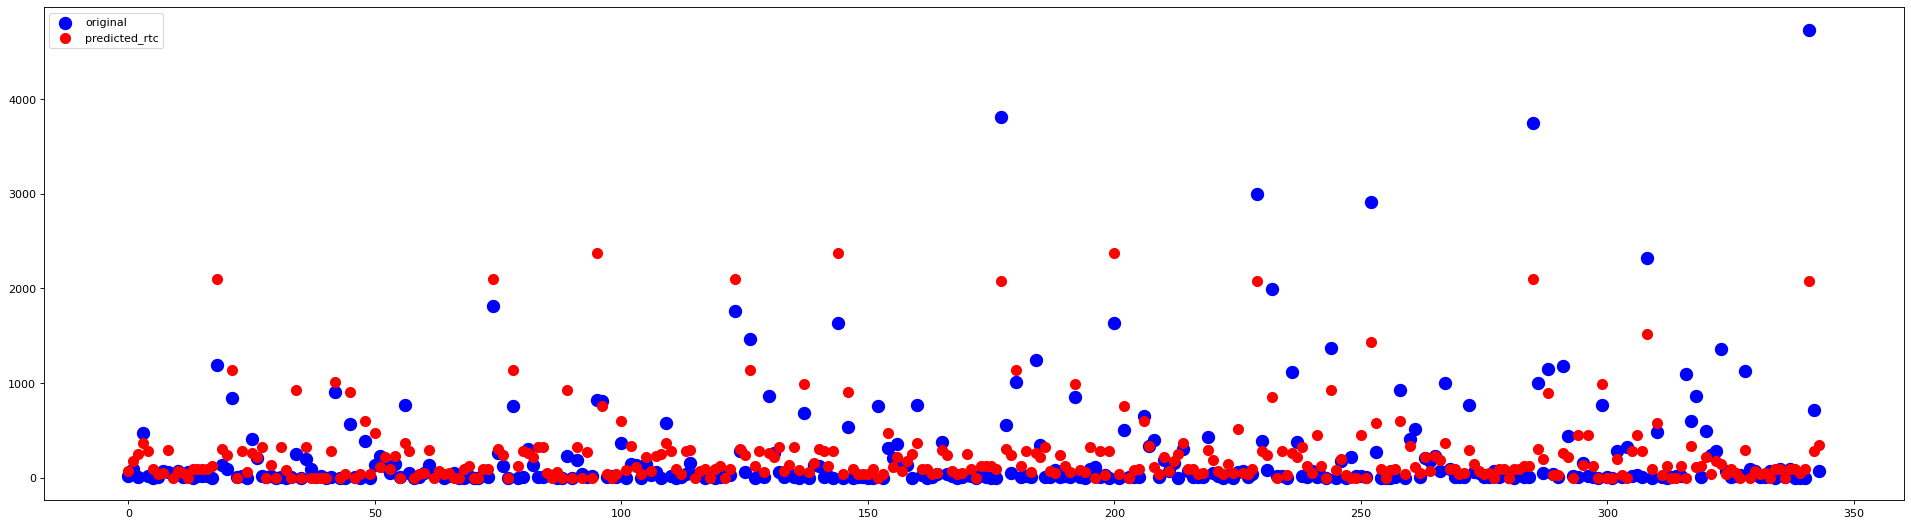

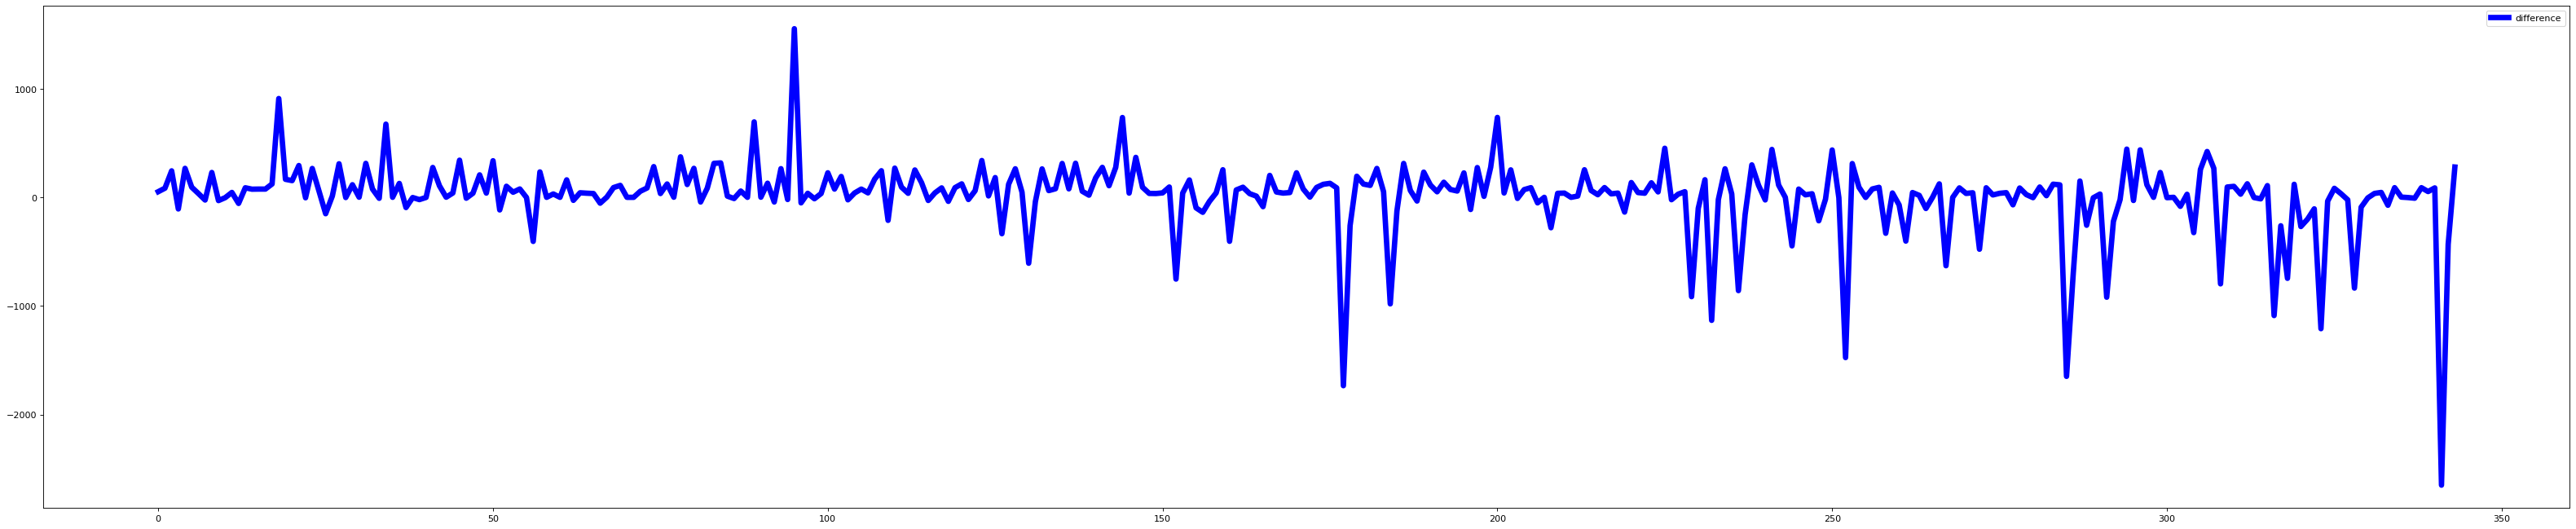

In [145]:
gaussNB(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  71.63517441860465
MAE Test:  142.2325581395349
MSE Train:  62318.045058139534
MSE Test:  110470.52906976744
RMSE Train:  249.63582486922732
RMSE Test:  332.37107134912844
R2 Train:  0.7509562967232728
R2 Test:  0.6417358780180767
...............Prediction For 2020..................
January :  5148
Feburary :  6075
March :  6649
April :  5536
CoV : 1.3946092962541494
Variance Score 0.6456652080436218
MAPE % 506.8237668677993


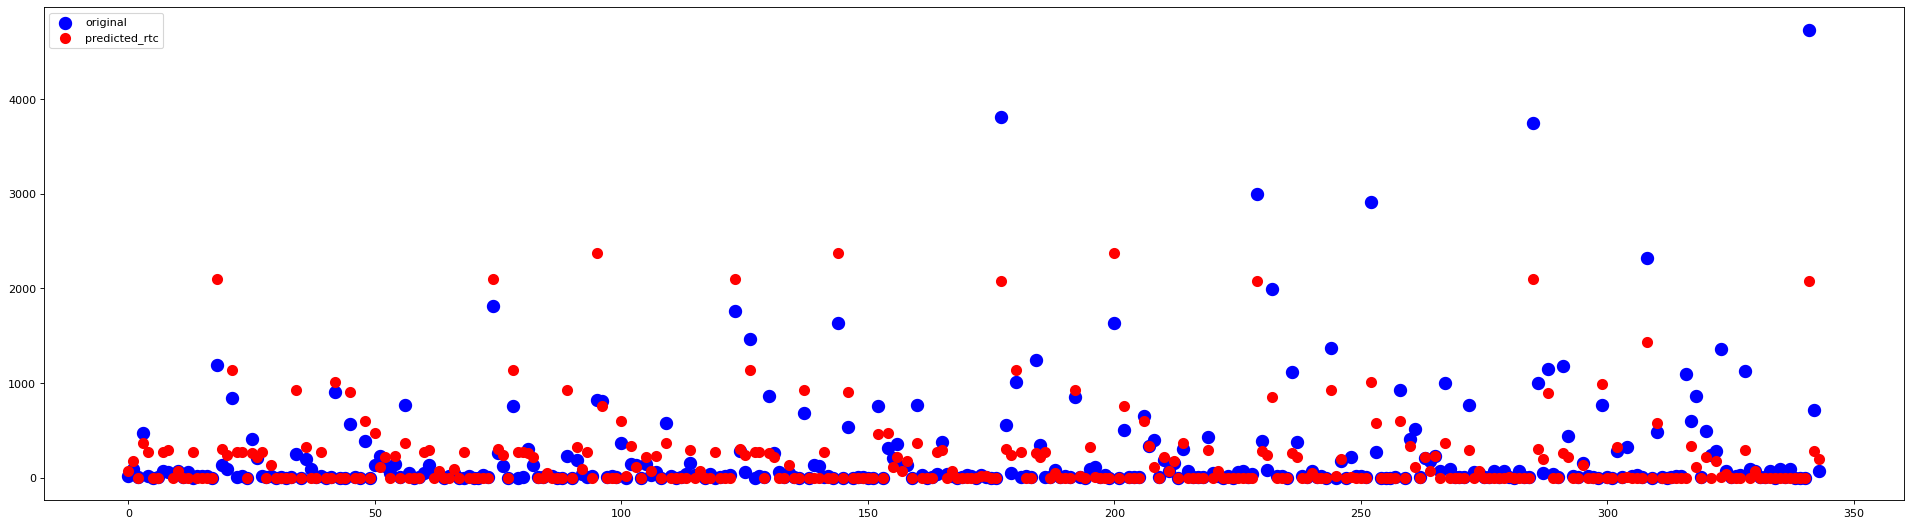

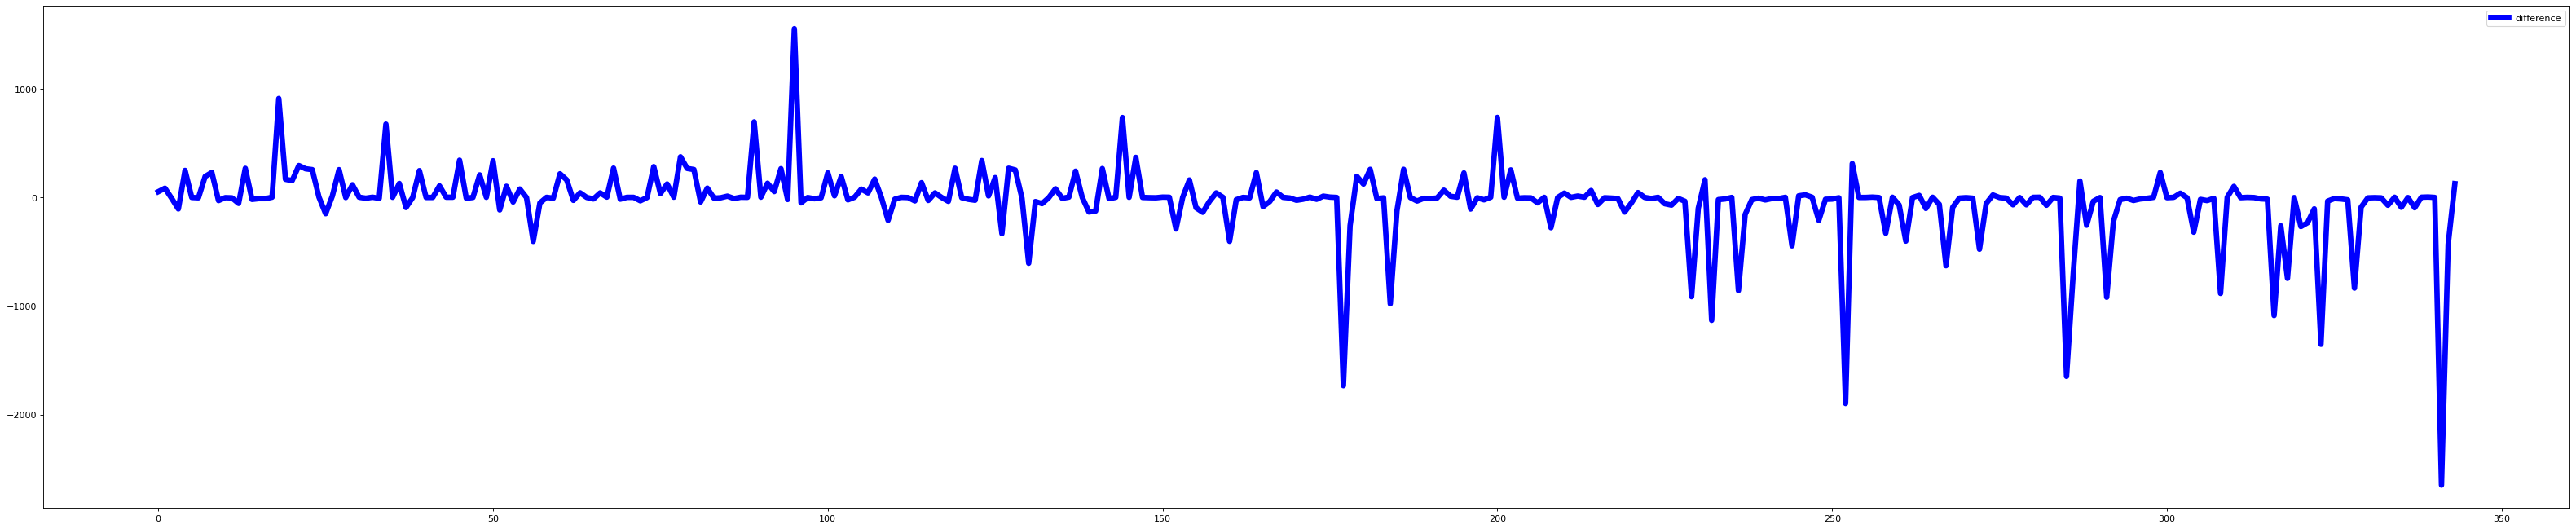

In [146]:
gaussNB(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  85.00944767441861
MAE Test:  169.45058139534885
MSE Train:  72317.73183139534
MSE Test:  112220.15988372093
RMSE Train:  268.9195638688181
RMSE Test:  334.9927758679595
R2 Train:  0.7109942115311657
R2 Test:  0.6360616954769784
...............Prediction For 2020..................
January :  5873
Feburary :  7602
March :  5590
April :  4239
CoV : 1.405609812872976
Variance Score 0.6360678788752252
MAPE % 619.4194797055629


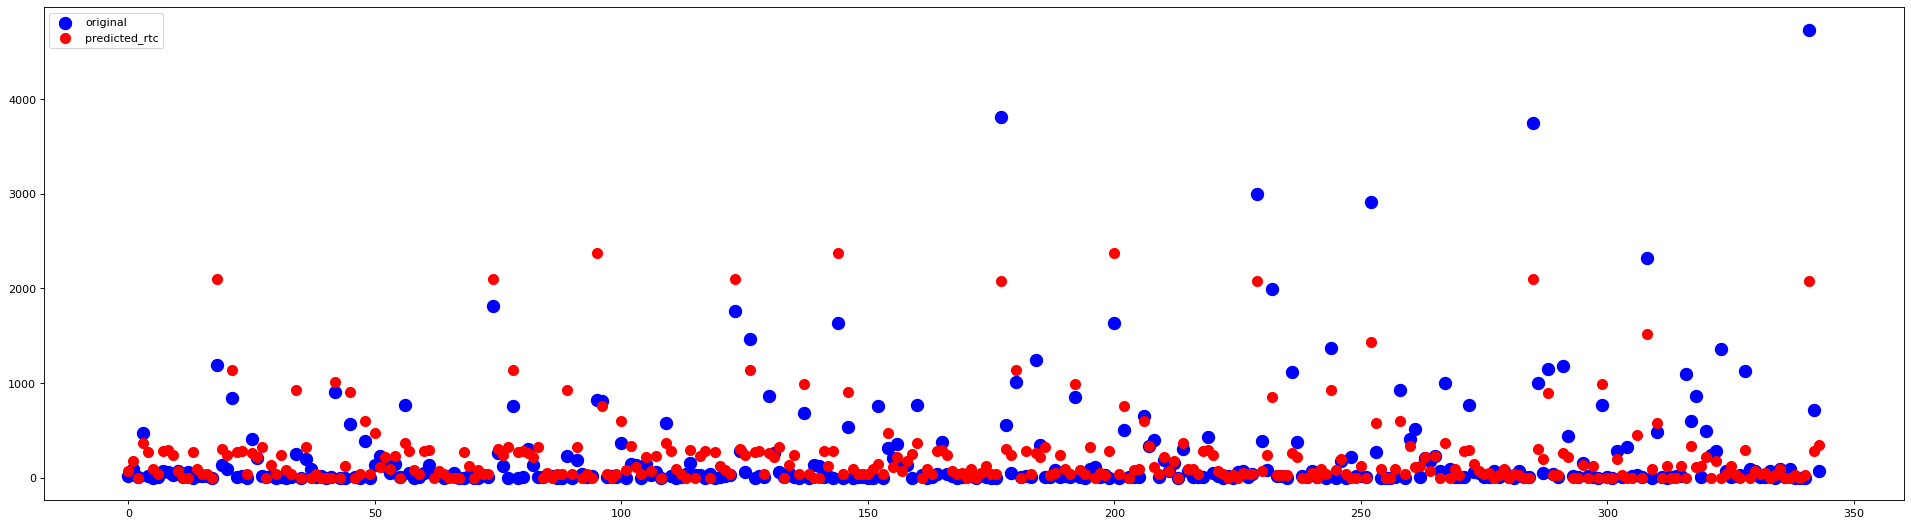

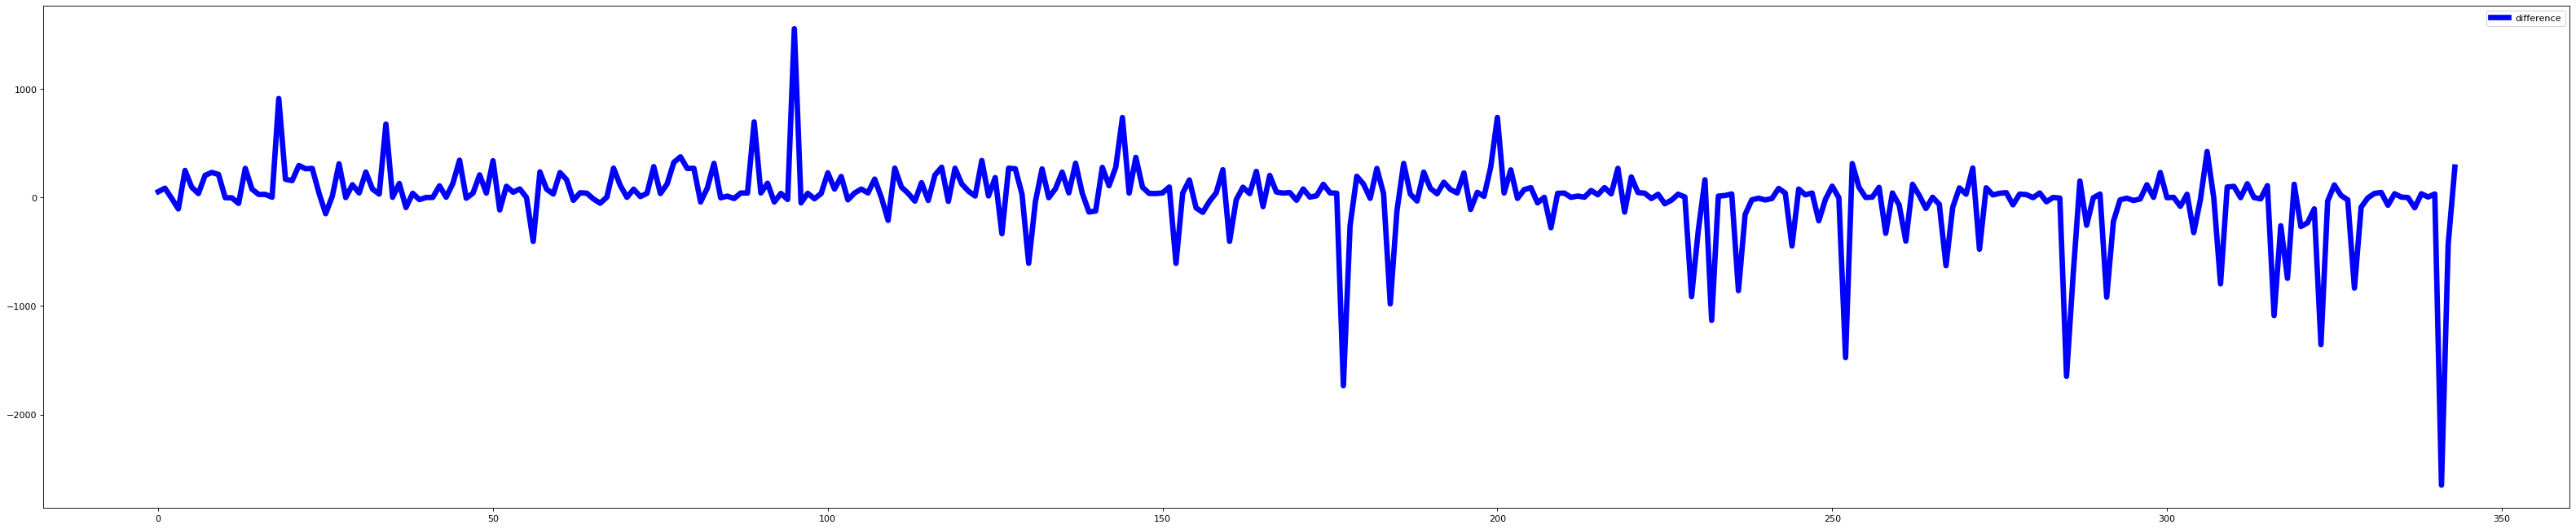

In [147]:
gaussNB(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Decision Tree MODELS OUTPUTS**

Best one in the Light GBM Models is 2. Group(Without Province)

MAE Train:  8.55694127677498
MAE Test:  229.80920369601327
MSE Train:  506.731213491607
MSE Test:  337567.6386156046
RMSE Train:  22.510691093158535
RMSE Test:  581.0057130662353
R2 Train:  0.9979749329771799
R2 Test:  -0.09475689739615878
...............Prediction For 2020..................
January :  1022
Feburary :  1453
March :  1304
April :  1386
CoV :  2.4378655017416198
Variance Score -0.002461161729609973
MAPE % 1878.6557108544077


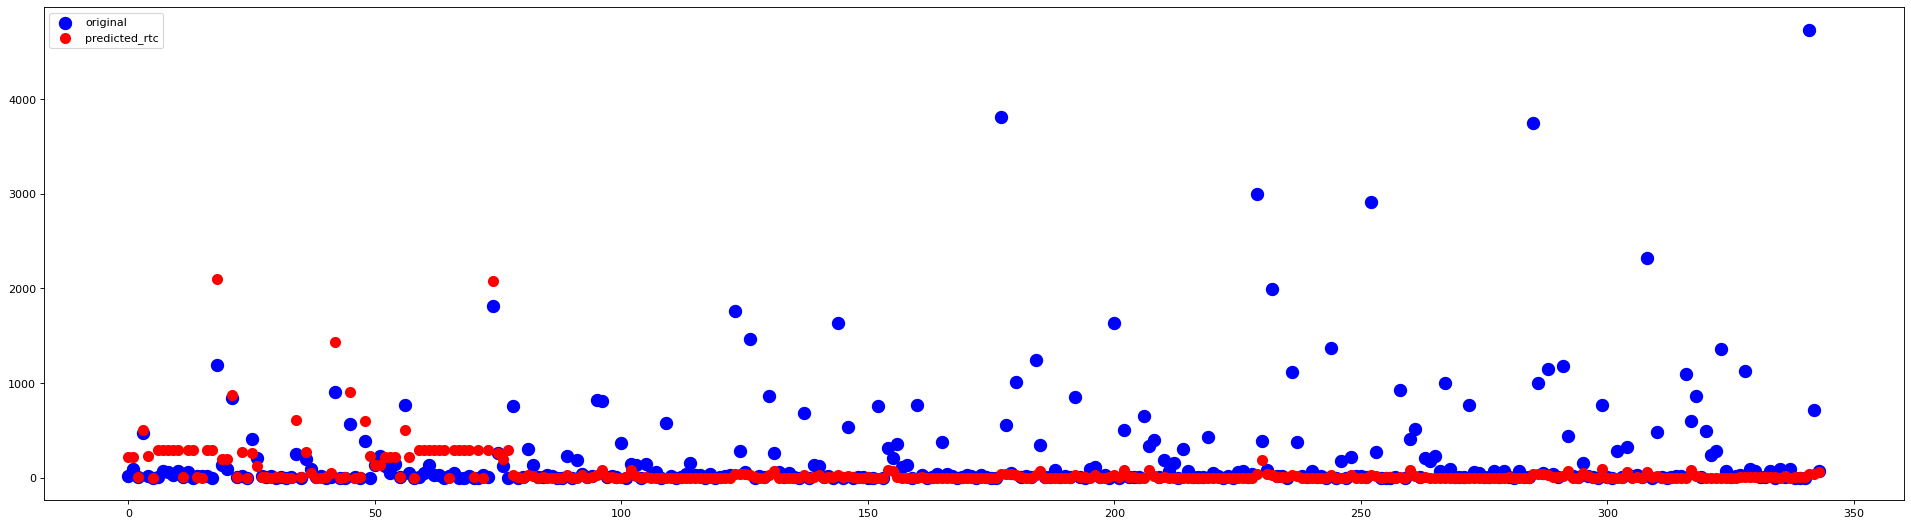

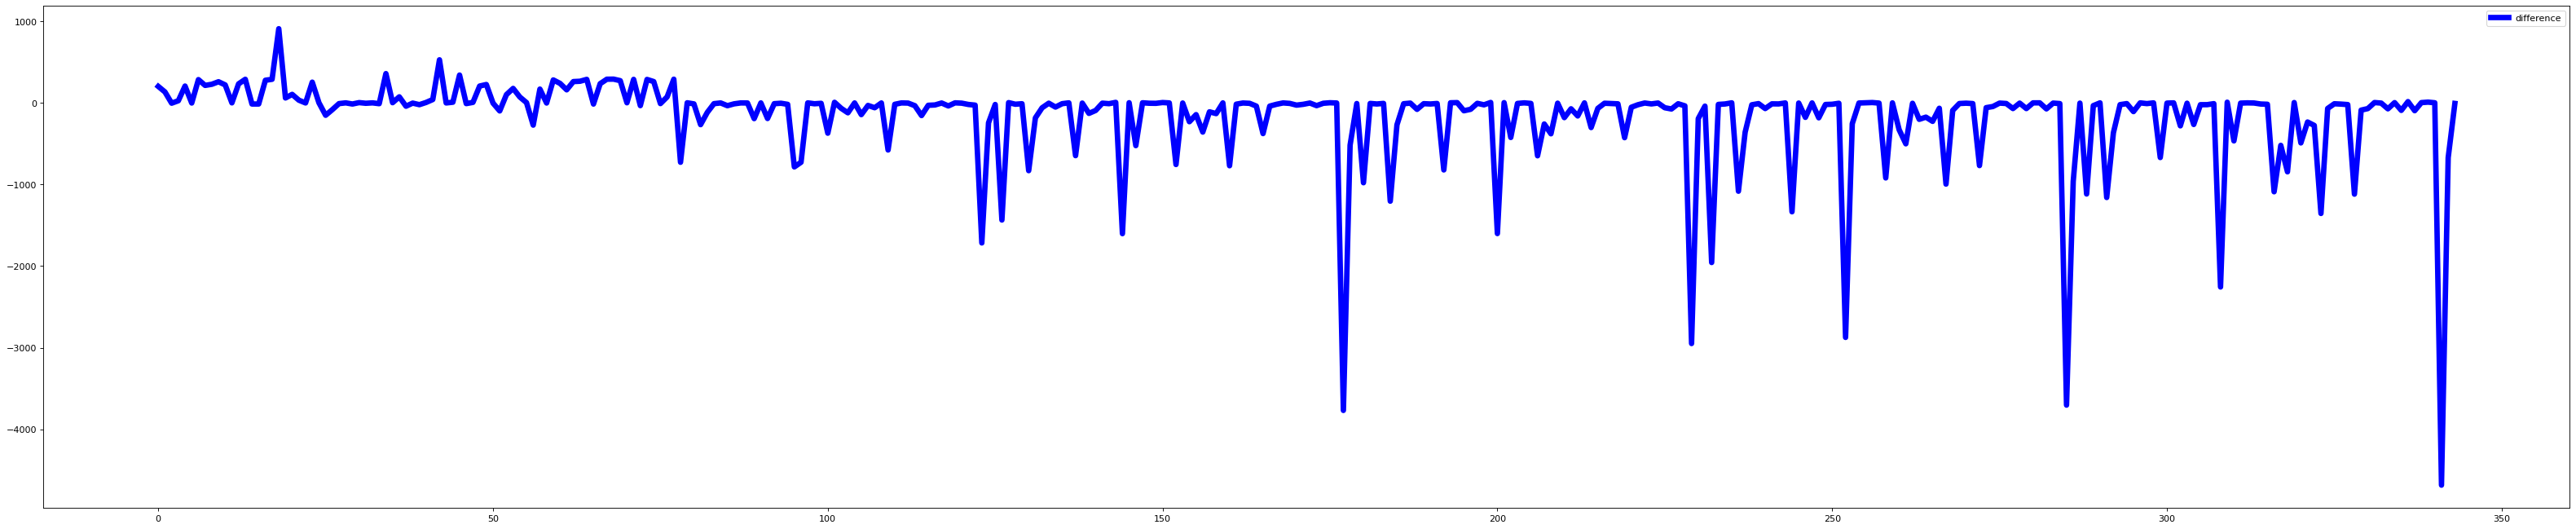

In [148]:
decisionTree(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  9.475231090080117
MAE Test:  122.4016749723145
MSE Train:  785.6199839978791
MSE Test:  81203.75210126299
RMSE Train:  28.028913357422173
RMSE Test:  284.9627205465006
R2 Train:  0.996860400386429
R2 Test:  0.736650207135122
...............Prediction For 2020..................
January :  10037
Feburary :  11673
March :  11939
April :  11556
CoV :  1.1956866689597505
Variance Score 0.7467383506261756
MAPE % 173.27057083930512


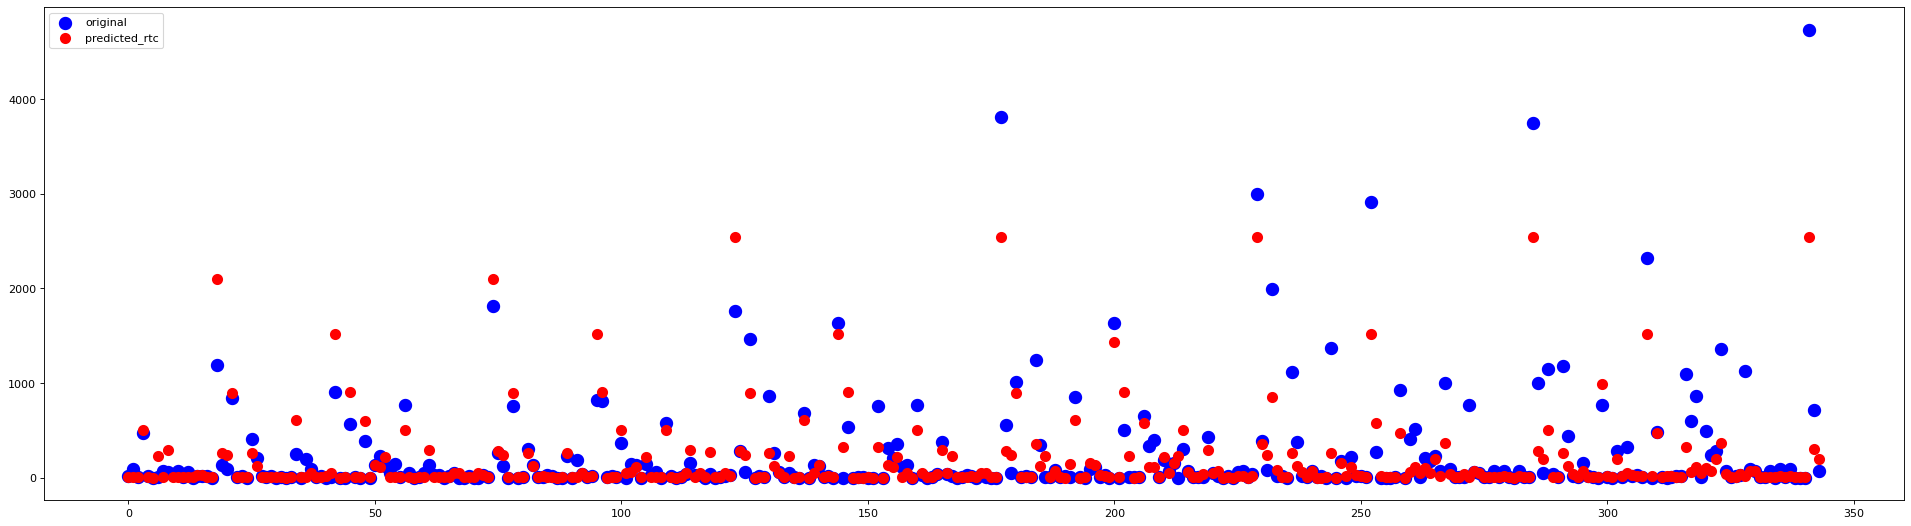

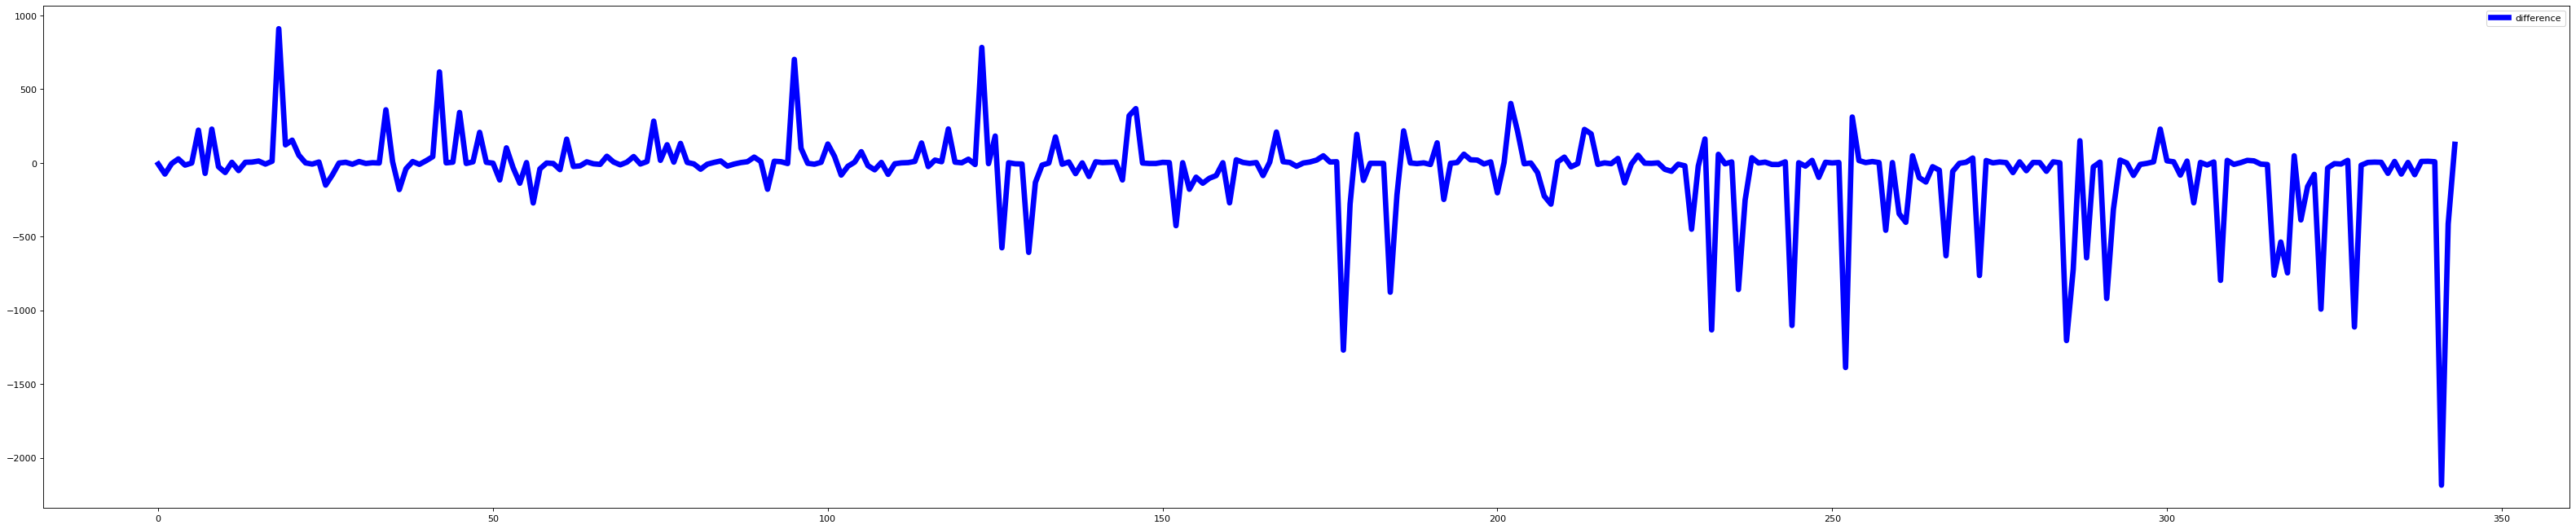

In [149]:
decisionTree(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  9.626132003671405
MAE Test:  214.38949498404014
MSE Train:  789.6119324966577
MSE Test:  322607.4286889546
RMSE Train:  28.100034386040484
RMSE Test:  567.9854123909827
R2 Train:  0.9968444472281344
R2 Test:  -0.04623982665187354
...............Prediction For 2020..................
January :  933
Feburary :  1323
March :  1051
April :  781
CoV :  2.3832330925851144
Variance Score 0.07278825614738904
MAPE % 5794.945156956784


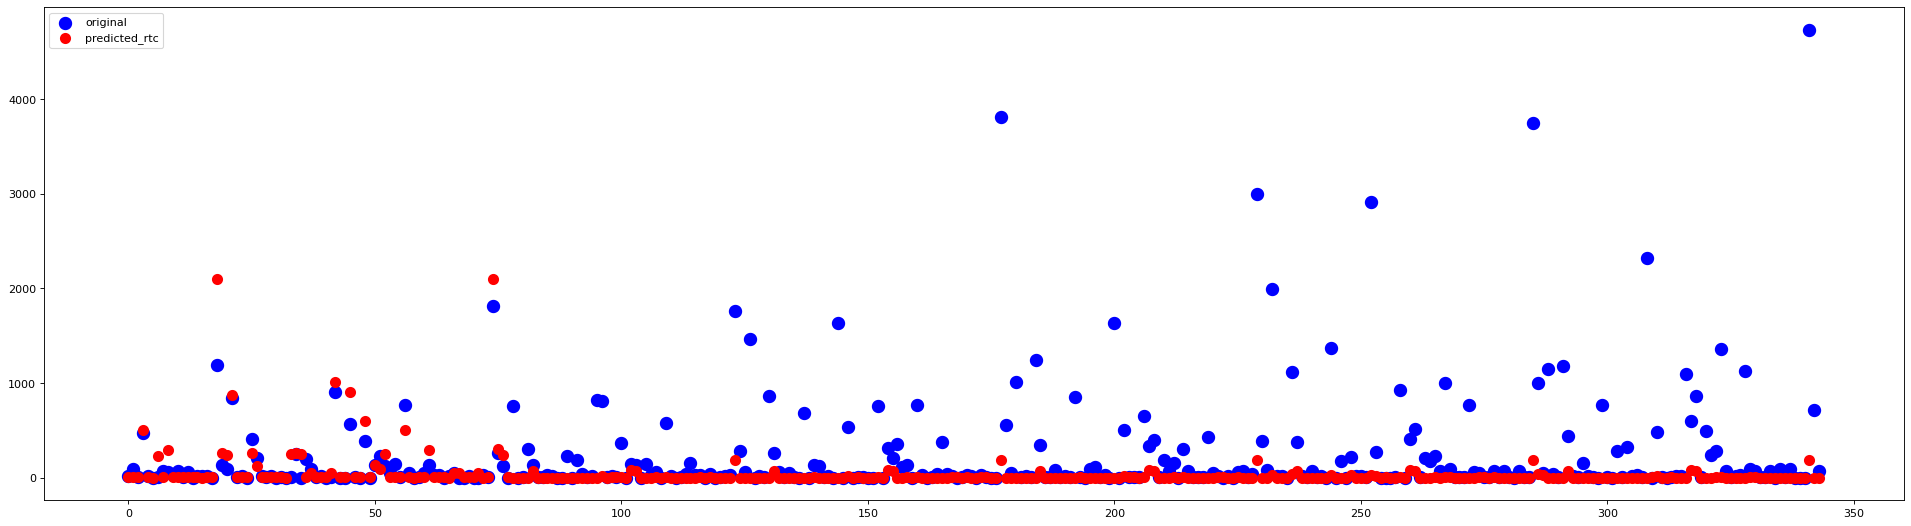

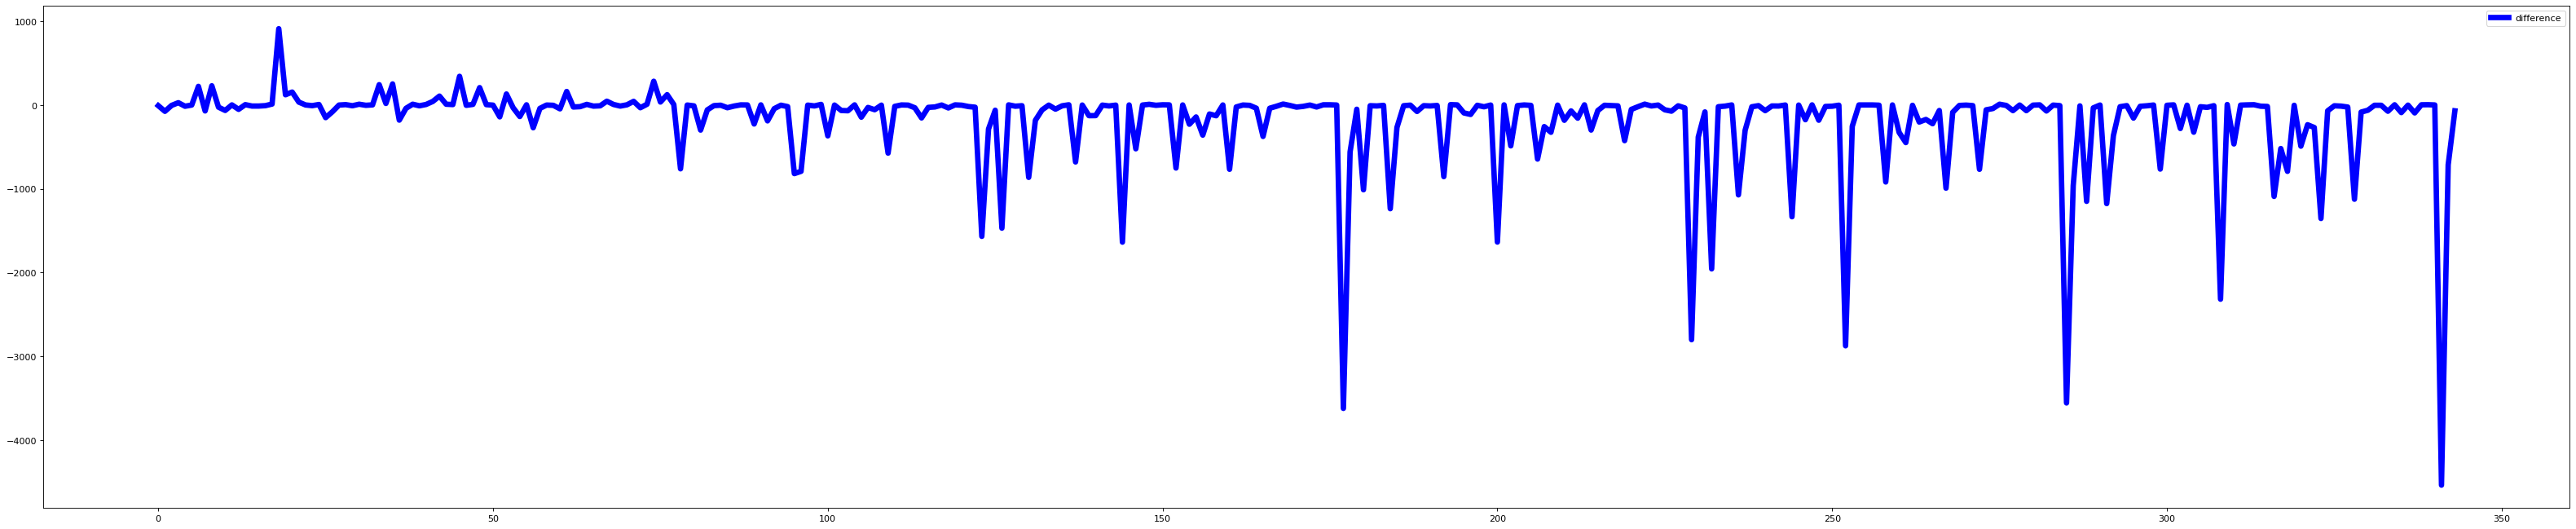

In [150]:
decisionTree(X_train_3,y_train_3,X_test_3,y_test_3,pred3)

**Gradient Boosting Regressor MODELS OUTPUTS**

Best one in the Gradient Boosting Regressor Models is 2. Group(Without Province)

MAE Train:  11.090263274366386
MAE Test:  217.64250310324095
MSE Train:  256.13900348188747
MSE Test:  279700.32278093573
RMSE Train:  16.00434326930935
RMSE Test:  528.8670180498456
R2 Train:  0.9989763830697637
R2 Test:  0.09291110124142521
...............Prediction For 2020..................
January :  3733
Feburary :  36
March :  8180
April :  9191
CoV :  2.21909463077121
Variance Score 0.21200319211649188
MAPE % 422.1964823032442


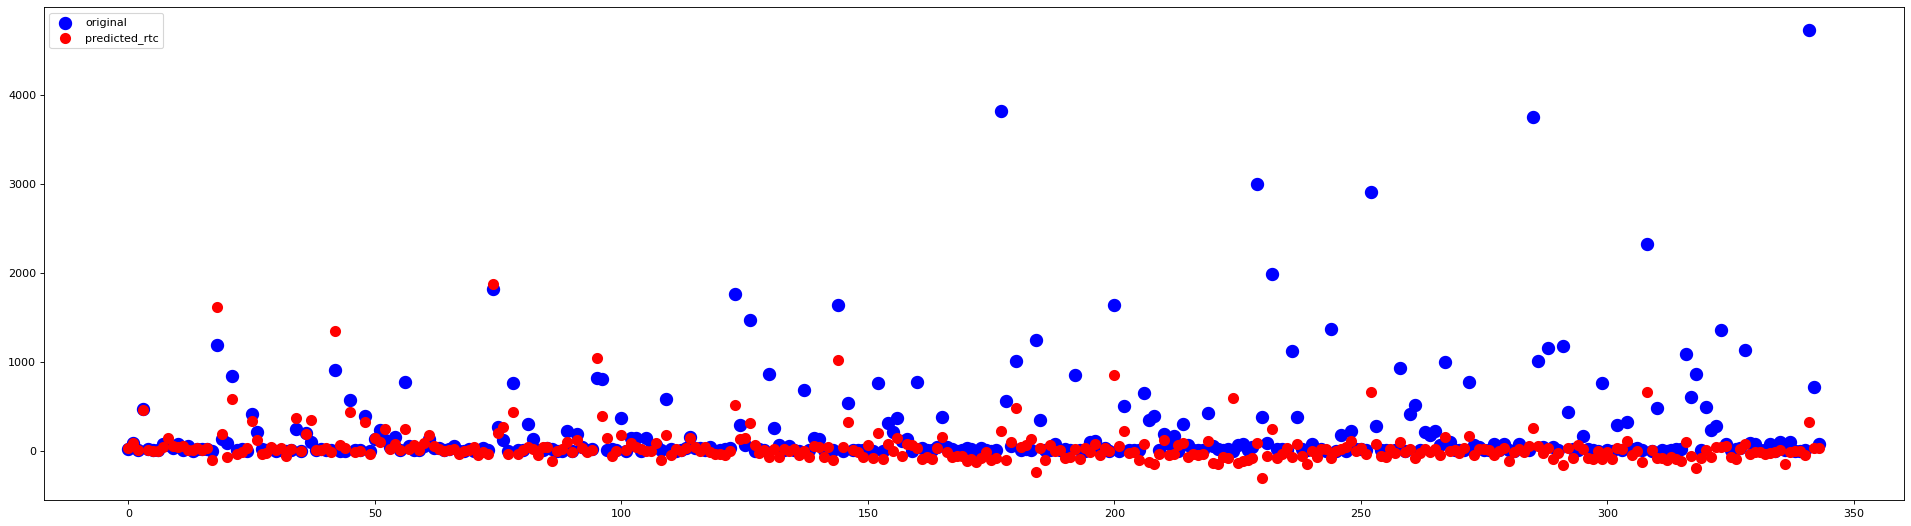

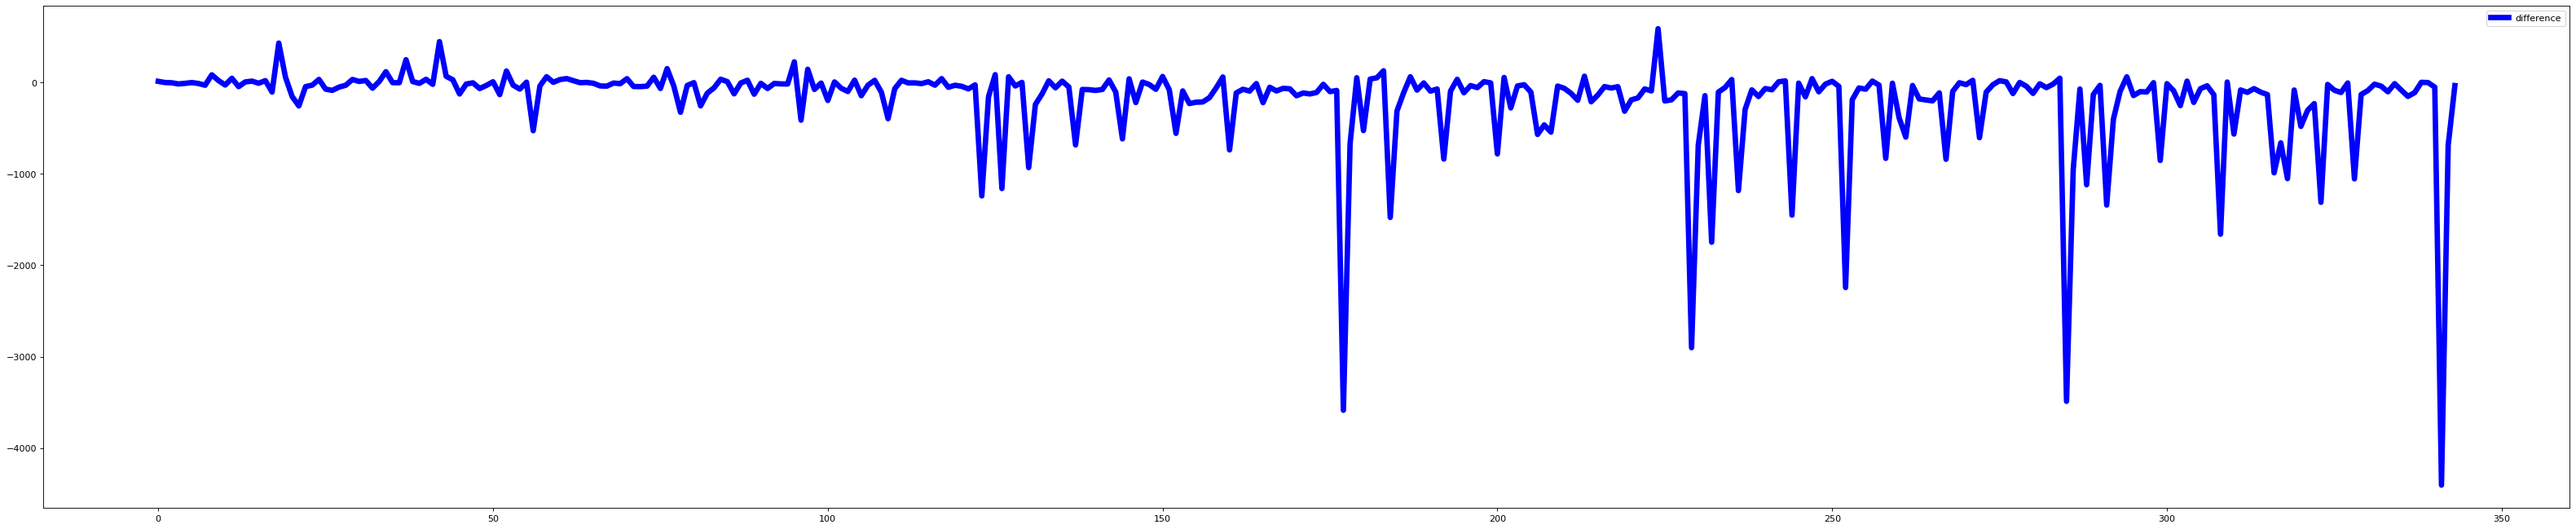

In [151]:
GbrReg(X_train_1,y_train_1,X_test_1,y_test_1,pred1)

MAE Train:  10.661394354716494
MAE Test:  158.32603270585943
MSE Train:  244.64361779817253
MSE Test:  130064.46974790726
RMSE Train:  15.641087487709175
RMSE Test:  360.6445199194177
R2 Train:  0.9990223224669094
R2 Test:  0.5781912746534426
...............Prediction For 2020..................
January :  8279
Feburary :  8576
March :  9608
April :  8809
CoV :  1.5132430090295628
Variance Score 0.604794710533789
MAPE % 411.3988663467689


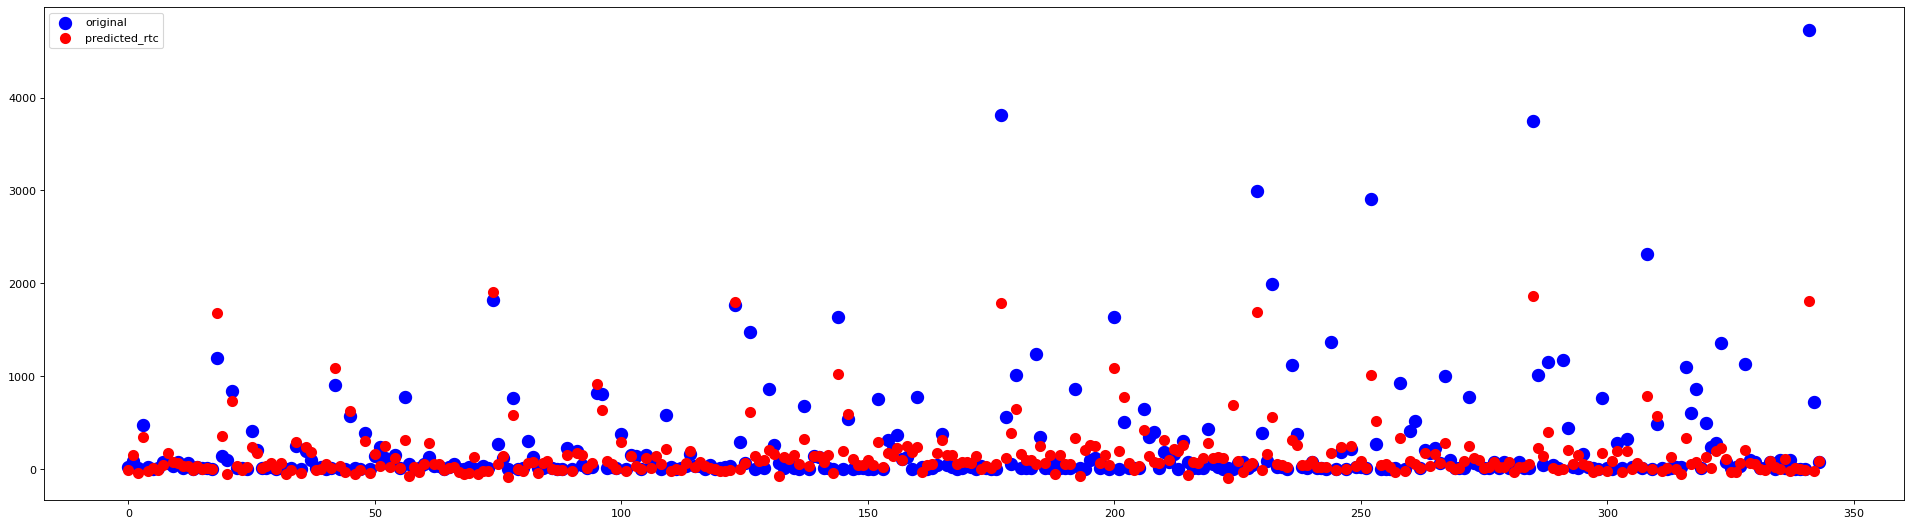

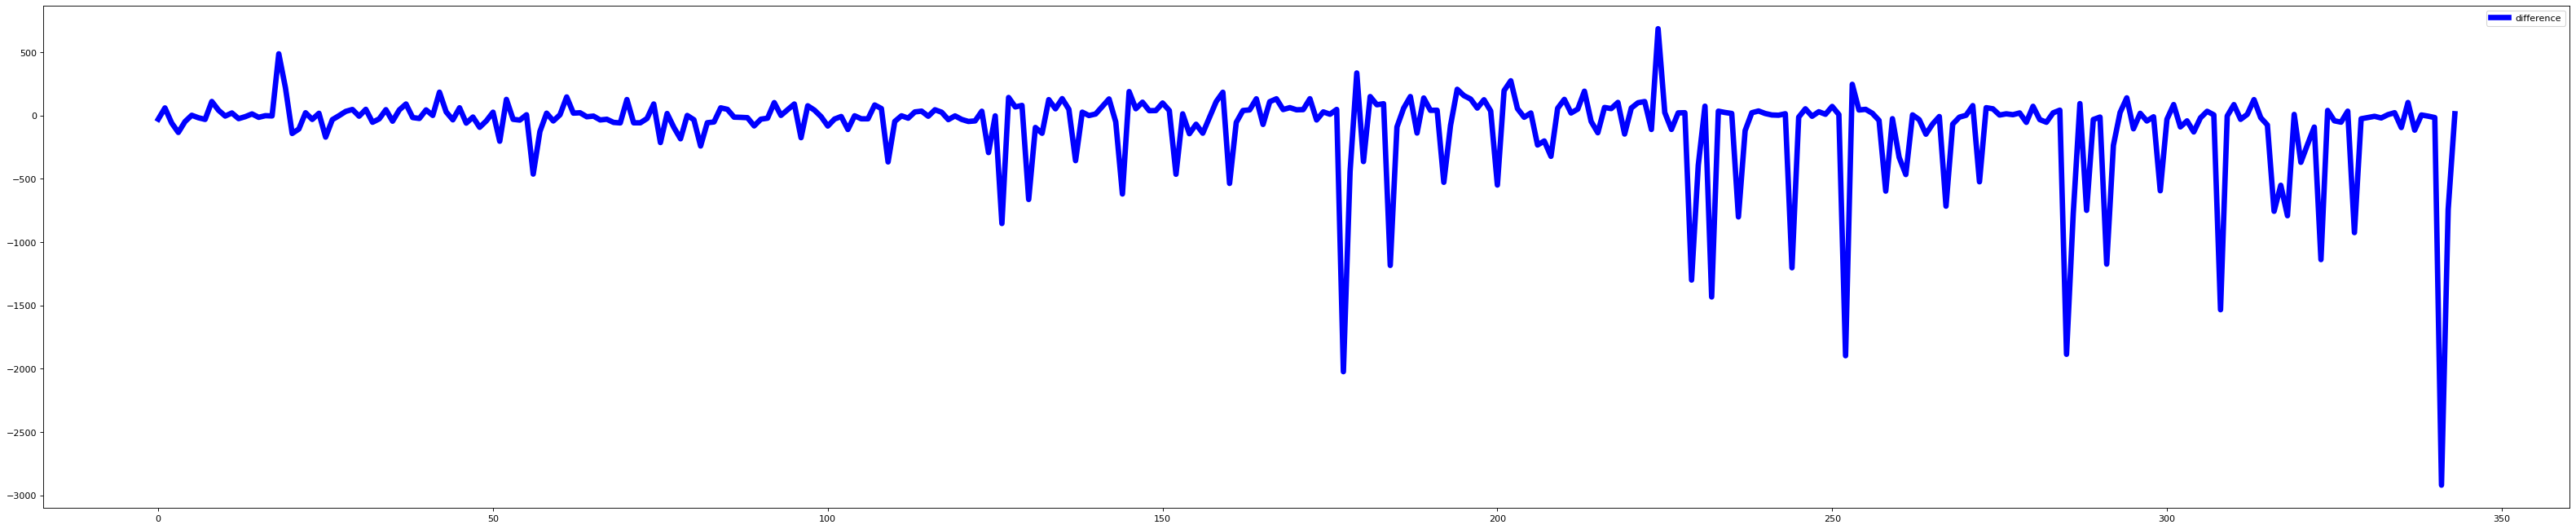

In [152]:
GbrReg(X_train_2,y_train_2,X_test_2,y_test_2,pred2)

MAE Train:  11.51806818047388
MAE Test:  209.12018904283315
MSE Train:  280.7706709132832
MSE Test:  284705.61833890027
RMSE Train:  16.756212904868548
RMSE Test:  533.5781276803804
R2 Train:  0.9988779467072418
R2 Test:  0.07667855638594001
...............Prediction For 2020..................
January :  1862
Feburary :  3008
March :  4830
April :  4682
CoV :  2.238862167277162
Variance Score 0.15815394925471604
MAPE % 399.60113891545063


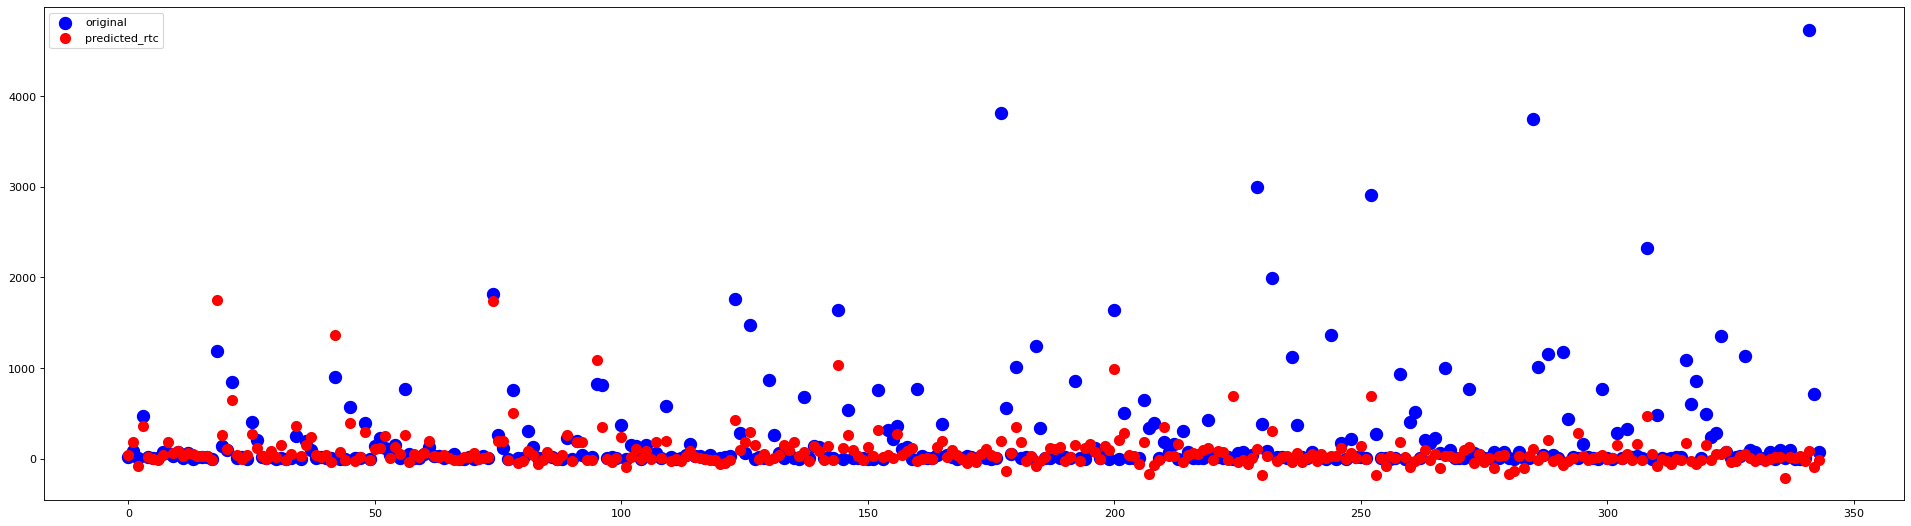

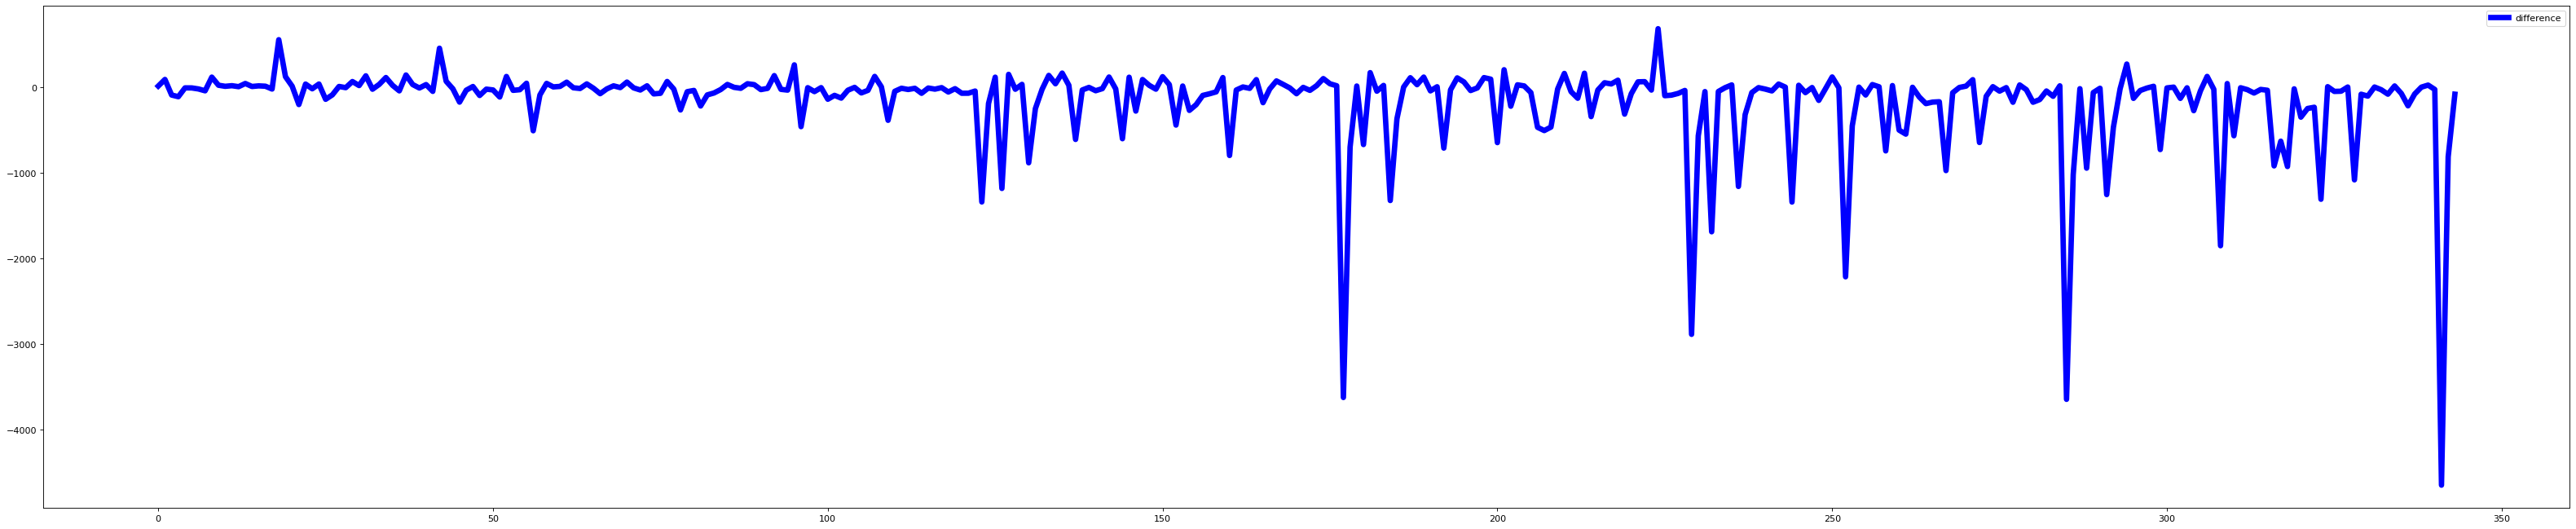

In [153]:
GbrReg(X_train_3,y_train_3,X_test_3,y_test_3,pred3)